# Notebook for data inspection & exploration of crispri and co-eQTL datasets
This notebook contains mainly data inspection, exploration and cleaning of both CRISPRi dataset of Replogle et al., (2022) and co-eQTL analyses of the Functional Genomics group. <br> A more streamlined version of the co-eqtl-cripsri analysis is available in the assing_crispr_score_to_coeqtls.ipynb & ... notebook
<br><br>
CRISPRi data file  clustered_mean_gene_expression_figs2-4.csv.gz  available at: https://plus.figshare.com/articles/dataset/_Mapping_information-rich_genotype-phenotype_landscapes_with_genome-scale_Perturb-seq_Replogle_et_al_2022_-_commonly_requested_supplemental_files/21632564/1?file=38349305 <br>

significant co-eqtls Shuang 13059_2023_2897_MOESM5_ESM.csv (Additional file 5: Table S6. The significant co-eQTLs for the major cell types with the filtering strategy) available at: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-023-02897-x


In [104]:
import pandas as pd
import re
import time

import statistics as stats
import scipy.stats as sp

import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [105]:
import panel as pn
import hvplot.pandas
import holoviews as hv

from bokeh.plotting import figure
from bokeh.models import Range1d
from bokeh.models import HoverTool
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource

In [106]:
pd.options.mode.chained_assignment = None  # default='warn'


In [107]:
#get headers of the columns of the csv
cols = list(pd.read_csv('C:/Users/annav/Documents/Stage/replogle_crispr/clustered_mean_gene_expression_figs2-4.csv', sep=',', nrows=1))

In [108]:
cols[:5]

['gene_transcript',
 'Unnamed: 1',
 '10005_ZBTB4_P1_ENSG00000174282',
 '10006_ZBTB5_P1P2_ENSG00000168795',
 '10015_ZBTB8OS_P1P2_ENSG00000176261']

In [109]:
#select all but the unnamed column while loading the file
df = pd.read_csv('C:/Users/annav/Documents/Stage/replogle_crispr/clustered_mean_gene_expression_figs2-4.csv', sep=',', usecols =[i for i in cols if i != "Unnamed: 1"])

In [110]:
df

,gene_transcript,10005_ZBTB4_P1_ENSG00000174282,10006_ZBTB5_P1P2_ENSG00000168795,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10023_ZC3H18_P1P2_ENSG00000158545,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10039_ZCCHC8_P1P2_ENSG00000033030,10040_ZCCHC9_P1P2_ENSG00000131732,...,9925_YEATS2_P1P2_ENSG00000163872,9926_YEATS4_P1P2_ENSG00000127337,9940_YME1L1_P1P2_ENSG00000136758,995_C16orf72_P1_ENSG00000182831,9971_ZBTB14_P1P2_ENSG00000198081,9975_ZBTB17_P1P2_ENSG00000116809,998_C16orf87_P1P2_ENSG00000155330,9992_ZBTB39_P1P2_ENSG00000166860,9998_ZBTB44_P1P2_ENSG00000196323,9_AAR2_P1P2_ENSG00000131043
0,cluster,19.000000,-1.000000,-1.000000,4.000000,-1.000000,8.000000,-1.000000,-1.000000,57.000000,...,35.000000,6.000000,-1.000000,-1.000000,-1.000000,7.000000,2.000000,-1.000000,-1.000000,57.000000
1,gene_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CYP51A1,0.015538,-0.169297,-0.141619,-0.068998,0.019589,-0.017413,-0.341628,-0.054714,-0.090300,...,0.035929,-0.038241,-0.126964,0.047563,-0.457281,-0.156436,0.016374,0.320231,0.199086,0.074135
3,BAD,0.075532,-0.039656,-0.133556,0.208468,0.355862,0.134834,-0.133954,0.031147,0.342149,...,0.010820,-0.241763,0.330868,-0.036582,0.050507,0.053212,0.126165,-0.053543,0.008552,0.139625
4,CD99,-0.185194,0.067921,0.138278,0.081160,-0.203804,0.125460,-0.038213,-0.051570,0.038924,...,0.071017,-0.064191,0.189424,-0.044574,0.809881,0.129267,0.163671,-0.015874,0.244931,0.467501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,-0.422495,-0.064950,-0.086410,-0.023713,-0.344314,-0.050482,-0.082852,-0.001369,0.881788,...,0.160054,-0.069895,-0.246135,-0.135752,0.440462,-0.197023,0.226833,-0.267401,-0.160511,0.465550
2317,POLR2J3,0.379631,0.000678,0.084222,-0.112965,0.352633,-0.123764,0.408237,-0.019059,0.038050,...,0.020901,-0.039629,0.151411,0.051497,-0.313755,0.285702,0.049606,-0.082782,0.012675,0.217903
2318,BX890604.2,0.060350,0.015746,0.098428,-0.192752,0.080785,0.083702,-0.067631,-0.002744,0.312789,...,-0.006933,-0.031753,-0.065019,-0.021804,-0.117480,-0.075904,-0.025401,0.063323,0.084166,0.247097
2319,AC016074.2,0.364247,-0.016822,0.285028,-0.185722,-0.163307,0.036043,0.028476,-0.108641,0.020184,...,0.251644,0.083346,0.315087,0.068939,-0.058699,-0.106195,-0.233496,0.645232,-0.079008,0.005066


In [111]:
#Drop first two rows
df = df.iloc[2:]

In [112]:
df = df.rename(columns={'gene_transcript': 'gene_name'})

In [113]:
df

,gene_name,10005_ZBTB4_P1_ENSG00000174282,10006_ZBTB5_P1P2_ENSG00000168795,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10023_ZC3H18_P1P2_ENSG00000158545,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10039_ZCCHC8_P1P2_ENSG00000033030,10040_ZCCHC9_P1P2_ENSG00000131732,...,9925_YEATS2_P1P2_ENSG00000163872,9926_YEATS4_P1P2_ENSG00000127337,9940_YME1L1_P1P2_ENSG00000136758,995_C16orf72_P1_ENSG00000182831,9971_ZBTB14_P1P2_ENSG00000198081,9975_ZBTB17_P1P2_ENSG00000116809,998_C16orf87_P1P2_ENSG00000155330,9992_ZBTB39_P1P2_ENSG00000166860,9998_ZBTB44_P1P2_ENSG00000196323,9_AAR2_P1P2_ENSG00000131043
2,CYP51A1,0.015538,-0.169297,-0.141619,-0.068998,0.019589,-0.017413,-0.341628,-0.054714,-0.090300,...,0.035929,-0.038241,-0.126964,0.047563,-0.457281,-0.156436,0.016374,0.320231,0.199086,0.074135
3,BAD,0.075532,-0.039656,-0.133556,0.208468,0.355862,0.134834,-0.133954,0.031147,0.342149,...,0.010820,-0.241763,0.330868,-0.036582,0.050507,0.053212,0.126165,-0.053543,0.008552,0.139625
4,CD99,-0.185194,0.067921,0.138278,0.081160,-0.203804,0.125460,-0.038213,-0.051570,0.038924,...,0.071017,-0.064191,0.189424,-0.044574,0.809881,0.129267,0.163671,-0.015874,0.244931,0.467501
5,MAD1L1,0.011419,0.095523,-0.010855,0.282541,0.200241,0.031291,0.142003,-0.002545,0.375582,...,0.060587,-0.057528,0.120090,-0.075698,0.251953,-0.069809,0.046660,-0.149331,0.018375,0.250776
6,CFLAR,0.109648,-0.008776,0.172564,0.234939,0.110911,0.100156,0.310823,-0.018074,0.406680,...,0.107937,-0.035196,0.131583,-0.025158,0.128556,0.150333,-0.007144,0.210866,0.081446,0.027713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,-0.422495,-0.064950,-0.086410,-0.023713,-0.344314,-0.050482,-0.082852,-0.001369,0.881788,...,0.160054,-0.069895,-0.246135,-0.135752,0.440462,-0.197023,0.226833,-0.267401,-0.160511,0.465550
2317,POLR2J3,0.379631,0.000678,0.084222,-0.112965,0.352633,-0.123764,0.408237,-0.019059,0.038050,...,0.020901,-0.039629,0.151411,0.051497,-0.313755,0.285702,0.049606,-0.082782,0.012675,0.217903
2318,BX890604.2,0.060350,0.015746,0.098428,-0.192752,0.080785,0.083702,-0.067631,-0.002744,0.312789,...,-0.006933,-0.031753,-0.065019,-0.021804,-0.117480,-0.075904,-0.025401,0.063323,0.084166,0.247097
2319,AC016074.2,0.364247,-0.016822,0.285028,-0.185722,-0.163307,0.036043,0.028476,-0.108641,0.020184,...,0.251644,0.083346,0.315087,0.068939,-0.058699,-0.106195,-0.233496,0.645232,-0.079008,0.005066


In [114]:
df.describe()

,10005_ZBTB4_P1_ENSG00000174282,10006_ZBTB5_P1P2_ENSG00000168795,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10023_ZC3H18_P1P2_ENSG00000158545,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10039_ZCCHC8_P1P2_ENSG00000033030,10040_ZCCHC9_P1P2_ENSG00000131732,10041_ZCRB1_P1P2_ENSG00000139168,...,9925_YEATS2_P1P2_ENSG00000163872,9926_YEATS4_P1P2_ENSG00000127337,9940_YME1L1_P1P2_ENSG00000136758,995_C16orf72_P1_ENSG00000182831,9971_ZBTB14_P1P2_ENSG00000198081,9975_ZBTB17_P1P2_ENSG00000116809,998_C16orf87_P1P2_ENSG00000155330,9992_ZBTB39_P1P2_ENSG00000166860,9998_ZBTB44_P1P2_ENSG00000196323,9_AAR2_P1P2_ENSG00000131043
count,2319.000000,2319.000000,2318.000000,2318.000000,2319.000000,2319.000000,2319.000000,2318.000000,2319.000000,2319.000000,...,2319.000000,2318.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2318.000000,2319.000000
mean,0.002574,-0.003589,-0.001703,-0.000879,0.011116,0.003592,0.034095,0.007628,0.130182,-0.037123,...,0.051486,-0.009093,0.014312,-0.013699,0.087286,0.018222,0.018440,-0.007170,0.016042,0.109309
std,0.168735,0.139927,0.145634,0.294488,0.189256,0.242497,0.224704,0.105544,0.332377,0.165588,...,0.246619,0.161340,0.171386,0.086304,0.384335,0.138165,0.103156,0.158730,0.120130,0.278985
min,-0.891608,-0.408561,-0.566112,-1.204740,-1.183309,-0.562303,-0.708469,-0.653517,-1.711441,-0.961074,...,-1.977091,-0.701114,-0.664747,-0.312994,-2.708926,-0.908195,-0.705590,-0.864136,-1.140951,-1.520053
25%,-0.092670,-0.079640,-0.096022,-0.169264,-0.100232,-0.108182,-0.092714,-0.057880,-0.017481,-0.131164,...,0.005833,-0.101140,-0.094347,-0.068195,-0.146461,-0.054363,-0.039526,-0.103501,-0.050503,-0.001570
50%,-0.006806,-0.015574,-0.010630,-0.028851,0.008656,-0.013980,0.013206,0.001623,0.145684,-0.047671,...,0.073382,-0.019975,0.003484,-0.020112,0.046608,0.021425,0.018761,-0.015136,0.018944,0.127655
75%,0.084550,0.054834,0.079569,0.126586,0.121169,0.086465,0.136019,0.062971,0.325912,0.046480,...,0.141156,0.067308,0.106411,0.032930,0.295962,0.095162,0.075344,0.086458,0.087776,0.268107
max,1.322630,2.033267,0.830028,2.138192,1.313412,6.203555,2.117364,1.267121,1.203042,1.052926,...,1.016905,0.997717,1.200526,0.629845,3.823582,0.561859,0.962060,0.921252,0.550722,1.091257


In [115]:
df.isna().sum().sum()

682

In [ ]:
col_names = []
for col in df.columns[1:]:
    col = col.split('_')
    col_names.append(col[1])
col_names.insert(0, 'gene_name')
df_crispr = df.copy()
df_crispr = df_crispr.set_axis(col_names, axis=1)

In [ ]:
#select all but the unnamed column while loading the file
df_crispr.to_csv('replogle_crispr/crispr_matrix.tsv', sep='\t',index=False)

Look into columns containing NaN values

In [116]:
def get_target_name(guide_rna, nr):
    target_list = [target.split('_')[nr] for target in guide_rna]
    return target_list

In [117]:
def select_columns_with_downstream_gene(match_gene_for_guide, guide_rna):
    columns_to_select = [guide for i in match_gene_for_guide for guide in guide_rna if re.search(('_' + i + '_'), guide)]
    return columns_to_select

In [118]:
def guide_rna_gene_match_dataframe(df, nr):
    guide_rna = list(df.columns[1:])
    target_list = get_target_name(guide_rna, nr)
    gene_transcript = list(df.iloc[:,0])
    
    match_gene_for_guide = list(set(gene_transcript) & set(target_list))
    matched_columns = select_columns_with_downstream_gene(match_gene_for_guide, guide_rna)
    new_df = df[df.columns.intersection(matched_columns)]
    new_df.insert(0,'gene_name', list(df.gene_name))
    return new_df
    

In [119]:
df1 = guide_rna_gene_match_dataframe(df, 1)

In [120]:
df1

,gene_name,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10039_ZCCHC8_P1P2_ENSG00000033030,1008_NDUFAF8_P1P2_ENSG00000224877,100_ACSL3_P1P2_ENSG00000123983,10104_ZFR_P1P2_ENSG00000056097,10263_ZNF281_P1P2_ENSG00000162702,10272_ZNF292_P1P2_ENSG00000188994,1032_C1QBP_P1P2_ENSG00000108561,...,9839_WDR74_P1_ENSG00000133316,9867_WNK1_P1P2_ENSG00000060237,9896_XPO1_P1P2_ENSG00000082898,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419,9911_XRN2_P1P2_ENSG00000088930,9919_YARS_P1P2_ENSG00000134684,9923_YBX3_P1P2_ENSG00000060138,9926_YEATS4_P1P2_ENSG00000127337,9998_ZBTB44_P1P2_ENSG00000196323
2,CYP51A1,-0.141619,-0.068998,-0.054714,-0.079672,0.485028,0.321627,-0.049095,0.022562,-0.113409,...,-0.135385,0.102662,-0.011830,-0.387700,-0.470319,-0.021536,0.050872,0.065573,-0.038241,0.199086
3,BAD,-0.133556,0.208468,0.031147,0.088853,0.209602,0.135631,0.090910,0.010686,0.057037,...,0.357945,-0.062527,0.069799,0.073888,0.298677,0.066350,-0.049758,-0.098732,-0.241763,0.008552
4,CD99,0.138278,0.081160,-0.051570,0.009163,-0.190254,-0.155991,-0.103072,-0.046537,0.277840,...,0.053921,0.076297,0.182119,0.039002,0.070952,0.274339,0.056407,0.137765,-0.064191,0.244931
5,MAD1L1,-0.010855,0.282541,-0.002545,0.065532,-0.076462,0.068533,0.101259,-0.044752,-0.081547,...,0.319000,0.075935,0.067429,-0.033156,-0.009106,0.347097,0.015676,0.054251,-0.057528,0.018375
6,CFLAR,0.172564,0.234939,-0.018074,0.068093,0.048532,-0.016753,0.135070,-0.040985,0.013450,...,-0.041376,0.151068,0.176876,0.202953,-0.118168,0.013178,0.027337,0.165886,-0.035196,0.081446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,-0.086410,-0.023713,-0.001369,0.062162,0.037798,0.130380,-0.109278,-0.210760,-0.257949,...,0.510787,0.054043,0.273045,0.089582,-0.316183,0.304429,-0.091778,0.159504,-0.069895,-0.160511
2317,POLR2J3,0.084222,-0.112965,-0.019059,0.159821,0.090217,-0.169787,0.046838,-0.012299,0.170169,...,-0.006229,0.041066,0.227188,0.069723,0.081781,-0.307452,0.067028,0.107360,-0.039629,0.012675
2318,BX890604.2,0.098428,-0.192752,-0.002744,0.062901,0.110867,0.038463,-0.041163,-0.060951,0.067674,...,-0.256028,0.063180,-0.031081,-0.017348,-0.512791,-0.143592,-0.041916,0.038899,-0.031753,0.084166
2319,AC016074.2,0.285028,-0.185722,-0.108641,0.312505,0.488163,0.070784,0.048359,0.010075,0.388890,...,-0.054513,0.928768,0.173647,0.233079,0.277154,0.122492,0.089132,-0.252342,0.083346,-0.079008


In [121]:
df1.sort_values(by='10015_ZBTB8OS_P1P2_ENSG00000176261')

,gene_name,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10039_ZCCHC8_P1P2_ENSG00000033030,1008_NDUFAF8_P1P2_ENSG00000224877,100_ACSL3_P1P2_ENSG00000123983,10104_ZFR_P1P2_ENSG00000056097,10263_ZNF281_P1P2_ENSG00000162702,10272_ZNF292_P1P2_ENSG00000188994,1032_C1QBP_P1P2_ENSG00000108561,...,9839_WDR74_P1_ENSG00000133316,9867_WNK1_P1P2_ENSG00000060237,9896_XPO1_P1P2_ENSG00000082898,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419,9911_XRN2_P1P2_ENSG00000088930,9919_YARS_P1P2_ENSG00000134684,9923_YBX3_P1P2_ENSG00000060138,9926_YEATS4_P1P2_ENSG00000127337,9998_ZBTB44_P1P2_ENSG00000196323
2079,MYL4,-0.566112,-0.376768,-0.055106,0.376506,0.200618,-0.268824,0.307531,-0.058329,0.004077,...,0.212976,-0.128374,0.070746,-0.358046,0.277738,0.504020,-0.151616,-0.198159,-0.252711,-0.321468
1483,RBBP4,-0.546823,-0.190584,0.005013,0.024549,-0.376730,-0.086427,-0.061780,-0.075105,0.047636,...,-0.066692,0.073760,-0.189177,-0.020692,-0.041060,0.098296,-0.002674,-0.006342,-0.083063,0.020046
935,APOE,-0.528258,1.265105,0.025772,0.214962,-0.112656,0.104370,-0.370994,-0.740686,0.353264,...,0.880432,-0.171812,2.715111,-0.489337,-0.218801,1.170273,-0.305238,0.024541,-0.305152,-0.262569
961,ATP5IF1,-0.475561,-0.278290,0.155608,0.165014,0.014758,0.086163,-0.114026,-0.196918,0.025920,...,0.556850,0.249286,0.109411,0.279668,0.489738,0.278230,-0.060798,-0.089799,-0.228700,0.062753
1959,MRPL40,-0.439083,0.059631,0.090322,0.027705,-0.143782,0.244974,-0.025264,-0.066125,-0.136933,...,0.380932,0.037773,0.102978,0.417229,0.323598,0.187761,-0.061220,0.117386,-0.163865,-0.212195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,ANXA3,0.668791,-0.071091,0.225216,0.289588,0.166779,-0.020884,0.207041,0.252363,-0.024219,...,-0.049916,-0.069833,-0.040023,0.015008,0.083574,0.039130,0.179001,0.362660,0.135543,0.034591
2117,SNHG5,0.696009,0.158801,0.358021,-0.118041,-0.315545,-0.237619,-0.028266,0.139491,-0.560169,...,-0.425296,-0.021727,-0.557308,0.241616,0.578493,-0.253478,0.193512,-0.303438,0.227183,0.000991
2217,GAS5,0.714027,0.606305,0.280438,0.052445,-0.244413,-0.260591,0.001227,0.035371,-0.261559,...,0.550147,0.052580,0.278416,3.449927,5.412412,0.159629,0.142660,-0.249855,0.485377,-0.137145
296,PHGDH,0.830028,-0.226011,-0.014970,-0.030276,-0.071055,0.283631,0.070338,0.182968,-0.065221,...,-0.334585,-0.174745,-0.151542,-0.274687,-0.112096,-0.317440,0.434116,0.024188,0.407538,0.290134


In [122]:
#Closed absolute value to zero
df1[df1['10015_ZBTB8OS_P1P2_ENSG00000176261'] == min(list(df1['10015_ZBTB8OS_P1P2_ENSG00000176261']), key=abs)]

,gene_name,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10039_ZCCHC8_P1P2_ENSG00000033030,1008_NDUFAF8_P1P2_ENSG00000224877,100_ACSL3_P1P2_ENSG00000123983,10104_ZFR_P1P2_ENSG00000056097,10263_ZNF281_P1P2_ENSG00000162702,10272_ZNF292_P1P2_ENSG00000188994,1032_C1QBP_P1P2_ENSG00000108561,...,9839_WDR74_P1_ENSG00000133316,9867_WNK1_P1P2_ENSG00000060237,9896_XPO1_P1P2_ENSG00000082898,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419,9911_XRN2_P1P2_ENSG00000088930,9919_YARS_P1P2_ENSG00000134684,9923_YBX3_P1P2_ENSG00000060138,9926_YEATS4_P1P2_ENSG00000127337,9998_ZBTB44_P1P2_ENSG00000196323
373,MYBL2,0.000047,0.199579,0.062355,-0.076061,0.003481,0.020915,-0.125135,0.028559,-0.239506,...,0.039975,0.014381,-0.103749,0.290725,0.164088,-0.034659,-0.007945,-0.03301,0.14154,0.093597


In [123]:
df1.describe()

,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10039_ZCCHC8_P1P2_ENSG00000033030,1008_NDUFAF8_P1P2_ENSG00000224877,100_ACSL3_P1P2_ENSG00000123983,10104_ZFR_P1P2_ENSG00000056097,10263_ZNF281_P1P2_ENSG00000162702,10272_ZNF292_P1P2_ENSG00000188994,1032_C1QBP_P1P2_ENSG00000108561,1040_C1orf131_P1P2_ENSG00000143633,...,9839_WDR74_P1_ENSG00000133316,9867_WNK1_P1P2_ENSG00000060237,9896_XPO1_P1P2_ENSG00000082898,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419,9911_XRN2_P1P2_ENSG00000088930,9919_YARS_P1P2_ENSG00000134684,9923_YBX3_P1P2_ENSG00000060138,9926_YEATS4_P1P2_ENSG00000127337,9998_ZBTB44_P1P2_ENSG00000196323
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,...,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,-0.001703,-0.000879,0.007628,0.007635,0.020414,0.023397,-0.003517,0.013737,-0.006916,0.177848,...,0.067364,0.023972,0.023420,0.048540,0.079556,0.003866,0.003020,0.024517,-0.009093,0.016042
std,0.145634,0.294488,0.105544,0.095417,0.171213,0.142049,0.085549,0.094045,0.164321,0.454208,...,0.202529,0.106492,0.301924,0.281507,0.410227,0.207460,0.076112,0.133337,0.161340,0.120130
min,-0.566112,-1.204740,-0.653517,-0.325446,-0.772968,-0.900525,-0.483267,-0.740686,-0.898898,-2.352605,...,-1.325547,-0.510936,-0.900027,-0.933970,-1.544517,-0.968400,-0.305238,-1.715982,-0.701114,-1.140951
25%,-0.096022,-0.169264,-0.057880,-0.053859,-0.084273,-0.060071,-0.056328,-0.037602,-0.097813,-0.022862,...,-0.054789,-0.032132,-0.142598,-0.114189,-0.158414,-0.115858,-0.046092,-0.035641,-0.101140,-0.050503
50%,-0.010630,-0.028851,0.001623,0.007466,0.008038,0.023903,-0.006308,0.015526,-0.009976,0.203041,...,0.062345,0.026922,-0.002721,0.033074,0.057524,-0.009690,0.000251,0.032212,-0.019975,0.018944
75%,0.079569,0.126586,0.062971,0.068804,0.101151,0.107045,0.044752,0.065585,0.078173,0.439326,...,0.191439,0.083644,0.154409,0.194228,0.290768,0.110799,0.049753,0.098564,0.067308,0.087776
max,0.830028,2.138192,1.267121,0.473359,2.004147,0.877906,0.510817,0.908188,1.706781,2.127905,...,1.044621,0.928768,4.225194,3.695751,5.412412,1.298213,0.470207,0.635713,0.997717,0.550722


In [124]:
medians = []
for i in df.columns[1:]:
    median = stats.median(list(df[i]))
    medians.append(median)

In [125]:
np.nanmean(medians)

-0.00893006193905161

In [126]:
df1[df1['10020_ZC3H13_P1P2_ENSG00000123200'].isna()]

,gene_name,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10039_ZCCHC8_P1P2_ENSG00000033030,1008_NDUFAF8_P1P2_ENSG00000224877,100_ACSL3_P1P2_ENSG00000123983,10104_ZFR_P1P2_ENSG00000056097,10263_ZNF281_P1P2_ENSG00000162702,10272_ZNF292_P1P2_ENSG00000188994,1032_C1QBP_P1P2_ENSG00000108561,...,9839_WDR74_P1_ENSG00000133316,9867_WNK1_P1P2_ENSG00000060237,9896_XPO1_P1P2_ENSG00000082898,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419,9911_XRN2_P1P2_ENSG00000088930,9919_YARS_P1P2_ENSG00000134684,9923_YBX3_P1P2_ENSG00000060138,9926_YEATS4_P1P2_ENSG00000127337,9998_ZBTB44_P1P2_ENSG00000196323
816,ZC3H13,-0.17304,NaN,-0.045694,0.054911,-0.064724,0.270548,-0.058705,-0.092413,0.226411,...,0.048588,-0.054344,0.052386,0.079732,0.399501,-0.027992,0.07226,0.020484,-0.163643,0.031292


In [127]:
df1[df1['10015_ZBTB8OS_P1P2_ENSG00000176261'].isna()]

,gene_name,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10039_ZCCHC8_P1P2_ENSG00000033030,1008_NDUFAF8_P1P2_ENSG00000224877,100_ACSL3_P1P2_ENSG00000123983,10104_ZFR_P1P2_ENSG00000056097,10263_ZNF281_P1P2_ENSG00000162702,10272_ZNF292_P1P2_ENSG00000188994,1032_C1QBP_P1P2_ENSG00000108561,...,9839_WDR74_P1_ENSG00000133316,9867_WNK1_P1P2_ENSG00000060237,9896_XPO1_P1P2_ENSG00000082898,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419,9911_XRN2_P1P2_ENSG00000088930,9919_YARS_P1P2_ENSG00000134684,9923_YBX3_P1P2_ENSG00000060138,9926_YEATS4_P1P2_ENSG00000127337,9998_ZBTB44_P1P2_ENSG00000196323
1820,ZBTB8OS,NaN,-0.166646,0.211671,0.067536,0.360908,-0.044801,0.029462,0.017289,-0.167733,...,0.361907,0.177519,0.412325,0.395353,0.729538,0.361733,0.008835,0.155191,-0.058377,-0.107004


Check if the downstream gene with a nan value is the corresponds with the guide RNA of that column

In [128]:
def create_transcript_gene_nan_dict(df):
    """
    Creates dictionary of transcripts and corresponding gene with a NaN value.
    """
    transcript_dict = {i: df[df[i].isna()].gene_name.iloc[0] for i in df.columns[1:] if not df[df[i].isna()].empty}

    return transcript_dict

In [ ]:
tf_gene_dict = create_transcript_gene_nan_dict(df1)

In [ ]:
print(list(tf_gene_dict.items())[0:5])

[('10015_ZBTB8OS_P1P2_ENSG00000176261', 'ZBTB8OS'), ('10020_ZC3H13_P1P2_ENSG00000123200', 'ZC3H13'), ('10039_ZCCHC8_P1P2_ENSG00000033030', 'ZCCHC8'), ('1008_NDUFAF8_P1P2_ENSG00000224877', 'NDUFAF8'), ('100_ACSL3_P1P2_ENSG00000123983', 'ACSL3')]


In [ ]:
for key, value in tf_gene_dict.items():
    if not re.search(('_' + value + '_'), key):
        print('Transcript and downstream target do not match:')
        print(key, value)
        break
else:
    print('Transcripts and targets all match')


Transcripts and targets all match


***

In [ ]:
guide_rna = list(df.columns[1:])
target_list = get_target_name(guide_rna ,1)
gene_transcript = list(df.gene_name)
match_gene_for_guide = list(set(gene_transcript) & set(target_list))

In [ ]:
print(len(match_gene_for_guide))
print(len(target_list))
print(len(gene_transcript))
print(len(list(set(gene_transcript) & set(target_list))))

682
1973
2319
682


In [ ]:
overlap = [gene for gene in gene_transcript for target in target_list if gene == target]


In [ ]:
#double column name check
[k for k,v in Counter(overlap).items() if v>1]

['LSM5']

***

In [ ]:
# prob not needed
def GE_cutoff(df, minimum, maximum):
    """
    Selects only the columns that have values below 
    a minimum cutoff or a maximum cutoff.
    df = dataframe
    minimum = minimum cut off
    maximum = maximum cut off
    """
    df = df.loc[:, (df < minimum).any() | (df > maximum).any()]
    return df

In [ ]:
gene_expression = df.set_index('gene_name')

In [ ]:
df_gene_expression = GE_cutoff(gene_expression, -1.5, 1.5)

In [139]:
df_gene_expression

,10006_ZBTB5_P1P2_ENSG00000168795,10020_ZC3H13_P1P2_ENSG00000123200,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10040_ZCCHC9_P1P2_ENSG00000131732,10073_ZFC3H1_P1P2_ENSG00000133858,100_ACSL3_P1P2_ENSG00000123983,1011_C18orf21_P1P2_ENSG00000141428,10202_ZNF207_P1_ENSG00000010244,10213_ZNF219_P1P2_ENSG00000165804,...,9855_WDTC1_P1P2_ENSG00000142784,9896_XPO1_P1P2_ENSG00000082898,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419,9916_YAE1_P1P2_ENSG00000241127,9918_YARS2_P1P2_ENSG00000139131,9923_YBX3_P1P2_ENSG00000060138,9925_YEATS2_P1P2_ENSG00000163872,9971_ZBTB14_P1P2_ENSG00000198081,9_AAR2_P1P2_ENSG00000131043
gene_name,,,,,,,,,,,,,,,,,,,,,
CYP51A1,-0.169297,-0.068998,-0.017413,-0.341628,-0.090300,0.082493,0.485028,0.088595,-0.104773,0.064221,...,0.126757,-0.011830,-0.387700,-0.470319,-0.372186,-0.126244,0.065573,0.035929,-0.457281,0.074135
BAD,-0.039656,0.208468,0.134834,-0.133954,0.342149,0.046270,0.209602,0.190204,0.050625,0.465329,...,-0.094282,0.069799,0.073888,0.298677,0.421920,0.032411,-0.098732,0.010820,0.050507,0.139625
CD99,0.067921,0.081160,0.125460,-0.038213,0.038924,0.098706,-0.190254,-0.174897,0.436021,-0.012011,...,0.628686,0.182119,0.039002,0.070952,0.521140,-0.101368,0.137765,0.071017,0.809881,0.467501
MAD1L1,0.095523,0.282541,0.031291,0.142003,0.375582,-0.122115,-0.076462,-0.071954,-0.028117,-0.003758,...,0.040571,0.067429,-0.033156,-0.009106,0.779026,0.161908,0.054251,0.060587,0.251953,0.250776
CFLAR,-0.008776,0.234939,0.100156,0.310823,0.406680,0.251272,0.048532,0.335709,0.428431,-0.212105,...,-0.006419,0.176876,0.202953,-0.118168,0.258743,-0.061815,0.165886,0.107937,0.128556,0.027713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC139493.2,-0.064950,-0.023713,-0.050482,-0.082852,0.881788,-0.018428,0.037798,0.004395,0.280272,0.232627,...,-0.016027,0.273045,0.089582,-0.316183,0.692452,-0.017408,0.159504,0.160054,0.440462,0.465550
POLR2J3,0.000678,-0.112965,-0.123764,0.408237,0.038050,0.016700,0.090217,0.121499,0.046470,0.037451,...,0.262732,0.227188,0.069723,0.081781,0.339696,-0.019171,0.107360,0.020901,-0.313755,0.217903
BX890604.2,0.015746,-0.192752,0.083702,-0.067631,0.312789,0.031355,0.110867,-0.071510,0.050427,-0.032196,...,0.093617,-0.031081,-0.017348,-0.512791,-0.096022,-0.001772,0.038899,-0.006933,-0.117480,0.247097


In [140]:
df_gene_expression[(df_gene_expression['10024_ZC3H3_P1P2_ENSG00000014164']< -1.5)| (df_gene_expression['10024_ZC3H3_P1P2_ENSG00000014164']> 1.5)]


,10006_ZBTB5_P1P2_ENSG00000168795,10020_ZC3H13_P1P2_ENSG00000123200,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10040_ZCCHC9_P1P2_ENSG00000131732,10073_ZFC3H1_P1P2_ENSG00000133858,100_ACSL3_P1P2_ENSG00000123983,1011_C18orf21_P1P2_ENSG00000141428,10202_ZNF207_P1_ENSG00000010244,10213_ZNF219_P1P2_ENSG00000165804,...,9855_WDTC1_P1P2_ENSG00000142784,9896_XPO1_P1P2_ENSG00000082898,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419,9916_YAE1_P1P2_ENSG00000241127,9918_YARS2_P1P2_ENSG00000139131,9923_YBX3_P1P2_ENSG00000060138,9925_YEATS2_P1P2_ENSG00000163872,9971_ZBTB14_P1P2_ENSG00000198081,9_AAR2_P1P2_ENSG00000131043
gene_name,,,,,,,,,,,,,,,,,,,,,
DANCR,-0.014399,0.336931,1.540892,-0.219872,0.323566,5.766915,-0.275484,-0.168741,0.231300,-0.071750,...,-0.325093,-0.240168,-0.095888,-0.463815,-0.127128,-0.202510,0.185211,0.204418,-0.374433,0.035340
SNHG3,0.125553,0.350084,4.177547,-0.039926,0.190936,8.897878,0.025200,-0.072747,0.261986,-0.098595,...,0.183913,0.038075,-0.255559,-0.011918,-0.124678,0.088222,-0.014493,-0.001670,-0.046547,0.035752
SNHG19,-0.027626,0.472027,6.203555,-0.024136,0.151763,18.666424,-0.045632,-0.235657,0.077227,0.033718,...,0.229363,0.032579,-0.286236,0.307383,-0.131448,0.027647,-0.022048,0.016310,-0.103604,-0.166382
ZNF595,0.009891,0.703689,2.748070,-0.041331,-0.200946,5.695597,1.271551,0.074405,2.023015,-0.189460,...,-0.096599,0.131101,-0.145345,-0.325003,-0.153623,0.065790,0.010472,0.094712,-0.160316,0.117595
SNHG4,0.145259,0.184607,1.804216,-0.156279,0.082127,3.242877,-0.133968,0.047809,0.690243,-0.259532,...,0.048764,-0.254646,-0.167614,-0.145329,-0.015416,-0.059438,-0.064172,0.081552,-0.469356,-0.126307


In [ ]:
df[(df['10005_ZBTB4_P1_ENSG00000174282'] > 1) & (df['10005_ZBTB4_P1_ENSG00000174282'] < -1)]

,gene_name,10005_ZBTB4_P1_ENSG00000174282,10006_ZBTB5_P1P2_ENSG00000168795,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10023_ZC3H18_P1P2_ENSG00000158545,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10039_ZCCHC8_P1P2_ENSG00000033030,10040_ZCCHC9_P1P2_ENSG00000131732,...,9925_YEATS2_P1P2_ENSG00000163872,9926_YEATS4_P1P2_ENSG00000127337,9940_YME1L1_P1P2_ENSG00000136758,995_C16orf72_P1_ENSG00000182831,9971_ZBTB14_P1P2_ENSG00000198081,9975_ZBTB17_P1P2_ENSG00000116809,998_C16orf87_P1P2_ENSG00000155330,9992_ZBTB39_P1P2_ENSG00000166860,9998_ZBTB44_P1P2_ENSG00000196323,9_AAR2_P1P2_ENSG00000131043


In [142]:
df_gene_expression[(df_gene_expression['10073_ZFC3H1_P1P2_ENSG00000133858'] <-1.5)| (df_gene_expression['10073_ZFC3H1_P1P2_ENSG00000133858']> 1.5)]

,10006_ZBTB5_P1P2_ENSG00000168795,10020_ZC3H13_P1P2_ENSG00000123200,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10040_ZCCHC9_P1P2_ENSG00000131732,10073_ZFC3H1_P1P2_ENSG00000133858,100_ACSL3_P1P2_ENSG00000123983,1011_C18orf21_P1P2_ENSG00000141428,10202_ZNF207_P1_ENSG00000010244,10213_ZNF219_P1P2_ENSG00000165804,...,9855_WDTC1_P1P2_ENSG00000142784,9896_XPO1_P1P2_ENSG00000082898,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419,9916_YAE1_P1P2_ENSG00000241127,9918_YARS2_P1P2_ENSG00000139131,9923_YBX3_P1P2_ENSG00000060138,9925_YEATS2_P1P2_ENSG00000163872,9971_ZBTB14_P1P2_ENSG00000198081,9_AAR2_P1P2_ENSG00000131043
gene_name,,,,,,,,,,,,,,,,,,,,,
PNN,0.099080,-0.185820,1.153540,-0.031315,0.306022,2.452989,-0.309848,0.284739,0.987671,-0.097986,...,0.355341,-0.061954,-0.326214,-0.540911,0.139235,0.023582,0.084564,0.118532,-0.415101,0.367302
MTHFD2L,0.173344,0.485472,1.016229,-0.115775,0.203152,2.631081,0.022975,0.261257,0.676410,0.030997,...,0.063481,0.137160,0.132780,0.135073,0.159497,0.048730,0.152911,0.041783,0.028302,0.364062
ATF7IP2,0.092348,-0.104837,0.466444,0.053167,-0.037007,1.885228,-0.287857,-0.048139,0.282908,0.061697,...,0.879219,-0.096571,-0.131535,-0.196414,-0.191673,-0.232267,0.107296,-0.084194,0.327733,-0.089871
MAT2A,0.140023,0.037995,0.954944,-0.172231,0.001723,2.135241,-0.112880,-0.076259,0.591168,0.016611,...,0.038804,-0.083074,-0.115968,0.080642,-0.010375,-0.012279,-0.125152,0.045868,-0.283415,0.161460
CSTF3,-0.030815,0.025331,0.387790,0.140640,0.108696,2.027111,0.201926,0.022934,0.255403,-0.176795,...,0.065415,-0.103064,-0.198970,-0.305985,0.157212,0.052226,0.076622,0.128671,-0.140821,-0.108560
THUMPD3-AS1,0.003613,0.144692,1.267970,-0.252303,0.134959,2.437247,-0.223046,0.401693,0.579646,-0.098516,...,0.401024,0.353182,0.072300,0.205914,0.124547,0.100068,0.144187,0.140889,0.146842,0.247219
DANCR,-0.014399,0.336931,1.540892,-0.219872,0.323566,5.766915,-0.275484,-0.168741,0.231300,-0.071750,...,-0.325093,-0.240168,-0.095888,-0.463815,-0.127128,-0.202510,0.185211,0.204418,-0.374433,0.035340
SNHG3,0.125553,0.350084,4.177547,-0.039926,0.190936,8.897878,0.025200,-0.072747,0.261986,-0.098595,...,0.183913,0.038075,-0.255559,-0.011918,-0.124678,0.088222,-0.014493,-0.001670,-0.046547,0.035752
SNHG19,-0.027626,0.472027,6.203555,-0.024136,0.151763,18.666424,-0.045632,-0.235657,0.077227,0.033718,...,0.229363,0.032579,-0.286236,0.307383,-0.131448,0.027647,-0.022048,0.016310,-0.103604,-0.166382


In [ ]:
#example
ZFC3H1_P1P2 = df_gene_expression[(df_gene_expression['10073_ZFC3H1_P1P2_ENSG00000133858'] <-1.5)| (df_gene_expression['10073_ZFC3H1_P1P2_ENSG00000133858']> 1.5)]

In [ ]:
genes = list(df_gene_expression.index)
columns = list(df_gene_expression.columns)

In [ ]:
transcript_gene = {}
for col in df_gene_expression.columns:
    df3 = df_gene_expression[(df_gene_expression[col] < -1.5) | (df_gene_expression[col] > 1.5)]
    if not df3.empty:
        df3.head()
        transcript_gene[col] = list(df3.index)

In [146]:
# Count amount of values (matching target genes/ gene1's per) with filter -1.5 and +1.5 though
transcript = []
for key, value in transcript_gene.items():
    # if len(list(filter(bool, value))) == 1:
    #     del transcript_gene[key]
    if len(list(filter(bool, value))) >20:
        print(key, len(list(filter(bool, value))))
        transcript.append(key)

1040_C1orf131_P1P2_ENSG00000143633 35
13_AARS_P1P2_ENSG00000090861 43
1588_CHMP6_P1P2_ENSG00000176108 48
1701_CMTR1_P1P2_ENSG00000137200 28
1893_CSE1L_P1P2_ENSG00000124207 23
2186_DHDDS_P1P2_ENSG00000117682 21
2203_DHX15_P1P2_ENSG00000109606 32
2233_DIS3_P1P2_ENSG00000083520 31
2376_DROSHA_P1P2_ENSG00000113360 76
2537_EIF2B3_P1P2_ENSG00000070785 34
2541_EIF2S1_P1P2_ENSG00000134001 22
2658_EP400_P1P2_ENSG00000183495 33
2764_ETV4_P1P2_ENSG00000175832 23
2789_EXOSC2_P1P2_ENSG00000130713 36
2790_EXOSC3_P1P2_ENSG00000107371 23
2791_EXOSC4_P1P2_ENSG00000178896 37
2792_EXOSC5_P1P2_ENSG00000077348 40
2793_EXOSC6_P1P2_ENSG00000223496 43
2795_EXOSC8_P1P2_ENSG00000120699 28
2988_FBL_P1P2_ENSG00000105202 23
3220_FUNDC2_P1P2_ENSG00000165775 23
3246_GAB2_P1P2_ENSG00000033327 21
3291_GATA1_P1P2_ENSG00000102145 77
3677_HEATR1_P1P2_ENSG00000119285 21
3980_HSPA9_P1P2_ENSG00000113013 27
3986_HSPE1_P1P2_ENSG00000115541 59
4147_INTS2_P1P2_ENSG00000108506 62
4150_INTS5_P1P2_ENSG00000185085 32
4152_INTS7_P1P

In [147]:
df3.loc[:,(df3 < -1.5).any()| (df3 > 1.5).any()]

,10040_ZCCHC9_P1P2_ENSG00000131732,1011_C18orf21_P1P2_ENSG00000141428,1040_C1orf131_P1P2_ENSG00000143633,10702_ZNHIT6_P1P2_ENSG00000117174,10703_ZNRD1_P1P2_ENSG00000066379,1610_CIAPIN1_P1P2_ENSG00000005194,16_AATF_P1P2_ENSG00000275700,1701_CMTR1_P1P2_ENSG00000137200,2102_DDX10_P1P2_ENSG00000178105,2105_DDX18_P1P2_ENSG00000088205,...,964_C12orf45_P1P2_ENSG00000151131,9679_UTP11_P1P2_ENSG00000183520,9684_UTP20_P1P2_ENSG00000120800,9685_UTP23_P1P2_ENSG00000147679,9687_UTP6_P1P2_ENSG00000108651,9816_WDR36_P1P2_ENSG00000134987,9818_WDR3_P1P2_ENSG00000065183,9824_WDR46_P1P2_ENSG00000227057,9916_YAE1_P1P2_ENSG00000241127,9_AAR2_P1P2_ENSG00000131043
gene_name,,,,,,,,,,,,,,,,,,,,,
EEF1A1,-1.711441,-1.542155,-2.352605,-1.646246,-1.671145,-1.875279,-1.502507,-2.01932,-1.859754,-1.594415,...,-1.614921,-1.797628,-1.63459,-1.686277,-2.006874,-1.763217,-1.964995,-1.534416,-2.162721,-1.520053


***

## Co-eqtl data

In [ ]:
sig_co_eqtls = pd.read_csv('shuang/13059_2023_2897_MOESM5_ESM.csv')

In [ ]:
sig_co_eqtls

,Unnamed: 0,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,MetaP_CD4T,MetaP_CD8T,MetaP_monocyte,MetaP_DC,MetaP_NK,MetaP_B,MetaPZ_CD4T,MetaPZ_CD8T,MetaPZ_monocyte,MetaPZ_DC,MetaPZ_NK,MetaPZ_B
0,rs7605824_SH3YL1_NPM1,2,280819,G/A,A,7.202015e-08,0.000028,NaN,NaN,NaN,NaN,-5.386057,-4.190626,NaN,NaN,NaN,NaN
1,rs7605824_SH3YL1_CD48,2,280819,G/A,A,3.287837e-06,NaN,NaN,NaN,NaN,NaN,-4.651967,NaN,NaN,NaN,NaN,NaN
2,rs7605824_SH3YL1_RPS13,2,280819,G/A,A,4.263121e-08,0.000074,NaN,NaN,NaN,NaN,-5.479590,-3.962170,NaN,NaN,NaN,NaN
3,rs7605824_SH3YL1_RPL31,2,280819,G/A,A,2.760116e-07,0.000105,NaN,NaN,NaN,NaN,-5.139131,-3.878478,NaN,NaN,NaN,NaN
4,rs7605824_SH3YL1_RPL3,2,280819,G/A,A,6.070051e-07,0.000011,NaN,NaN,NaN,NaN,-4.988975,-4.391962,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,rs7309189_DDX11_CENPK,12,31240960,A/G,A,NaN,NaN,NaN,NaN,4.879329e-06,NaN,NaN,NaN,NaN,NaN,4.569910,NaN
943,rs1131017_RPS26_MALAT1,12,56435929,C/G,C,6.572934e-03,0.000183,0.041266,NaN,4.104546e-09,NaN,-2.717741,-3.741231,-2.040845,NaN,-5.879924,NaN
944,rs1131017_RPS26_KLRC1,12,56435929,C/G,C,NaN,NaN,NaN,NaN,3.830792e-07,NaN,NaN,NaN,NaN,NaN,5.077179,NaN
945,rs9306156_S100B_PTGDS,21,47960493,T/C,C,NaN,NaN,NaN,NaN,1.343347e-04,NaN,NaN,NaN,NaN,NaN,3.818373,NaN


In [ ]:
sig_co_eqtls = sig_co_eqtls.rename(columns={'Unnamed: 0': 'snp_co_eqtl'})

In [ ]:
sig_co_eqtls

,snp_co_eqtl,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,MetaP_CD4T,MetaP_CD8T,MetaP_monocyte,MetaP_DC,MetaP_NK,MetaP_B,MetaPZ_CD4T,MetaPZ_CD8T,MetaPZ_monocyte,MetaPZ_DC,MetaPZ_NK,MetaPZ_B
0,rs7605824_SH3YL1_NPM1,2,280819,G/A,A,7.202015e-08,0.000028,NaN,NaN,NaN,NaN,-5.386057,-4.190626,NaN,NaN,NaN,NaN
1,rs7605824_SH3YL1_CD48,2,280819,G/A,A,3.287837e-06,NaN,NaN,NaN,NaN,NaN,-4.651967,NaN,NaN,NaN,NaN,NaN
2,rs7605824_SH3YL1_RPS13,2,280819,G/A,A,4.263121e-08,0.000074,NaN,NaN,NaN,NaN,-5.479590,-3.962170,NaN,NaN,NaN,NaN
3,rs7605824_SH3YL1_RPL31,2,280819,G/A,A,2.760116e-07,0.000105,NaN,NaN,NaN,NaN,-5.139131,-3.878478,NaN,NaN,NaN,NaN
4,rs7605824_SH3YL1_RPL3,2,280819,G/A,A,6.070051e-07,0.000011,NaN,NaN,NaN,NaN,-4.988975,-4.391962,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,rs7309189_DDX11_CENPK,12,31240960,A/G,A,NaN,NaN,NaN,NaN,4.879329e-06,NaN,NaN,NaN,NaN,NaN,4.569910,NaN
943,rs1131017_RPS26_MALAT1,12,56435929,C/G,C,6.572934e-03,0.000183,0.041266,NaN,4.104546e-09,NaN,-2.717741,-3.741231,-2.040845,NaN,-5.879924,NaN
944,rs1131017_RPS26_KLRC1,12,56435929,C/G,C,NaN,NaN,NaN,NaN,3.830792e-07,NaN,NaN,NaN,NaN,NaN,5.077179,NaN
945,rs9306156_S100B_PTGDS,21,47960493,T/C,C,NaN,NaN,NaN,NaN,1.343347e-04,NaN,NaN,NaN,NaN,NaN,3.818373,NaN


In [ ]:
sig_co_eqtls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   snp_co_eqtl      947 non-null    object 
 1   SNPChr           947 non-null    int64  
 2   SNPPos           947 non-null    int64  
 3   SNPAlleles       947 non-null    object 
 4   SNPEffectAllele  947 non-null    object 
 5   MetaP_CD4T       623 non-null    float64
 6   MetaP_CD8T       530 non-null    float64
 7   MetaP_monocyte   433 non-null    float64
 8   MetaP_DC         179 non-null    float64
 9   MetaP_NK         162 non-null    float64
 10  MetaP_B          70 non-null     float64
 11  MetaPZ_CD4T      623 non-null    float64
 12  MetaPZ_CD8T      530 non-null    float64
 13  MetaPZ_monocyte  433 non-null    float64
 14  MetaPZ_DC        179 non-null    float64
 15  MetaPZ_NK        162 non-null    float64
 16  MetaPZ_B         70 non-null     float64
dtypes: float64(12), 

In [ ]:
cd4_co_eqtl = sig_co_eqtls[~sig_co_eqtls['MetaP_CD4T'].isna()]

In [ ]:
cd4_co_eqtl

,snp_co_eqtl,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,MetaP_CD4T,MetaP_CD8T,MetaP_monocyte,MetaP_DC,MetaP_NK,MetaP_B,MetaPZ_CD4T,MetaPZ_CD8T,MetaPZ_monocyte,MetaPZ_DC,MetaPZ_NK,MetaPZ_B
0,rs7605824_SH3YL1_NPM1,2,280819,G/A,A,7.202015e-08,0.000028,NaN,NaN,NaN,NaN,-5.386057,-4.190626,NaN,NaN,NaN,NaN
1,rs7605824_SH3YL1_CD48,2,280819,G/A,A,3.287837e-06,NaN,NaN,NaN,NaN,NaN,-4.651967,NaN,NaN,NaN,NaN,NaN
2,rs7605824_SH3YL1_RPS13,2,280819,G/A,A,4.263121e-08,0.000074,NaN,NaN,NaN,NaN,-5.479590,-3.962170,NaN,NaN,NaN,NaN
3,rs7605824_SH3YL1_RPL31,2,280819,G/A,A,2.760116e-07,0.000105,NaN,NaN,NaN,NaN,-5.139131,-3.878478,NaN,NaN,NaN,NaN
4,rs7605824_SH3YL1_RPL3,2,280819,G/A,A,6.070051e-07,0.000011,NaN,NaN,NaN,NaN,-4.988975,-4.391962,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,rs731835_RPS5_HLA-DPB1,19,58898436,T/C,C,3.347071e-01,0.744414,0.000003,NaN,NaN,NaN,0.964676,0.326013,4.682468,NaN,NaN,NaN
877,rs9271520_HLA-DQA2_PTPRCAP,6,32589771,A/G,G,8.699067e-04,NaN,NaN,0.000059,NaN,NaN,3.329536,NaN,NaN,-4.016948,NaN,NaN
916,rs835044_NDUFA12_S100A4,12,95397552,C/T,T,4.176217e-01,0.742194,0.555516,0.000036,NaN,NaN,0.810554,-0.328950,-0.589515,4.131434,NaN,NaN
937,rs9971029_SAR1A_CDC42,10,71916461,A/G,A,1.829686e-02,0.003892,0.006359,NaN,6.566936e-08,NaN,-2.359555,-2.886780,-2.728693,NaN,-5.402634,NaN


In [ ]:
cd4_co_eqtl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 943
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   snp_co_eqtl      623 non-null    object 
 1   SNPChr           623 non-null    int64  
 2   SNPPos           623 non-null    int64  
 3   SNPAlleles       623 non-null    object 
 4   SNPEffectAllele  623 non-null    object 
 5   MetaP_CD4T       623 non-null    float64
 6   MetaP_CD8T       407 non-null    float64
 7   MetaP_monocyte   269 non-null    float64
 8   MetaP_DC         95 non-null     float64
 9   MetaP_NK         125 non-null    float64
 10  MetaP_B          69 non-null     float64
 11  MetaPZ_CD4T      623 non-null    float64
 12  MetaPZ_CD8T      407 non-null    float64
 13  MetaPZ_monocyte  269 non-null    float64
 14  MetaPZ_DC        95 non-null     float64
 15  MetaPZ_NK        125 non-null    float64
 16  MetaPZ_B         69 non-null     float64
dtypes: float64(12), 

In [ ]:
cis_eqtl_co_eqtl = list(cd4_co_eqtl['snp_co_eqtl'])

In [ ]:
co_eqtl = get_target_name(cis_eqtl_co_eqtl, 2)
gene_1 = get_target_name(cis_eqtl_co_eqtl, 1)

In [ ]:
print(len(gene_1))
print(len(set(gene_1)))

623
38


In [ ]:
cd4_co_eqtl.head()

,snp_co_eqtl,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,MetaP_CD4T,MetaP_CD8T,MetaP_monocyte,MetaP_DC,MetaP_NK,MetaP_B,MetaPZ_CD4T,MetaPZ_CD8T,MetaPZ_monocyte,MetaPZ_DC,MetaPZ_NK,MetaPZ_B
0,rs7605824_SH3YL1_NPM1,2,280819,G/A,A,7.202015e-08,0.000028,NaN,NaN,NaN,NaN,-5.386057,-4.190626,NaN,NaN,NaN,NaN
1,rs7605824_SH3YL1_CD48,2,280819,G/A,A,3.287837e-06,NaN,NaN,NaN,NaN,NaN,-4.651967,NaN,NaN,NaN,NaN,NaN
2,rs7605824_SH3YL1_RPS13,2,280819,G/A,A,4.263121e-08,0.000074,NaN,NaN,NaN,NaN,-5.479590,-3.962170,NaN,NaN,NaN,NaN
3,rs7605824_SH3YL1_RPL31,2,280819,G/A,A,2.760116e-07,0.000105,NaN,NaN,NaN,NaN,-5.139131,-3.878478,NaN,NaN,NaN,NaN
4,rs7605824_SH3YL1_RPL3,2,280819,G/A,A,6.070051e-07,0.000011,NaN,NaN,NaN,NaN,-4.988975,-4.391962,NaN,NaN,NaN,NaN


In [ ]:
print(len(co_eqtl))
print(len(set(co_eqtl)))

623
441


In [ ]:
df[df['gene_name'].isin(gene_1)]

,gene_name,10005_ZBTB4_P1_ENSG00000174282,10006_ZBTB5_P1P2_ENSG00000168795,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10023_ZC3H18_P1P2_ENSG00000158545,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10039_ZCCHC8_P1P2_ENSG00000033030,10040_ZCCHC9_P1P2_ENSG00000131732,...,9925_YEATS2_P1P2_ENSG00000163872,9926_YEATS4_P1P2_ENSG00000127337,9940_YME1L1_P1P2_ENSG00000136758,995_C16orf72_P1_ENSG00000182831,9971_ZBTB14_P1P2_ENSG00000198081,9975_ZBTB17_P1P2_ENSG00000116809,998_C16orf87_P1P2_ENSG00000155330,9992_ZBTB39_P1P2_ENSG00000166860,9998_ZBTB44_P1P2_ENSG00000196323,9_AAR2_P1P2_ENSG00000131043
65,RNASET2,-0.275137,0.103022,0.211452,0.032723,-0.274435,0.069992,-0.165393,-0.075250,0.323513,...,0.026204,0.127495,0.357128,0.000214,-0.186199,0.088662,0.101150,-0.264816,0.032460,0.245217
225,RPS5,0.060465,-0.007676,0.189828,-0.302344,-0.329319,-0.215220,-0.199583,0.062299,-0.692143,...,0.186566,0.371994,-0.076436,0.168955,0.534705,0.052836,0.041693,-0.015525,0.015231,-0.423417
348,FAM118A,0.185193,0.089417,0.092993,-0.066087,0.079601,0.148242,-0.041222,0.002752,0.183255,...,0.077713,0.051261,0.148031,-0.009993,0.295018,-0.137049,-0.152158,-0.168676,-0.069966,-0.000856
818,CENPK,-0.009124,-0.041313,0.122876,-0.219562,-0.048977,-0.024399,0.033480,-0.146577,0.210660,...,0.014947,-0.019127,-0.026999,-0.147726,-0.215458,0.080937,-0.100682,0.160711,0.004197,0.420005
946,PGPEP1,-0.077395,0.132632,-0.056858,0.087010,-0.131109,0.055245,0.152994,-0.050448,0.311284,...,-0.012061,-0.029787,0.240228,0.101552,0.007573,0.072028,-0.050111,0.044178,-0.077496,0.093556
1462,RPL8,0.025073,0.040256,-0.003507,-0.570454,-0.152567,-0.140034,-0.062884,0.140844,-0.224815,...,-1.205348,0.362271,-0.139955,0.081460,0.849873,-0.123708,-0.132205,0.263751,-0.132163,-0.265414
1560,RPL36AL,-0.024508,0.012884,-0.080788,1.118384,0.116267,0.333597,0.020124,0.059277,-0.298746,...,0.056734,0.019612,-0.244411,0.026099,0.059266,-0.050818,0.151930,0.019584,-0.008978,-0.257206
1853,TUFM,-0.181024,-0.220809,-0.068815,-0.038615,-0.046943,-0.190549,-0.213652,0.018914,-0.015086,...,0.018787,-0.058006,-0.070653,0.103365,-0.093948,-0.224458,-0.086975,0.026125,0.224207,0.112610
1877,PPA1,-0.027239,0.031260,-0.066974,-0.365343,0.259595,-0.157875,-0.412156,0.086233,-0.173051,...,-0.100586,-0.040822,-0.228119,0.035138,-0.204951,-0.109143,-0.055046,-0.037032,-0.016103,-0.109902
1916,SMDT1,0.013008,0.072339,0.148641,-0.141705,-0.147164,-0.009662,0.227214,0.077543,0.087236,...,0.112219,-0.239066,-0.079435,0.015721,0.401463,0.183414,-0.098928,-0.094085,0.097135,0.487677


In [ ]:
for i in list(cd4_co_eqtl['snp_co_eqtl']):
    if re.search('_SMDT1_', i):
        print(i)

rs4147638_SMDT1_RPL10
rs4147638_SMDT1_RPL7
rs4147638_SMDT1_RPL36
rs4147638_SMDT1_RPL35A
rs4147638_SMDT1_CD48
rs4147638_SMDT1_RPL13A
rs4147638_SMDT1_RPS15
rs4147638_SMDT1_RPS4X
rs4147638_SMDT1_RPL3
rs4147638_SMDT1_RPS27
rs4147638_SMDT1_RPL31
rs4147638_SMDT1_RPS13
rs4147638_SMDT1_RPL14
rs4147638_SMDT1_RPS12
rs4147638_SMDT1_ACTB
rs4147638_SMDT1_RPS25
rs4147638_SMDT1_RPS3A
rs4147638_SMDT1_RPS18
rs4147638_SMDT1_RPL11
rs4147638_SMDT1_RPL9
rs4147638_SMDT1_TMSB4X
rs4147638_SMDT1_RPL18
rs4147638_SMDT1_EEF1A1
rs4147638_SMDT1_RPL22
rs4147638_SMDT1_MAL
rs4147638_SMDT1_LTB
rs4147638_SMDT1_RPL21
rs4147638_SMDT1_RPL32
rs4147638_SMDT1_RPS15A
rs4147638_SMDT1_RPL15
rs4147638_SMDT1_RPS28
rs4147638_SMDT1_RPS29
rs4147638_SMDT1_RPS14
rs4147638_SMDT1_RPL39
rs4147638_SMDT1_RPL5
rs4147638_SMDT1_B2M
rs4147638_SMDT1_RPL13
rs4147638_SMDT1_RPS6
rs4147638_SMDT1_RPL38
rs4147638_SMDT1_RPL34
rs4147638_SMDT1_RPS23
rs4147638_SMDT1_RPL30
rs4147638_SMDT1_RPS8
rs4147638_SMDT1_RPL12
rs4147638_SMDT1_RPL10A


In [ ]:
tf = get_target_name(list(df1.columns[1:]), 1)
tf_all = get_target_name(list(df.columns[1:]), 1)

In [ ]:
overlap_tf_co_eqtl = list(set(tf) & set(co_eqtl))

In [ ]:
len(overlap_tf_co_eqtl)

116

In [ ]:
for i in overlap_tf_co_eqtl:
    if re.search('LSM', i):
        print(i)

LSM5


In [ ]:
co_eqtl_cols = select_columns_with_downstream_gene(overlap_tf_co_eqtl, list(df1.columns[1:]))
match_co_eqtl = df1[df1.columns.intersection(co_eqtl_cols)]
match_co_eqtl.insert(0,'gene_name', list(df1.gene_name))

match_co_eqtl

,gene_name,1032_C1QBP_P1P2_ENSG00000108561,104_ACTB_P1P2_ENSG00000075624,1328_CCNG1_P1P2_ENSG00000113328,1352_CCT8_P1P2_ENSG00000156261,1382_CD99_P1P2_ENSG00000002586,1667_CLNS1A_P1P2_ENSG00000074201,1823_COX7C_P1P2_ENSG00000127184,2025_DAP3_P1P2_ENSG00000132676,2134_DDX5_P1P2_ENSG00000108654,...,8432_SRSF2_P1P2_ENSG00000161547,8438_SRSF7_P1P2_ENSG00000115875,9110_TMSB10_P1P2_ENSG00000034510,9163_TOMM20_P1P2_ENSG00000173726,924_BTF3_P1P2_ENSG00000145741,9461_TXN_P1P2_ENSG00000136810,9609_UQCRB_P1P2_ENSG00000156467,9691_UXT_P1P2_ENSG00000126756,9734_VMP1_P1P2_ENSG00000062716,9839_WDR74_P1_ENSG00000133316
2,CYP51A1,-0.113409,-0.087624,0.105540,-0.121722,-0.101586,-0.012167,0.009216,-0.187810,-0.139634,...,-0.048493,-0.107613,0.470866,-0.064739,-0.402794,0.066660,-0.150164,-0.128915,-0.012497,-0.135385
3,BAD,0.057037,0.014339,0.025084,-0.015679,-0.103767,-0.144146,-0.117775,-0.069760,-0.016061,...,0.201980,-0.017323,-0.100096,0.047991,0.252875,0.093034,-0.124860,-0.005255,0.020560,0.357945
4,CD99,0.277840,-0.052006,0.202500,0.426608,NaN,-0.089689,-0.172582,0.158122,-0.020020,...,0.050395,-0.181168,-0.218550,0.084576,-0.016870,-0.031727,-0.098665,0.194871,0.260551,0.053921
5,MAD1L1,-0.081547,0.140356,0.068156,-0.200385,-0.090495,0.351198,0.111086,0.073802,-0.020560,...,-0.022634,-0.043344,0.012846,0.052006,0.260557,-0.059923,0.075552,0.047359,0.096692,0.319000
6,CFLAR,0.013450,0.014106,0.135966,0.105050,-0.098350,0.158463,-0.127535,-0.123025,-0.062041,...,-0.018690,0.021361,-0.137958,-0.051090,0.284841,0.247752,-0.109238,-0.015537,0.222877,-0.041376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,-0.257949,-0.105180,-0.127388,-0.159112,0.170959,-0.017075,0.083910,0.028544,-0.143900,...,-0.129411,-0.450900,-0.182664,-0.033208,-0.365148,-0.121561,0.050729,-0.194228,-0.082311,0.510787
2317,POLR2J3,0.170169,0.110662,0.085187,0.243952,0.063194,0.356188,0.133038,0.081699,0.072513,...,0.027645,-0.226234,-0.027083,0.068357,0.126441,0.358963,0.296724,0.042195,0.159141,-0.006229
2318,BX890604.2,0.067674,-0.064387,0.013965,-0.049806,0.142288,-0.088984,-0.016593,-0.051381,-0.068840,...,-0.061991,0.107630,-0.036041,0.106610,-0.038038,-0.126603,0.014953,0.043289,-0.126911,-0.256028
2319,AC016074.2,0.388890,-0.066637,0.106539,0.047195,0.565002,1.165602,0.106203,-0.029135,0.105379,...,0.212548,2.028594,0.123967,0.092977,-0.048126,0.220920,0.051720,0.381171,0.183080,-0.054513


In [ ]:
match_co_eqtl.sort_values(by='1032_C1QBP_P1P2_ENSG00000108561')

,gene_name,1032_C1QBP_P1P2_ENSG00000108561,104_ACTB_P1P2_ENSG00000075624,1328_CCNG1_P1P2_ENSG00000113328,1352_CCT8_P1P2_ENSG00000156261,1382_CD99_P1P2_ENSG00000002586,1667_CLNS1A_P1P2_ENSG00000074201,1823_COX7C_P1P2_ENSG00000127184,2025_DAP3_P1P2_ENSG00000132676,2134_DDX5_P1P2_ENSG00000108654,...,8432_SRSF2_P1P2_ENSG00000161547,8438_SRSF7_P1P2_ENSG00000115875,9110_TMSB10_P1P2_ENSG00000034510,9163_TOMM20_P1P2_ENSG00000173726,924_BTF3_P1P2_ENSG00000145741,9461_TXN_P1P2_ENSG00000136810,9609_UQCRB_P1P2_ENSG00000156467,9691_UXT_P1P2_ENSG00000126756,9734_VMP1_P1P2_ENSG00000062716,9839_WDR74_P1_ENSG00000133316
609,RPS12,-0.898898,-0.080286,-0.183550,-0.253298,0.382439,-0.914878,0.122353,0.456677,-0.229821,...,-0.332636,-0.371057,0.146263,0.528601,-0.224269,-0.224820,-0.070542,-0.971727,0.314283,0.013079
1886,NPM1,-0.759483,-0.096265,-0.171935,-0.062178,-0.001883,-0.659077,-0.239876,-0.204556,0.058834,...,-0.269808,-0.193630,-0.060165,0.114120,-0.580148,-0.503451,-0.451432,-1.100111,-0.201016,-0.265626
266,RPLP0,-0.728966,-0.038352,-0.391519,0.476179,0.426708,-0.213474,-0.115921,0.171419,-0.148377,...,0.155580,0.216741,-0.046699,0.720742,-0.307335,0.167604,-0.478026,-0.996696,0.098001,-0.060786
583,GAPDH,-0.649103,-0.134601,-0.104826,-0.689329,-0.002617,-1.065501,-0.553093,-0.329682,-0.098753,...,-0.313108,-0.828432,-0.141781,-0.019189,-0.578438,-0.198880,-0.752559,-0.857905,-0.189766,-0.276226
1709,RPS9,-0.595117,-0.042875,-0.468528,-0.524065,0.310082,0.528808,0.108880,0.297813,0.028200,...,-0.060575,-0.031326,0.124877,0.307226,-0.306505,-0.093360,0.065290,-0.772469,0.190569,-0.605151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,MT-ATP6,1.035077,-0.111238,0.199878,-0.111192,0.042720,0.180665,0.348186,0.019777,-0.263470,...,0.007578,0.938957,0.120391,-1.370875,-0.342569,-0.020904,0.215262,0.384988,-0.087081,-1.325547
2106,MT-ND4,1.227809,-0.031096,0.219937,0.123606,0.483785,0.990778,0.486558,0.525738,-0.133229,...,-0.234267,0.155195,0.123087,-1.298549,-0.485093,0.319722,0.301480,1.474997,-0.058127,-0.926433
2107,MT-ND1,1.343444,0.049347,0.147935,-0.177450,0.504804,1.051563,-0.231365,0.548355,0.181272,...,-0.371787,-0.715120,0.088521,-0.674775,-0.840180,0.408616,0.178998,0.802031,-0.051172,-0.067212
2095,MT-ND2,1.706781,-0.103949,0.046037,0.004979,0.605683,0.954178,-0.296501,1.208530,0.317406,...,-0.376370,0.130490,0.077805,-0.667160,-0.426712,0.157343,0.039141,1.129517,-0.296340,-1.014158


In [ ]:
match_co_eqtl[(match_co_eqtl['gene_name'] == 'RPS26')]

,gene_name,1032_C1QBP_P1P2_ENSG00000108561,104_ACTB_P1P2_ENSG00000075624,1328_CCNG1_P1P2_ENSG00000113328,1352_CCT8_P1P2_ENSG00000156261,1382_CD99_P1P2_ENSG00000002586,1667_CLNS1A_P1P2_ENSG00000074201,1823_COX7C_P1P2_ENSG00000127184,2025_DAP3_P1P2_ENSG00000132676,2134_DDX5_P1P2_ENSG00000108654,...,8432_SRSF2_P1P2_ENSG00000161547,8438_SRSF7_P1P2_ENSG00000115875,9110_TMSB10_P1P2_ENSG00000034510,9163_TOMM20_P1P2_ENSG00000173726,924_BTF3_P1P2_ENSG00000145741,9461_TXN_P1P2_ENSG00000136810,9609_UQCRB_P1P2_ENSG00000156467,9691_UXT_P1P2_ENSG00000126756,9734_VMP1_P1P2_ENSG00000062716,9839_WDR74_P1_ENSG00000133316
2056,RPS26,-0.242022,-0.077777,0.071288,-0.412961,-0.162098,-0.475632,-0.368878,-0.217156,0.130171,...,-0.335789,-0.525042,-0.006729,-0.039628,0.006104,-0.108036,-0.385648,-0.318975,-0.187159,0.032583


In [ ]:
cd4_co_eqtl[cd4_co_eqtl['MetaP_CD4T'] != 0]

,snp_co_eqtl,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,MetaP_CD4T,MetaP_CD8T,MetaP_monocyte,MetaP_DC,MetaP_NK,MetaP_B,MetaPZ_CD4T,MetaPZ_CD8T,MetaPZ_monocyte,MetaPZ_DC,MetaPZ_NK,MetaPZ_B
0,rs7605824_SH3YL1_NPM1,2,280819,G/A,A,7.202015e-08,0.000028,NaN,NaN,NaN,NaN,-5.386057,-4.190626,NaN,NaN,NaN,NaN
1,rs7605824_SH3YL1_CD48,2,280819,G/A,A,3.287837e-06,NaN,NaN,NaN,NaN,NaN,-4.651967,NaN,NaN,NaN,NaN,NaN
2,rs7605824_SH3YL1_RPS13,2,280819,G/A,A,4.263121e-08,0.000074,NaN,NaN,NaN,NaN,-5.479590,-3.962170,NaN,NaN,NaN,NaN
3,rs7605824_SH3YL1_RPL31,2,280819,G/A,A,2.760116e-07,0.000105,NaN,NaN,NaN,NaN,-5.139131,-3.878478,NaN,NaN,NaN,NaN
4,rs7605824_SH3YL1_RPL3,2,280819,G/A,A,6.070051e-07,0.000011,NaN,NaN,NaN,NaN,-4.988975,-4.391962,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,rs731835_RPS5_HLA-DPB1,19,58898436,T/C,C,3.347071e-01,0.744414,0.000003,NaN,NaN,NaN,0.964676,0.326013,4.682468,NaN,NaN,NaN
877,rs9271520_HLA-DQA2_PTPRCAP,6,32589771,A/G,G,8.699067e-04,NaN,NaN,0.000059,NaN,NaN,3.329536,NaN,NaN,-4.016948,NaN,NaN
916,rs835044_NDUFA12_S100A4,12,95397552,C/T,T,4.176217e-01,0.742194,0.555516,0.000036,NaN,NaN,0.810554,-0.328950,-0.589515,4.131434,NaN,NaN
937,rs9971029_SAR1A_CDC42,10,71916461,A/G,A,1.829686e-02,0.003892,0.006359,NaN,6.566936e-08,NaN,-2.359555,-2.886780,-2.728693,NaN,-5.402634,NaN


In [ ]:
cd4_co_eqtl[cd4_co_eqtl['snp_co_eqtl']== 'rs1131017_RPS26_SRSF7']

,snp_co_eqtl,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,MetaP_CD4T,MetaP_CD8T,MetaP_monocyte,MetaP_DC,MetaP_NK,MetaP_B,MetaPZ_CD4T,MetaPZ_CD8T,MetaPZ_monocyte,MetaPZ_DC,MetaPZ_NK,MetaPZ_B
242,rs1131017_RPS26_SRSF7,12,56435929,C/G,C,0.0,0.000002,NaN,NaN,NaN,NaN,-6.695796,-4.713123,NaN,NaN,NaN,NaN


In [ ]:
cd4_co_eqtl[cd4_co_eqtl['snp_co_eqtl']== 'rs1131017_RPS26_EEF2']

,snp_co_eqtl,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,MetaP_CD4T,MetaP_CD8T,MetaP_monocyte,MetaP_DC,MetaP_NK,MetaP_B,MetaPZ_CD4T,MetaPZ_CD8T,MetaPZ_monocyte,MetaPZ_DC,MetaPZ_NK,MetaPZ_B
388,rs1131017_RPS26_EEF2,12,56435929,C/G,C,0.0,3.040074e-09,9.555158e-07,NaN,NaN,NaN,7.230596,5.92942,4.900585,NaN,NaN,NaN


In [ ]:
def row_columns_with_downstream_gene(match_gene_for_guide, guide_rna):
    columns_to_select = [guide for i in match_gene_for_guide for guide in guide_rna if re.search(('_' + i +'$'), guide)]
    return columns_to_select

In [ ]:
cd4_cis_co_eqtl = row_columns_with_downstream_gene(overlap_tf_co_eqtl, cis_eqtl_co_eqtl)

In [ ]:
print(len(cd4_cis_co_eqtl))
print(len(set(cd4_cis_co_eqtl)))

210
210


In [ ]:
for i in cis_eqtl_co_eqtl:
    if re.search(('_RPL30$'), i):
        print(i)

rs111454690_HLA-DRB5_RPL30
rs1131017_RPS26_RPL30
rs4147638_SMDT1_RPL30


In [ ]:
gene_1_match = []
gene_dict = {}
for i in cd4_cis_co_eqtl:
    x = i.split('_')
    gene_1_match.append(x[1])
    if re.search('_' + x[2] + '$', i):
        gene_dict.setdefault(x[2], [])
        gene_dict[x[2]].append(i)

In [ ]:
print(len(cd4_cis_co_eqtl))
print(len(gene_dict))

210

In [ ]:
gene_dict['RPS13']

['rs7605824_SH3YL1_RPS13',
 'rs7632486_CMTM8_RPS13',
 'rs111454690_HLA-DRB5_RPS13',
 'rs9271520_HLA-DQA2_RPS13',
 'rs1131017_RPS26_RPS13',
 'rs4147638_SMDT1_RPS13']

In [ ]:
gene_1_match = list(set(gene_1_match))
print(len(gene_1_match))

18


In [ ]:
df[df['gene_name'].isin(gene_1_match)]

,gene_name,10005_ZBTB4_P1_ENSG00000174282,10006_ZBTB5_P1P2_ENSG00000168795,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10023_ZC3H18_P1P2_ENSG00000158545,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10039_ZCCHC8_P1P2_ENSG00000033030,10040_ZCCHC9_P1P2_ENSG00000131732,...,9925_YEATS2_P1P2_ENSG00000163872,9926_YEATS4_P1P2_ENSG00000127337,9940_YME1L1_P1P2_ENSG00000136758,995_C16orf72_P1_ENSG00000182831,9971_ZBTB14_P1P2_ENSG00000198081,9975_ZBTB17_P1P2_ENSG00000116809,998_C16orf87_P1P2_ENSG00000155330,9992_ZBTB39_P1P2_ENSG00000166860,9998_ZBTB44_P1P2_ENSG00000196323,9_AAR2_P1P2_ENSG00000131043
348,FAM118A,0.185193,0.089417,0.092993,-0.066087,0.079601,0.148242,-0.041222,0.002752,0.183255,...,0.077713,0.051261,0.148031,-0.009993,0.295018,-0.137049,-0.152158,-0.168676,-0.069966,-0.000856
1462,RPL8,0.025073,0.040256,-0.003507,-0.570454,-0.152567,-0.140034,-0.062884,0.140844,-0.224815,...,-1.205348,0.362271,-0.139955,0.081460,0.849873,-0.123708,-0.132205,0.263751,-0.132163,-0.265414
1560,RPL36AL,-0.024508,0.012884,-0.080788,1.118384,0.116267,0.333597,0.020124,0.059277,-0.298746,...,0.056734,0.019612,-0.244411,0.026099,0.059266,-0.050818,0.151930,0.019584,-0.008978,-0.257206
1853,TUFM,-0.181024,-0.220809,-0.068815,-0.038615,-0.046943,-0.190549,-0.213652,0.018914,-0.015086,...,0.018787,-0.058006,-0.070653,0.103365,-0.093948,-0.224458,-0.086975,0.026125,0.224207,0.112610
1877,PPA1,-0.027239,0.031260,-0.066974,-0.365343,0.259595,-0.157875,-0.412156,0.086233,-0.173051,...,-0.100586,-0.040822,-0.228119,0.035138,-0.204951,-0.109143,-0.055046,-0.037032,-0.016103,-0.109902
1916,SMDT1,0.013008,0.072339,0.148641,-0.141705,-0.147164,-0.009662,0.227214,0.077543,0.087236,...,0.112219,-0.239066,-0.079435,0.015721,0.401463,0.183414,-0.098928,-0.094085,0.097135,0.487677
2032,TOMM7,0.001467,-0.184342,-0.025287,-0.099598,-0.114236,0.038183,-0.109419,-0.097713,-0.355862,...,0.104450,-0.206046,-0.242500,0.129984,-0.079411,-0.347107,0.088725,0.419555,0.201001,-0.385331
2056,RPS26,-0.138607,-0.320535,-0.126971,-0.442892,-0.046123,-0.087703,-0.154675,0.090819,-0.028626,...,0.220630,-0.291871,-0.310001,0.006967,-0.346593,0.056393,0.039280,0.164706,0.062993,0.124914


In [ ]:
match_co_eqtl[match_co_eqtl['gene_name'] == 'RPS26']

,gene_name,1032_C1QBP_P1P2_ENSG00000108561,104_ACTB_P1P2_ENSG00000075624,1328_CCNG1_P1P2_ENSG00000113328,1352_CCT8_P1P2_ENSG00000156261,1382_CD99_P1P2_ENSG00000002586,1667_CLNS1A_P1P2_ENSG00000074201,1823_COX7C_P1P2_ENSG00000127184,2025_DAP3_P1P2_ENSG00000132676,2134_DDX5_P1P2_ENSG00000108654,...,9110_TMSB10_P1P2_ENSG00000034510,9163_TOMM20_P1P2_ENSG00000173726,924_BTF3_P1P2_ENSG00000145741,9461_TXN_P1P2_ENSG00000136810,9609_UQCRB_P1P2_ENSG00000156467,9691_UXT_P1P2_ENSG00000126756,9734_VMP1_P1P2_ENSG00000062716,9839_WDR74_P1_ENSG00000133316,max,min
2056,RPS26,-0.242022,-0.077777,0.071288,-0.412961,-0.162098,-0.475632,-0.368878,-0.217156,0.130171,...,-0.006729,-0.039628,0.006104,-0.108036,-0.385648,-0.318975,-0.187159,0.032583,0.531163,-0.525042


In [ ]:
df_match_cd4_tf_co_eqtl = cd4_co_eqtl[cd4_co_eqtl['snp_co_eqtl'].isin(cd4_cis_co_eqtl)]

In [ ]:
df_match_cd4_tf_co_eqtl

,snp_co_eqtl,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,MetaP_CD4T,MetaP_CD8T,MetaP_monocyte,MetaP_DC,MetaP_NK,MetaP_B,MetaPZ_CD4T,MetaPZ_CD8T,MetaPZ_monocyte,MetaPZ_DC,MetaPZ_NK,MetaPZ_B
2,rs7605824_SH3YL1_RPS13,2,280819,G/A,A,4.263121e-08,7.427176e-05,NaN,NaN,NaN,NaN,-5.479590,-3.962170,NaN,NaN,NaN,NaN
3,rs7605824_SH3YL1_RPL31,2,280819,G/A,A,2.760116e-07,1.051120e-04,NaN,NaN,NaN,NaN,-5.139131,-3.878478,NaN,NaN,NaN,NaN
5,rs7605824_SH3YL1_RPS27,2,280819,G/A,A,6.456746e-07,9.505810e-03,NaN,NaN,NaN,NaN,-4.977030,-2.593306,NaN,NaN,NaN,NaN
6,rs7605824_SH3YL1_RPL10,2,280819,G/A,A,2.868473e-07,9.455687e-07,NaN,NaN,NaN,NaN,-5.131890,-4.902641,NaN,NaN,NaN,NaN
7,rs7605824_SH3YL1_RPL13,2,280819,G/A,A,9.848713e-08,3.694160e-07,NaN,NaN,NaN,NaN,-5.329493,-5.084078,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,rs6007595_FAM118A_RPL9,22,45728978,G/C,G,1.386578e-01,4.362449e-06,NaN,NaN,NaN,NaN,1.480808,4.593322,NaN,NaN,NaN,NaN
723,rs111454690_HLA-DRB5_TMSB10,6,32578449,C/T,T,1.897182e-05,NaN,2.032909e-06,NaN,NaN,NaN,4.276660,NaN,4.750125,NaN,NaN,NaN
734,rs9271520_HLA-DQA2_RPS23,6,32589771,A/G,G,1.824628e-04,NaN,1.701177e-07,NaN,NaN,NaN,-3.742136,NaN,5.229338,NaN,NaN,NaN
738,rs9271520_HLA-DQA2_RPS6,6,32589771,A/G,G,3.008227e-04,6.029171e-04,2.338696e-08,NaN,NaN,NaN,-3.614591,-3.430299,5.584874,NaN,NaN,NaN


In [ ]:
gene2_gene1_dict = {}
for i in list(df_match_cd4_tf_co_eqtl['snp_co_eqtl']):
    x = i.split('_')
    if re.search('_' + x[2] +'$', i):
        gene2_gene1_dict.setdefault(x[2], [])
        gene2_gene1_dict[x[2]].append(x[1])
    

In [ ]:
gene2_gene1_dict.values()

dict_values([['SH3YL1', 'CMTM8', 'HLA-DRB5', 'HLA-DQA2', 'RPS26', 'SMDT1'], ['SH3YL1', 'HLA-DRB5', 'RPS26', 'SMDT1'], ['SH3YL1', 'RPS26', 'SMDT1'], ['SH3YL1', 'RPS26', 'SMDT1'], ['SH3YL1', 'HLA-DRB5', 'HLA-DQA2', 'RPS26', 'PASK', 'SMDT1'], ['SH3YL1', 'CMTM8', 'SLC38A1', 'RPS26', 'PASK', 'RPL8', 'SMDT1', 'HLA-DQA2'], ['SH3YL1', 'RPS26'], ['SH3YL1', 'HLA-DQA2', 'RPS26', 'PASK', 'SMDT1'], ['SH3YL1', 'CMTM8', 'CLN8', 'RPS26', 'SMDT1'], ['SH3YL1', 'CMTM8', 'CLN8', 'PPA1', 'RPS26', 'SMDT1'], ['SH3YL1', 'RPS26', 'SMDT1', 'PASK'], ['SH3YL1', 'RPS26'], ['SH3YL1', 'RPS26', 'SMDT1'], ['CMTM8', 'RPS26', 'SMDT1', 'HLA-DQA2'], ['HLA-DRB5', 'RPS26', 'SMDT1', 'SH3YL1', 'CMTM8'], ['HLA-DRB5', 'RPS26', 'SMDT1'], ['HLA-DRB5', 'RPS26'], ['HLA-DRB5', 'RPS26', 'SH3YL1', 'SMDT1', 'FAM118A'], ['HLA-DRB5', 'RPS26', 'SMDT1'], ['HLA-DRB5', 'RPS26'], ['HLA-DRB5', 'RPS26', 'SH3YL1', 'HLA-DQA2', 'SMDT1'], ['HLA-DRB5', 'HLA-DQA2', 'RPS26', 'SMDT1'], ['HLA-DRB5', 'RPS26', 'SMDT1'], ['HLA-DQA2', 'RPS26', 'SMDT1'], ['H

In [ ]:
new_dict = {}
for key, value in gene2_gene1_dict.items():
     for i in list(match_co_eqtl['gene_name']):
          if i in value:
               new_dict.setdefault(key, [])
               new_dict[key].append(i)         
               
        

In [ ]:
new_dict['C1QBP']

['RPS26']

In [ ]:
#visualizing relative position of eGene in distribution of affected genes by perturbation o gene C1QBP
hline = hv.VLine(match_co_eqtl[match_co_eqtl['gene_name'] == 'RPS26']['1032_C1QBP_P1P2_ENSG00000108561'].iloc[-1])
hline.opts(color='black', line_dash='dashed')
match_co_eqtl.hvplot.hist('1032_C1QBP_P1P2_ENSG00000108561') * hline


:Overlay
   .Histogram.I :Histogram   [1032_C1QBP_P1P2_ENSG00000108561]   (1032_C1QBP_P1P2_ENSG00000108561_count)
   .VLine.I     :VLine   [x,y]

In [ ]:
#value egene
match_co_eqtl[match_co_eqtl['gene_name'] == 'RPS26']['1032_C1QBP_P1P2_ENSG00000108561'].iloc[-1]

-0.2420221315186095

In [ ]:
df_match_cd4_tf_co_eqtl[df_match_cd4_tf_co_eqtl['MetaP_CD4T'] != 0].sort_values(by='MetaPZ_CD4T')

,snp_co_eqtl,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,MetaP_CD4T,MetaP_CD8T,MetaP_monocyte,MetaP_DC,MetaP_NK,MetaP_B,MetaPZ_CD4T,MetaPZ_CD8T,MetaPZ_monocyte,MetaPZ_DC,MetaPZ_NK,MetaPZ_B
104,rs1131017_RPS26_DYNLL1,12,56435929,C/G,C,5.322295e-10,NaN,NaN,NaN,NaN,NaN,-6.209295,NaN,NaN,NaN,NaN,NaN
292,rs1131017_RPS26_SOD2,12,56435929,C/G,C,2.304466e-09,NaN,0.002214,NaN,NaN,NaN,-5.974748,NaN,-3.059906,NaN,NaN,NaN
492,rs4147638_SMDT1_RPS13,22,42487900,G/A,A,5.302180e-09,7.249992e-10,0.000063,NaN,NaN,NaN,-5.837400,-6.160534,-3.999769,NaN,NaN,NaN
105,rs1131017_RPS26_RBM39,12,56435929,C/G,C,6.625813e-09,4.206095e-02,NaN,NaN,NaN,NaN,-5.800144,-2.032917,NaN,NaN,NaN,NaN
486,rs4147638_SMDT1_RPL13A,22,42487900,G/A,A,1.149286e-08,6.597885e-08,0.009200,NaN,0.009836,NaN,-5.707083,-5.401791,-2.604525,NaN,-2.581554,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,rs1131017_RPS26_EIF3F,12,56435929,C/G,C,4.422430e-10,NaN,NaN,NaN,NaN,NaN,6.238338,NaN,NaN,NaN,NaN,NaN
246,rs1131017_RPS26_CLNS1A,12,56435929,C/G,C,4.047345e-10,NaN,NaN,NaN,NaN,NaN,6.252191,NaN,NaN,NaN,NaN,NaN
463,rs1131017_RPS26_CCNG1,12,56435929,C/G,C,3.759624e-10,4.981761e-06,NaN,NaN,NaN,NaN,6.263694,4.565554,NaN,NaN,NaN,NaN
280,rs1131017_RPS26_LSM5,12,56435929,C/G,C,1.592911e-10,NaN,NaN,NaN,NaN,NaN,6.396200,NaN,NaN,NaN,NaN,NaN


In [ ]:
snp_co_eqtl_cd4 = list(df_match_cd4_tf_co_eqtl[df_match_cd4_tf_co_eqtl['MetaP_CD4T'] != 0].sort_values(by='MetaPZ_CD4T')['snp_co_eqtl'])
cis_gene = []
cols = []
for snp in snp_co_eqtl_cd4:
    i = snp.split('_')
    cis_gene.append(i[1])
    for col in match_co_eqtl.columns[1:]:
        if re.search('_' + i[2] +'_', col):
            cols.append(col)
cis_gene = list(set(cis_gene))
print(cis_gene)
print(len(cis_gene))
print(len(cols))
print(len(set(cols)))

['HLA-DQA2', 'CTD-3138B18.5', 'RPS26', 'SLC38A1', 'HLA-DRB5', 'PPA1', 'LAIR2', 'SH3YL1', 'RPL36AL', 'PASK', 'SAR1A', 'CLN8', 'SMDT1', 'TUFM', 'TOMM7', 'FAM118A', 'CMTM8', 'RPL8']
18
122
67


In [ ]:
match_co_eqtl[match_co_eqtl.columns.intersection(cols)]

,1032_C1QBP_P1P2_ENSG00000108561,104_ACTB_P1P2_ENSG00000075624,1328_CCNG1_P1P2_ENSG00000113328,1352_CCT8_P1P2_ENSG00000156261,1382_CD99_P1P2_ENSG00000002586,1667_CLNS1A_P1P2_ENSG00000074201,1823_COX7C_P1P2_ENSG00000127184,2025_DAP3_P1P2_ENSG00000132676,2426_DYNLL1_P1P2_ENSG00000088986,2550_EIF3F_P1P2_ENSG00000175390,...,7523_RPS3A_P1P2_ENSG00000145425,7526_RPS4X_P1P2_ENSG00000198034,7536_RPS6_P1P2_ENSG00000137154,8108_SLC7A5_P1P2_ENSG00000103257,8267_SOD2_P1P2_ENSG00000112096,9110_TMSB10_P1P2_ENSG00000034510,9163_TOMM20_P1P2_ENSG00000173726,924_BTF3_P1P2_ENSG00000145741,9734_VMP1_P1P2_ENSG00000062716,9839_WDR74_P1_ENSG00000133316
2,-0.113409,-0.087624,0.105540,-0.121722,-0.101586,-0.012167,0.009216,-0.187810,-0.072158,-0.200323,...,-0.150620,-0.138122,0.176504,-0.154320,-0.094083,0.470866,-0.064739,-0.402794,-0.012497,-0.135385
3,0.057037,0.014339,0.025084,-0.015679,-0.103767,-0.144146,-0.117775,-0.069760,-0.003011,0.261492,...,0.029858,0.597035,0.383516,-0.024827,-0.049310,-0.100096,0.047991,0.252875,0.020560,0.357945
4,0.277840,-0.052006,0.202500,0.426608,NaN,-0.089689,-0.172582,0.158122,0.010227,0.093237,...,0.011343,0.029579,0.048565,-0.055050,-0.031195,-0.218550,0.084576,-0.016870,0.260551,0.053921
5,-0.081547,0.140356,0.068156,-0.200385,-0.090495,0.351198,0.111086,0.073802,-0.151721,0.083429,...,0.231959,0.263021,0.398901,0.086143,0.012304,0.012846,0.052006,0.260557,0.096692,0.319000
6,0.013450,0.014106,0.135966,0.105050,-0.098350,0.158463,-0.127535,-0.123025,-0.091658,-0.209290,...,-0.147181,0.164400,0.050190,0.092255,-0.054378,-0.137958,-0.051090,0.284841,0.222877,-0.041376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,-0.257949,-0.105180,-0.127388,-0.159112,0.170959,-0.017075,0.083910,0.028544,0.180698,0.189898,...,0.495970,0.852394,0.878120,-0.013173,-0.045832,-0.182664,-0.033208,-0.365148,-0.082311,0.510787
2317,0.170169,0.110662,0.085187,0.243952,0.063194,0.356188,0.133038,0.081699,0.140238,0.034938,...,0.040490,0.123201,0.114047,0.021563,0.001997,-0.027083,0.068357,0.126441,0.159141,-0.006229
2318,0.067674,-0.064387,0.013965,-0.049806,0.142288,-0.088984,-0.016593,-0.051381,-0.068852,-0.258392,...,0.087588,0.138128,0.111604,-0.043569,0.050480,-0.036041,0.106610,-0.038038,-0.126911,-0.256028
2319,0.388890,-0.066637,0.106539,0.047195,0.565002,1.165602,0.106203,-0.029135,-0.179564,-0.065418,...,0.008472,0.135703,-0.042996,0.007818,0.246057,0.123967,0.092977,-0.048126,0.183080,-0.054513


In [ ]:
match_co_eqtl

,gene_name,1032_C1QBP_P1P2_ENSG00000108561,104_ACTB_P1P2_ENSG00000075624,1328_CCNG1_P1P2_ENSG00000113328,1352_CCT8_P1P2_ENSG00000156261,1382_CD99_P1P2_ENSG00000002586,1667_CLNS1A_P1P2_ENSG00000074201,1823_COX7C_P1P2_ENSG00000127184,2025_DAP3_P1P2_ENSG00000132676,2134_DDX5_P1P2_ENSG00000108654,...,9110_TMSB10_P1P2_ENSG00000034510,9163_TOMM20_P1P2_ENSG00000173726,924_BTF3_P1P2_ENSG00000145741,9461_TXN_P1P2_ENSG00000136810,9609_UQCRB_P1P2_ENSG00000156467,9691_UXT_P1P2_ENSG00000126756,9734_VMP1_P1P2_ENSG00000062716,9839_WDR74_P1_ENSG00000133316,max,min
2,CYP51A1,-0.113409,-0.087624,0.105540,-0.121722,-0.101586,-0.012167,0.009216,-0.187810,-0.139634,...,0.470866,-0.064739,-0.402794,0.066660,-0.150164,-0.128915,-0.012497,-0.135385,0.893310,-0.402794
3,BAD,0.057037,0.014339,0.025084,-0.015679,-0.103767,-0.144146,-0.117775,-0.069760,-0.016061,...,-0.100096,0.047991,0.252875,0.093034,-0.124860,-0.005255,0.020560,0.357945,0.798827,-0.144146
4,CD99,0.277840,-0.052006,0.202500,0.426608,NaN,-0.089689,-0.172582,0.158122,-0.020020,...,-0.218550,0.084576,-0.016870,-0.031727,-0.098665,0.194871,0.260551,0.053921,0.733409,-0.363632
5,MAD1L1,-0.081547,0.140356,0.068156,-0.200385,-0.090495,0.351198,0.111086,0.073802,-0.020560,...,0.012846,0.052006,0.260557,-0.059923,0.075552,0.047359,0.096692,0.319000,0.817850,-0.200385
6,CFLAR,0.013450,0.014106,0.135966,0.105050,-0.098350,0.158463,-0.127535,-0.123025,-0.062041,...,-0.137958,-0.051090,0.284841,0.247752,-0.109238,-0.015537,0.222877,-0.041376,0.685644,-0.340872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,-0.257949,-0.105180,-0.127388,-0.159112,0.170959,-0.017075,0.083910,0.028544,-0.143900,...,-0.182664,-0.033208,-0.365148,-0.121561,0.050729,-0.194228,-0.082311,0.510787,1.656495,-0.450900
2317,POLR2J3,0.170169,0.110662,0.085187,0.243952,0.063194,0.356188,0.133038,0.081699,0.072513,...,-0.027083,0.068357,0.126441,0.358963,0.296724,0.042195,0.159141,-0.006229,0.875952,-0.354507
2318,BX890604.2,0.067674,-0.064387,0.013965,-0.049806,0.142288,-0.088984,-0.016593,-0.051381,-0.068840,...,-0.036041,0.106610,-0.038038,-0.126603,0.014953,0.043289,-0.126911,-0.256028,0.398127,-0.315288
2319,AC016074.2,0.388890,-0.066637,0.106539,0.047195,0.565002,1.165602,0.106203,-0.029135,0.105379,...,0.123967,0.092977,-0.048126,0.220920,0.051720,0.381171,0.183080,-0.054513,2.028594,-0.300314


In [ ]:
downstream_gene = []
eqtl = []
for i in cd4_cis_co_eqtl:
    d = i.split('_')
    downstream_gene.append(d[1])
    df5 = match_co_eqtl[match_co_eqtl['gene_name'].isin(downstream_gene)]
    cis_downstream_genes = list(df5['gene_name'])
    for cis_gene in cis_downstream_genes:
        if re.search('_' + cis_gene + '_', i):
            eqtl.append(i)  

In [ ]:
len(cd4_cis_co_eqtl)

210

In [ ]:
len(set(eqtl))

151

In [ ]:
eqtl[:5]

['rs1131017_RPS26_TXN',
 'rs1131017_RPS26_RPS12',
 'rs4147638_SMDT1_RPS12',
 'rs1131017_RPS26_RPL38',
 'rs4147638_SMDT1_RPL38']

In [ ]:
cols_1 = []
for i in eqtl:
    if re.search('_SMDT1_', i):
            cols_1.append(i)

In [ ]:
print(cols_1[5:])
print(len(cols_1))

['rs4147638_SMDT1_RPL36', 'rs4147638_SMDT1_RPL14', 'rs4147638_SMDT1_RPS28', 'rs4147638_SMDT1_RPL15', 'rs4147638_SMDT1_RPL21', 'rs4147638_SMDT1_RPS29', 'rs4147638_SMDT1_RPL32', 'rs4147638_SMDT1_RPL30', 'rs4147638_SMDT1_RPS4X', 'rs4147638_SMDT1_RPL5', 'rs4147638_SMDT1_RPS27', 'rs4147638_SMDT1_RPL12', 'rs4147638_SMDT1_RPS15A', 'rs4147638_SMDT1_RPL31', 'rs4147638_SMDT1_RPL13', 'rs4147638_SMDT1_RPS14', 'rs4147638_SMDT1_RPL9', 'rs4147638_SMDT1_RPL7', 'rs4147638_SMDT1_RPS23', 'rs4147638_SMDT1_RPL11', 'rs4147638_SMDT1_RPS6', 'rs4147638_SMDT1_RPL10A', 'rs4147638_SMDT1_RPS13', 'rs4147638_SMDT1_ACTB', 'rs4147638_SMDT1_RPL13A', 'rs4147638_SMDT1_RPL34']
31


***

### New Co-eqtl data
Not publically available

In [699]:
co_eqtl_new = pd.read_csv('eQTL/coqtl_results_all_fdr.txt.gz', sep='\t')
co_eqtl_new

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,ENSG,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
0,SEC62_TMEM59,3:169959492:GA:G,0.042731,0.115689,0.057035,0.000000e+00,3,169966635,169998373,ENSG00000008952_ENSG00000116209,...,1016,647.895375,973.476020,3,169959492,GA,1,0.210630,0.508794,0.649362
1,SEC62_SELL,3:169959492:GA:G,0.311013,0.057923,0.057159,0.000000e+00,3,169966635,169998373,ENSG00000008952_ENSG00000188404,...,1016,5070.029507,3279.429332,3,169959492,GA,1,0.210630,0.508794,0.877651
2,SEC62_XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,169998373,ENSG00000008952_ENSG00000196419,...,1016,11987.866152,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432
3,SEC62_TRAF3IP3,3:169959492:GA:G,0.193140,-0.074209,0.057001,1.623985e-99,3,169966635,169998373,ENSG00000008952_ENSG00000009790,...,1015,150.622289,6.284292,3,169959492,GA,1,0.210837,0.508804,0.831826
4,SEC62_TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,169998373,ENSG00000008952_ENSG00000166012,...,1016,178.595726,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128759,COX6B1_MZT2A,19:35658859:A:G,0.978609,-0.001357,0.050604,1.000000e+00,19,35648323,35658782,ENSG00000126267_ENSG00000173272,...,1015,8.810904,33.946954,19,35658859,A,1,0.473399,0.101601,0.963305
128760,COX6B1_IRF1,19:35658859:A:G,0.988374,-0.000735,0.050457,1.000000e+00,19,35648323,35658782,ENSG00000126267_ENSG00000125347,...,1016,274.249805,5654.417881,19,35658859,A,1,0.473425,0.089623,0.963659
128761,COX6B1_NEAT1,19:35658859:A:G,0.988871,-0.000704,0.050457,1.000000e+00,19,35648323,35658782,ENSG00000126267_ENSG00000245532,...,1016,98.332800,20.278050,19,35658859,A,1,0.473425,0.089623,0.963659
128762,COX6B1_OAZ1,19:35658859:A:G,0.993635,-0.000403,0.050457,1.000000e+00,19,35648323,35658782,ENSG00000126267_ENSG00000104904,...,1016,146.667536,45.577629,19,35658859,A,1,0.473425,0.089623,0.963659


In [700]:
df2 = co_eqtl_new.copy()
df2[['eqtl', 'co_eqtl']] = df2['feature_id'].str.split('_', expand=True)
co_eqtl_new.insert(1, 'eqtl', df2['eqtl'])
co_eqtl_new.insert(2, 'co_eqtl', df2['co_eqtl'])

In [701]:
co_eqtl_new

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
0,SEC62_TMEM59,SEC62,TMEM59,3:169959492:GA:G,0.042731,0.115689,0.057035,0.000000e+00,3,169966635,...,1016,647.895375,973.476020,3,169959492,GA,1,0.210630,0.508794,0.649362
1,SEC62_SELL,SEC62,SELL,3:169959492:GA:G,0.311013,0.057923,0.057159,0.000000e+00,3,169966635,...,1016,5070.029507,3279.429332,3,169959492,GA,1,0.210630,0.508794,0.877651
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,1016,11987.866152,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432
3,SEC62_TRAF3IP3,SEC62,TRAF3IP3,3:169959492:GA:G,0.193140,-0.074209,0.057001,1.623985e-99,3,169966635,...,1015,150.622289,6.284292,3,169959492,GA,1,0.210837,0.508804,0.831826
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,1016,178.595726,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128759,COX6B1_MZT2A,COX6B1,MZT2A,19:35658859:A:G,0.978609,-0.001357,0.050604,1.000000e+00,19,35648323,...,1015,8.810904,33.946954,19,35658859,A,1,0.473399,0.101601,0.963305
128760,COX6B1_IRF1,COX6B1,IRF1,19:35658859:A:G,0.988374,-0.000735,0.050457,1.000000e+00,19,35648323,...,1016,274.249805,5654.417881,19,35658859,A,1,0.473425,0.089623,0.963659
128761,COX6B1_NEAT1,COX6B1,NEAT1,19:35658859:A:G,0.988871,-0.000704,0.050457,1.000000e+00,19,35648323,...,1016,98.332800,20.278050,19,35658859,A,1,0.473425,0.089623,0.963659
128762,COX6B1_OAZ1,COX6B1,OAZ1,19:35658859:A:G,0.993635,-0.000403,0.050457,1.000000e+00,19,35648323,...,1016,146.667536,45.577629,19,35658859,A,1,0.473425,0.089623,0.963659


In [702]:
non_sig_co_eqtl = co_eqtl_new[co_eqtl_new['global_p'] > 0.1]

In [703]:
non_sig_co_eqtl

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
0,SEC62_TMEM59,SEC62,TMEM59,3:169959492:GA:G,0.042731,0.115689,0.057035,0.000000e+00,3,169966635,...,1016,647.895375,973.476020,3,169959492,GA,1,0.210630,0.508794,0.649362
1,SEC62_SELL,SEC62,SELL,3:169959492:GA:G,0.311013,0.057923,0.057159,0.000000e+00,3,169966635,...,1016,5070.029507,3279.429332,3,169959492,GA,1,0.210630,0.508794,0.877651
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,1016,11987.866152,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432
3,SEC62_TRAF3IP3,SEC62,TRAF3IP3,3:169959492:GA:G,0.193140,-0.074209,0.057001,1.623985e-99,3,169966635,...,1015,150.622289,6.284292,3,169959492,GA,1,0.210837,0.508804,0.831826
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,1016,178.595726,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128759,COX6B1_MZT2A,COX6B1,MZT2A,19:35658859:A:G,0.978609,-0.001357,0.050604,1.000000e+00,19,35648323,...,1015,8.810904,33.946954,19,35658859,A,1,0.473399,0.101601,0.963305
128760,COX6B1_IRF1,COX6B1,IRF1,19:35658859:A:G,0.988374,-0.000735,0.050457,1.000000e+00,19,35648323,...,1016,274.249805,5654.417881,19,35658859,A,1,0.473425,0.089623,0.963659
128761,COX6B1_NEAT1,COX6B1,NEAT1,19:35658859:A:G,0.988871,-0.000704,0.050457,1.000000e+00,19,35648323,...,1016,98.332800,20.278050,19,35658859,A,1,0.473425,0.089623,0.963659
128762,COX6B1_OAZ1,COX6B1,OAZ1,19:35658859:A:G,0.993635,-0.000403,0.050457,1.000000e+00,19,35648323,...,1016,146.667536,45.577629,19,35658859,A,1,0.473425,0.089623,0.963659


In [704]:
co_eqtl_sig = co_eqtl_new[co_eqtl_new['global_p'] <= 0.1]

In [705]:
co_eqtl_sig

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
515,NDUFA12_S100A10,NDUFA12,S100A10,12:95059503:C:G,0.000756,0.159756,0.047293,5.180380e-238,12,94895297,...,1014,83.748853,25.593077,12,95059503,C,1,0.338757,0.182915,0.092232
519,NDUFA12_S100A6,NDUFA12,S100A6,12:95059503:C:G,0.000079,0.187503,0.047312,7.287790e-53,12,94895297,...,1014,13.353512,3.822949,12,95059503,C,1,0.338757,0.182915,0.015927
522,NDUFA12_S100A4,NDUFA12,S100A4,12:95059503:C:G,0.000591,0.162917,0.047282,8.082986e-26,12,94895297,...,1014,9.887010,17.745493,12,95059503,C,1,0.338757,0.182915,0.077800
523,NDUFA12_SELL,NDUFA12,SELL,12:95059503:C:G,0.000418,-0.167314,0.047273,4.239967e-14,12,94895297,...,1014,4.911442,9.779427,12,95059503,C,1,0.338757,0.182915,0.059408
1316,CSTB_PRKCH,CSTB,PRKCH,21:43771258:C:T,0.000730,-0.160511,0.047385,4.192872e-34,21,43772511,...,1016,12.357185,9.539496,21,43771258,C,1,0.494094,0.900236,0.090459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125597,EIF2A_NACA,EIF2A,NACA,3:150556621:T:TAAAC,0.000237,-0.266477,0.072243,1.137815e-07,3,150546678,...,1014,1.965480,1.319420,3,150556621,T,1,0.130178,0.330027,0.038781
127001,GYPC_SH3YL1,GYPC,SH3YL1,2:174347:A:G,0.000001,0.229251,0.046736,0.000000e+00,2,126656133,...,1007,505.373935,362.319026,2,174347,A,1,0.357001,0.086118,0.000370
128354,COX6B1_S100A10,COX6B1,S100A10,19:35658859:A:G,0.000184,-0.188052,0.050111,2.956336e-03,19,35648323,...,1016,0.834786,4.795861,19,35658859,A,1,0.473425,0.089623,0.031218
128356,COX6B1_LEPROTL1,COX6B1,LEPROTL1,19:35658859:A:G,0.000723,0.170100,0.050174,3.232662e-03,19,35648323,...,1016,1.154183,10.197412,19,35658859,A,1,0.473425,0.089623,0.089728


In [706]:
co_eqtl_sig['feature_id']

515       NDUFA12_S100A10
519        NDUFA12_S100A6
522        NDUFA12_S100A4
523          NDUFA12_SELL
1316           CSTB_PRKCH
               ...       
125597         EIF2A_NACA
127001        GYPC_SH3YL1
128354     COX6B1_S100A10
128356    COX6B1_LEPROTL1
128388      COX6B1_TNRC6B
Name: feature_id, Length: 1045, dtype: object

In [707]:
co_eqtl_sig

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
515,NDUFA12_S100A10,NDUFA12,S100A10,12:95059503:C:G,0.000756,0.159756,0.047293,5.180380e-238,12,94895297,...,1014,83.748853,25.593077,12,95059503,C,1,0.338757,0.182915,0.092232
519,NDUFA12_S100A6,NDUFA12,S100A6,12:95059503:C:G,0.000079,0.187503,0.047312,7.287790e-53,12,94895297,...,1014,13.353512,3.822949,12,95059503,C,1,0.338757,0.182915,0.015927
522,NDUFA12_S100A4,NDUFA12,S100A4,12:95059503:C:G,0.000591,0.162917,0.047282,8.082986e-26,12,94895297,...,1014,9.887010,17.745493,12,95059503,C,1,0.338757,0.182915,0.077800
523,NDUFA12_SELL,NDUFA12,SELL,12:95059503:C:G,0.000418,-0.167314,0.047273,4.239967e-14,12,94895297,...,1014,4.911442,9.779427,12,95059503,C,1,0.338757,0.182915,0.059408
1316,CSTB_PRKCH,CSTB,PRKCH,21:43771258:C:T,0.000730,-0.160511,0.047385,4.192872e-34,21,43772511,...,1016,12.357185,9.539496,21,43771258,C,1,0.494094,0.900236,0.090459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125597,EIF2A_NACA,EIF2A,NACA,3:150556621:T:TAAAC,0.000237,-0.266477,0.072243,1.137815e-07,3,150546678,...,1014,1.965480,1.319420,3,150556621,T,1,0.130178,0.330027,0.038781
127001,GYPC_SH3YL1,GYPC,SH3YL1,2:174347:A:G,0.000001,0.229251,0.046736,0.000000e+00,2,126656133,...,1007,505.373935,362.319026,2,174347,A,1,0.357001,0.086118,0.000370
128354,COX6B1_S100A10,COX6B1,S100A10,19:35658859:A:G,0.000184,-0.188052,0.050111,2.956336e-03,19,35648323,...,1016,0.834786,4.795861,19,35658859,A,1,0.473425,0.089623,0.031218
128356,COX6B1_LEPROTL1,COX6B1,LEPROTL1,19:35658859:A:G,0.000723,0.170100,0.050174,3.232662e-03,19,35648323,...,1016,1.154183,10.197412,19,35658859,A,1,0.473425,0.089623,0.089728


feature_id's are sorted alphabetically and thereby do not correctly annotate the eqtl (egene) and co-eqtl (co-egene)

In [708]:
def co_eqtl_overlap(df_co_eqtl, df_crispr):
    ########################################
#   !!! assisgns coegene and egene still wrong !!! 
    ########################################
    gene2 = []
    gene1 = []
    coeqtl_dict = {}
    for feature in list(df_co_eqtl['feature_id']):
        x = feature.split('_')
        gene2.append(x[1])
        gene1.append(x[0])
        gene2 = list(set(gene2))
        gene1 = list(set(gene1))

        if re.search('_' + x[1] +'$', feature):
            coeqtl_dict.setdefault(x[1], [])
            coeqtl_dict[x[1]].append(x[0])

    coeqtl_dict_match = {}
    for key, value in coeqtl_dict.items():
        for i in list(df_crispr['gene_name']):
            if i in value:
                coeqtl_dict_match.setdefault(key, [])
                coeqtl_dict_match[key].append(i) 
    return gene1, gene2, coeqtl_dict_match

In [710]:
co_eqtl_sig

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
515,NDUFA12_S100A10,NDUFA12,S100A10,12:95059503:C:G,0.000756,0.159756,0.047293,5.180380e-238,12,94895297,...,1014,83.748853,25.593077,12,95059503,C,1,0.338757,0.182915,0.092232
519,NDUFA12_S100A6,NDUFA12,S100A6,12:95059503:C:G,0.000079,0.187503,0.047312,7.287790e-53,12,94895297,...,1014,13.353512,3.822949,12,95059503,C,1,0.338757,0.182915,0.015927
522,NDUFA12_S100A4,NDUFA12,S100A4,12:95059503:C:G,0.000591,0.162917,0.047282,8.082986e-26,12,94895297,...,1014,9.887010,17.745493,12,95059503,C,1,0.338757,0.182915,0.077800
523,NDUFA12_SELL,NDUFA12,SELL,12:95059503:C:G,0.000418,-0.167314,0.047273,4.239967e-14,12,94895297,...,1014,4.911442,9.779427,12,95059503,C,1,0.338757,0.182915,0.059408
1316,CSTB_PRKCH,CSTB,PRKCH,21:43771258:C:T,0.000730,-0.160511,0.047385,4.192872e-34,21,43772511,...,1016,12.357185,9.539496,21,43771258,C,1,0.494094,0.900236,0.090459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125597,EIF2A_NACA,EIF2A,NACA,3:150556621:T:TAAAC,0.000237,-0.266477,0.072243,1.137815e-07,3,150546678,...,1014,1.965480,1.319420,3,150556621,T,1,0.130178,0.330027,0.038781
127001,GYPC_SH3YL1,GYPC,SH3YL1,2:174347:A:G,0.000001,0.229251,0.046736,0.000000e+00,2,126656133,...,1007,505.373935,362.319026,2,174347,A,1,0.357001,0.086118,0.000370
128354,COX6B1_S100A10,COX6B1,S100A10,19:35658859:A:G,0.000184,-0.188052,0.050111,2.956336e-03,19,35648323,...,1016,0.834786,4.795861,19,35658859,A,1,0.473425,0.089623,0.031218
128356,COX6B1_LEPROTL1,COX6B1,LEPROTL1,19:35658859:A:G,0.000723,0.170100,0.050174,3.232662e-03,19,35648323,...,1016,1.154183,10.197412,19,35658859,A,1,0.473425,0.089623,0.089728


In [711]:
gene2 = []
gene1 = []
coeqtl_dict = {}
for feature in list(co_eqtl_sig['feature_id']):
    x = feature.split('_')
    gene2.append(x[1])
    gene1.append(x[0])
    if re.search('_' + x[1] +'$', feature):
        coeqtl_dict.setdefault(x[1], [])
        coeqtl_dict[x[1]].append(x[0])    
    

In [712]:
gene2_all = []
gene1_all = []
coeqtl_dict_all = {}
for feature in list(co_eqtl_new['feature_id']):
    x = feature.split('_')
    gene2_all.append(x[1])
    gene1_all.append(x[0])
    if re.search('_' + x[1] +'$', feature):
        coeqtl_dict_all.setdefault(x[1], [])
        coeqtl_dict_all[x[1]].append(x[0])   

In [ ]:
coeqtl_dict_all

In [714]:
len(coeqtl_dict)

398

In [ ]:
def col_columns_with_downstream_gene(match_gene_for_guide, guide_rna):
    columns_to_select = [guide for i in match_gene_for_guide for guide in guide_rna if re.search(('_' + i +'_'), guide)]
    return columns_to_select

In [717]:
df.columns[1:]

Index(['10005_ZBTB4_P1_ENSG00000174282', '10006_ZBTB5_P1P2_ENSG00000168795',
       '10015_ZBTB8OS_P1P2_ENSG00000176261',
       '10020_ZC3H13_P1P2_ENSG00000123200',
       '10023_ZC3H18_P1P2_ENSG00000158545', '10024_ZC3H3_P1P2_ENSG00000014164',
       '10025_ZC3H4_P1_ENSG00000130749', '10039_ZCCHC8_P1P2_ENSG00000033030',
       '10040_ZCCHC9_P1P2_ENSG00000131732', '10041_ZCRB1_P1P2_ENSG00000139168',
       ...
       '9925_YEATS2_P1P2_ENSG00000163872', '9926_YEATS4_P1P2_ENSG00000127337',
       '9940_YME1L1_P1P2_ENSG00000136758', '995_C16orf72_P1_ENSG00000182831',
       '9971_ZBTB14_P1P2_ENSG00000198081', '9975_ZBTB17_P1P2_ENSG00000116809',
       '998_C16orf87_P1P2_ENSG00000155330', '9992_ZBTB39_P1P2_ENSG00000166860',
       '9998_ZBTB44_P1P2_ENSG00000196323', '9_AAR2_P1P2_ENSG00000131043'],
      dtype='object', length=1973)

In [718]:
len(set(gene2))

398

In [719]:
column_names = col_columns_with_downstream_gene(gene2,list(df.columns[1:]))

In [720]:
co_eqtl_new

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
0,SEC62_TMEM59,SEC62,TMEM59,3:169959492:GA:G,0.042731,0.115689,0.057035,0.000000e+00,3,169966635,...,1016,647.895375,973.476020,3,169959492,GA,1,0.210630,0.508794,0.649362
1,SEC62_SELL,SEC62,SELL,3:169959492:GA:G,0.311013,0.057923,0.057159,0.000000e+00,3,169966635,...,1016,5070.029507,3279.429332,3,169959492,GA,1,0.210630,0.508794,0.877651
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,1016,11987.866152,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432
3,SEC62_TRAF3IP3,SEC62,TRAF3IP3,3:169959492:GA:G,0.193140,-0.074209,0.057001,1.623985e-99,3,169966635,...,1015,150.622289,6.284292,3,169959492,GA,1,0.210837,0.508804,0.831826
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,1016,178.595726,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128759,COX6B1_MZT2A,COX6B1,MZT2A,19:35658859:A:G,0.978609,-0.001357,0.050604,1.000000e+00,19,35648323,...,1015,8.810904,33.946954,19,35658859,A,1,0.473399,0.101601,0.963305
128760,COX6B1_IRF1,COX6B1,IRF1,19:35658859:A:G,0.988374,-0.000735,0.050457,1.000000e+00,19,35648323,...,1016,274.249805,5654.417881,19,35658859,A,1,0.473425,0.089623,0.963659
128761,COX6B1_NEAT1,COX6B1,NEAT1,19:35658859:A:G,0.988871,-0.000704,0.050457,1.000000e+00,19,35648323,...,1016,98.332800,20.278050,19,35658859,A,1,0.473425,0.089623,0.963659
128762,COX6B1_OAZ1,COX6B1,OAZ1,19:35658859:A:G,0.993635,-0.000403,0.050457,1.000000e+00,19,35648323,...,1016,146.667536,45.577629,19,35658859,A,1,0.473425,0.089623,0.963659


In [721]:
def abs_z_score_mean(df_crispr):
    z_score_abs = {}
    sig_zscores = []

    for col in df_crispr.columns[1:]:
        d = list(abs(df_crispr[col]))
        d = [ x for x in d if ~np.isnan(x)]
        sig_zscores.append(stats.mean(d))
        mean_sig_zscore = stats.mean(sig_zscores)
        z_score_abs[col] = stats.mean(d)
    return mean_sig_zscore

In [725]:
len(df.columns[1:])

1973

In [726]:
len(set(column_names))

101

In [729]:
co_eqtl_sig['co_eqtl']

515        S100A10
519         S100A6
522         S100A4
523           SELL
1316         PRKCH
            ...   
125597        NACA
127001      SH3YL1
128354     S100A10
128356    LEPROTL1
128388      TNRC6B
Name: co_eqtl, Length: 1045, dtype: object

Overlap co-eqtls and crispri datasets

In [ ]:
df_crispr_co_eqtl_sig = df_crispr[df_crispr.columns.intersection(co_eqtl_sig['co_eqtl'])]
df_crispr_co_eqtl_sig.insert(0, 'gene_name', df_crispr['gene_name'])
df_crispr_co_eqtl_sig[df_crispr_co_eqtl_sig['gene_name'].isin(co_eqtl_sig['eqtl'])]

,gene_name,CNBP,COTL1,COX6C,COX7C,DAP3,DRAP1,EEF1G,EEF2,EIF3E,...,TXN,UBE2D3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC6
42,CSDE1,-0.128937,0.214319,-0.018707,-0.032576,-0.084029,-0.174016,0.142099,-0.131345,-0.236836,...,-0.092238,-0.052979,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.192400
65,RNASET2,-0.035305,0.208705,-0.071487,0.089497,-0.051362,0.082603,0.170361,0.155765,0.045606,...,0.223073,-0.011588,0.052220,0.002938,0.109977,0.040183,0.265970,0.012629,0.027101,0.389478
76,TMSB10,-0.214915,0.165331,-0.089660,-0.113962,-0.209861,-0.037501,0.604042,-0.020143,-0.276268,...,0.719226,0.142503,0.036246,0.027695,-0.160648,0.192802,0.215159,0.281459,0.343932,-0.201649
89,TPR,0.087532,0.164068,-0.135319,-0.200448,-0.050880,0.053202,0.062963,-0.241470,-0.108618,...,-0.113473,0.035631,-0.198940,-0.098482,0.101125,0.034545,-0.105311,-0.116342,-0.028702,-0.208535
100,CYBA,0.215280,0.007968,0.097046,0.112860,0.081658,0.006508,0.730148,0.083995,-0.010266,...,0.548893,-0.099142,-0.129219,0.108285,0.054182,0.033329,0.230795,0.034126,0.255681,1.079343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,NEAT1,0.259740,0.308193,-0.229542,-0.147364,-0.020278,0.202450,0.538100,0.760948,0.571341,...,0.547876,0.165633,0.250782,0.142849,-0.025968,0.007035,0.040796,0.495139,-0.143039,0.063283
2260,CHMP4A,0.043990,0.018148,-0.120995,-0.004406,0.185208,-0.061818,0.567394,0.271117,-0.185013,...,-0.185479,0.013896,0.086309,0.181078,0.221264,-0.094638,0.090087,-0.082705,0.134676,0.335581
2264,EID1,-0.084034,0.036899,-0.274099,-0.231574,-0.114261,0.107457,0.281889,0.273546,-0.014678,...,0.026117,-0.106045,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,-0.187571
2270,CHURC1,0.042453,0.011589,0.054877,-0.044602,0.169221,0.020933,0.101045,0.188667,0.018384,...,0.028065,0.121418,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.084165


In [733]:
test = df_crispr_co_eqtl_sig[df_crispr_co_eqtl_sig['gene_name'].isin(co_eqtl_new['eqtl'])]

In [ ]:
df_crispr_co_eqtl = df_crispr[df_crispr.columns.intersection(co_eqtl_new['co_eqtl'])]
df_crispr_co_eqtl.insert(0, 'gene_name', df_crispr['gene_name'])
df_crispr_co_eqtl = df_crispr_co_eqtl[df_crispr['gene_name'].isin(co_eqtl_new['eqtl'])]
df_crispr_co_eqtl

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
18,KMT2E,0.090471,0.020609,0.064393,0.073548,0.027887,-0.063338,-0.255636,0.037234,0.092963,...,0.002638,0.202889,0.064408,0.130989,0.110560,0.098982,0.054864,0.087778,0.308647,0.655905
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165
2296,SNHG8,-0.352921,0.018949,0.032972,-0.212555,0.019828,-0.418597,0.048261,0.248990,-0.049004,...,-0.025774,0.161294,0.067604,0.170131,0.006579,-0.029574,0.023401,0.217637,0.311159,0.370774


In [735]:
df_crispr_co_eqtl['gene_name'].value_counts()

KMT2E     1
SF3B5     1
COX6C     1
NSA2      1
HMGB2     1
         ..
VAMP8     1
RSRP1     1
SYF2      1
PRRC2C    1
GGNBP2    1
Name: gene_name, Length: 386, dtype: int64

In [737]:
coeqtl_df = co_eqtl_new[(co_eqtl_new['co_eqtl'].isin(df_crispr_co_eqtl.columns[1:]))]
coeqtl_df[coeqtl_df['eqtl'].isin(df_crispr_co_eqtl['gene_name'])]['eqtl'].value_counts()

DAZAP2    270
ARPC2     171
ACTB      170
APRT      169
ARPC3     168
         ... 
CREM        1
PFN1        1
CNBP        1
OAZ1        1
EIF3L       1
Name: eqtl, Length: 353, dtype: int64

In [738]:
len(df_crispr_co_eqtl.columns[1:].value_counts())

169

In [739]:
len(list(set(coeqtl_df['co_eqtl'])))

169

In [740]:
gene_mismatch = list(set(list(df_crispr_co_eqtl['gene_name'])) - set(list(coeqtl_df[coeqtl_df['eqtl'].isin(df_crispr_co_eqtl['gene_name'])]['eqtl'])))

In [741]:
len(set(gene_mismatch))

33

In [743]:
co_eqtl_new[(co_eqtl_new['eqtl'].isin(gene_mismatch)) & (co_eqtl_new['co_eqtl'].isin(list(df_crispr_co_eqtl.columns[1:])))]

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p


In [744]:
coeqtl_df['eqtl'].value_counts()

DAZAP2    270
ABLIM1    173
ARF6      172
ARPC2     171
AKAP13    171
         ... 
PFN1        1
SRSF11      1
PAIP2       1
SUB1        1
ATP5ME      1
Name: eqtl, Length: 560, dtype: int64

In [745]:
coeqtl_df['co_eqtl'].value_counts()

TPR        417
TMSB10     414
XRCC5      409
VMP1       394
TRMT112    393
          ... 
CCT8        26
ANP32B      16
ARGLU1      16
ANKRD11      9
ACTB         3
Name: co_eqtl, Length: 169, dtype: int64

In [746]:
df_crispr_co_eqtl = df_crispr_co_eqtl[~df_crispr_co_eqtl['gene_name'].isin(gene_mismatch)]
df_crispr_co_eqtl

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
18,KMT2E,0.090471,0.020609,0.064393,0.073548,0.027887,-0.063338,-0.255636,0.037234,0.092963,...,0.002638,0.202889,0.064408,0.130989,0.110560,0.098982,0.054864,0.087778,0.308647,0.655905
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165
2296,SNHG8,-0.352921,0.018949,0.032972,-0.212555,0.019828,-0.418597,0.048261,0.248990,-0.049004,...,-0.025774,0.161294,0.067604,0.170131,0.006579,-0.029574,0.023401,0.217637,0.311159,0.370774


In [747]:
df_crispr_co_eqtl.describe()

,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,COTL1,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
count,352.000000,352.000000,352.000000,352.000000,353.000000,353.000000,352.000000,352.000000,352.000000,353.000000,...,352.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,352.000000,352.000000,353.000000
mean,-0.026467,0.039821,-0.015592,0.031558,0.019633,-0.006266,-0.035020,-0.023470,0.006737,0.042516,...,0.001030,-0.005629,-0.053539,-0.064508,-0.056718,0.013285,0.016171,0.004526,0.017157,0.039889
std,0.185316,0.199729,0.149131,0.127968,0.071069,0.236437,0.335293,0.126168,0.157104,0.177664,...,0.075401,0.171469,0.178027,0.207826,0.197199,0.194995,0.164579,0.223947,0.291267,0.424396
min,-0.759483,-0.202084,-0.371575,-0.625737,-0.155158,-0.762141,-1.065501,-0.339783,-0.406884,-1.005656,...,-0.207876,-0.447010,-0.752559,-0.812154,-0.892384,-0.522807,-0.288715,-0.691049,-0.850087,-1.264953
25%,-0.144272,-0.041506,-0.106442,-0.029505,-0.029553,-0.135461,-0.234976,-0.098832,-0.091353,-0.048324,...,-0.049429,-0.125813,-0.158126,-0.197551,-0.164094,-0.096413,-0.095465,-0.138799,-0.181985,-0.219577
50%,-0.007355,0.019031,-0.024947,0.041600,0.016919,-0.028653,-0.044496,-0.031265,-0.008828,0.050056,...,-0.001338,-0.006585,-0.054127,-0.046102,-0.043091,0.004491,-0.009533,0.001198,0.024255,0.034145
75%,0.082373,0.078987,0.053561,0.104509,0.066061,0.139585,0.186762,0.038218,0.091116,0.158522,...,0.043018,0.098537,0.059333,0.070889,0.056179,0.109839,0.080320,0.135435,0.198707,0.310472
max,0.443743,2.599883,1.215931,0.338746,0.281201,1.148096,0.915171,0.660198,0.595056,0.616745,...,0.410273,0.619885,0.604131,0.617534,0.558158,0.890274,1.042642,0.787144,1.698394,2.817257


In [748]:
coeqtl_df = co_eqtl_new[(co_eqtl_new['co_eqtl'].isin(df_crispr_co_eqtl.columns[1:])) & (co_eqtl_new['eqtl'].isin(df_crispr_co_eqtl['gene_name']))]
coeqtl_df

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,1016,1.198787e+04,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,1016,1.785957e+02,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873
7,SEC62_SERBP1,SEC62,SERBP1,3:169959492:GA:G,0.144002,-0.083481,0.057108,3.787201e-41,3,169966635,...,1016,6.476122e+01,14.908016,3,169959492,GA,1,0.210630,0.508794,0.799876
8,SEC62_TRA2B,SEC62,TRA2B,3:169959492:GA:G,0.066192,0.104689,0.056938,3.635562e-21,3,169966635,...,1016,1.878191e+01,2.420807,3,169959492,GA,1,0.210630,0.508794,0.711422
10,SEC62_SSBP1,SEC62,SSBP1,3:169959492:GA:G,0.198112,-0.073612,0.057176,2.355200e-14,3,169966635,...,1015,5.704408e+01,51.689772,3,169959492,GA,1,0.210837,0.508804,0.835092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128738,COX6B1_SLC38A1,COX6B1,SLC38A1,19:35658859:A:G,0.647966,-0.023037,0.050452,1.000000e+00,19,35648323,...,1016,1.585328e+05,103378.522673,19,35658859,A,1,0.473425,0.089623,0.938500
128744,COX6B1_SRP14,COX6B1,SRP14,19:35658859:A:G,0.804351,0.012499,0.050455,1.000000e+00,19,35648323,...,1016,2.502727e+06,817692.516534,19,35658859,A,1,0.473425,0.089623,0.953084
128751,COX6B1_NDUFA3,COX6B1,NDUFA3,19:54108427:A:G,0.915906,-0.010477,0.099218,1.000000e+00,19,35648323,...,1016,7.740155e+01,1282.782336,19,54108427,A,1,0.073327,0.160504,0.960682
128755,COX6B1_TRA2B,COX6B1,TRA2B,19:35658859:A:G,0.962759,-0.002368,0.050722,1.000000e+00,19,35648323,...,1016,6.527100e+01,37.396982,19,35658859,A,1,0.473425,0.089623,0.962419


column lsm5 duplicate, position 69 and 70

In [750]:
df_crispr_co_eqtl.iloc[:, 69]

18      0.096575
35      0.015586
40      0.067564
42      0.011363
64      0.097092
          ...   
2263    0.163269
2264   -0.081159
2270   -0.040544
2296    0.119845
2310    0.123255
Name: LSM5, Length: 353, dtype: float64

In [751]:
df_one_lsm5 = df_crispr_co_eqtl.loc[:,~df_crispr_co_eqtl.columns.duplicated()].copy()


In [752]:
df_one_lsm5

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
18,KMT2E,0.090471,0.020609,0.064393,0.073548,0.027887,-0.063338,-0.255636,0.037234,0.092963,...,0.002638,0.202889,0.064408,0.130989,0.110560,0.098982,0.054864,0.087778,0.308647,0.655905
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165
2296,SNHG8,-0.352921,0.018949,0.032972,-0.212555,0.019828,-0.418597,0.048261,0.248990,-0.049004,...,-0.025774,0.161294,0.067604,0.170131,0.006579,-0.029574,0.023401,0.217637,0.311159,0.370774


In [753]:
crispr_score_1 = []
for eqtl, coeqtl in zip(list(coeqtl_df['eqtl']), list(coeqtl_df['co_eqtl'])):
    crispr_score_1.append(df_one_lsm5[df_one_lsm5['gene_name'] == eqtl][coeqtl].iloc[0])
print(len(crispr_score_1))

21624


In [754]:
df_crispr_co_eqtl[df_crispr_co_eqtl['gene_name'] == eqtl][coeqtl].iloc[0]

0.1494583796703446

In [755]:
len(coeqtl_df)

21624

In [756]:
crispr_score_1[129]

-0.0484203265615762

In [757]:
crispr_score_1[127:131]

[-0.0635364867831148,
 0.1026853905004375,
 -0.0484203265615762,
 -0.0409128247520229]

In [758]:
pd.to_numeric(crispr_score_1)

array([-0.00865295,  0.15043828,  0.10679164, ..., -0.02220726,
        0.09073295,  0.14945838])

In [760]:
#coeqtl_df['crispr_score'] = crispr_score
coeqtl_df.insert(25, 'crispr_score', crispr_score_1)

In [762]:
coeqtl_df

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p,crispr_score
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,1.198787e+04,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432,-0.008653
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,1.785957e+02,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873,0.150438
7,SEC62_SERBP1,SEC62,SERBP1,3:169959492:GA:G,0.144002,-0.083481,0.057108,3.787201e-41,3,169966635,...,6.476122e+01,14.908016,3,169959492,GA,1,0.210630,0.508794,0.799876,0.106792
8,SEC62_TRA2B,SEC62,TRA2B,3:169959492:GA:G,0.066192,0.104689,0.056938,3.635562e-21,3,169966635,...,1.878191e+01,2.420807,3,169959492,GA,1,0.210630,0.508794,0.711422,0.051564
10,SEC62_SSBP1,SEC62,SSBP1,3:169959492:GA:G,0.198112,-0.073612,0.057176,2.355200e-14,3,169966635,...,5.704408e+01,51.689772,3,169959492,GA,1,0.210837,0.508804,0.835092,-0.115791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128738,COX6B1_SLC38A1,COX6B1,SLC38A1,19:35658859:A:G,0.647966,-0.023037,0.050452,1.000000e+00,19,35648323,...,1.585328e+05,103378.522673,19,35658859,A,1,0.473425,0.089623,0.938500,-0.032461
128744,COX6B1_SRP14,COX6B1,SRP14,19:35658859:A:G,0.804351,0.012499,0.050455,1.000000e+00,19,35648323,...,2.502727e+06,817692.516534,19,35658859,A,1,0.473425,0.089623,0.953084,-0.083617
128751,COX6B1_NDUFA3,COX6B1,NDUFA3,19:54108427:A:G,0.915906,-0.010477,0.099218,1.000000e+00,19,35648323,...,7.740155e+01,1282.782336,19,54108427,A,1,0.073327,0.160504,0.960682,-0.022207
128755,COX6B1_TRA2B,COX6B1,TRA2B,19:35658859:A:G,0.962759,-0.002368,0.050722,1.000000e+00,19,35648323,...,6.527100e+01,37.396982,19,35658859,A,1,0.473425,0.089623,0.962419,0.090733


In [764]:
coeqtl_df.sort_values(by=['crispr_score'])

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p,crispr_score
37681,NCL_SEM1,NCL,SEM1,2:231454867:C:A,6.606492e-01,0.042944,0.097813,2.509169e-01,2,231453531,...,1.693600,0.464169,2,231454867,C,1,0.062008,0.791488,9.395315e-01,-1.228627
80887,EEF2_FBL,EEF2,FBL,19:39804752:CAAAAAAA:C,3.855845e-02,0.111995,0.054077,1.799872e-01,19,3976056,...,0.466244,0.715725,19,39804752,CAAAAAAA,1,0.301970,0.371459,6.343432e-01,-1.203261
81020,EEF2_FBL,EEF2,FBL,19:4007082:T:C,7.383245e-01,0.018219,0.054536,7.820899e-01,19,3976056,...,0.466244,0.715725,19,4007082,T,1,0.198030,0.322515,9.485015e-01,-1.203261
73335,ATP5F1D_HNRNPK,ATP5F1D,HNRNPK,19:1220005:A:G,5.728221e-01,0.036866,0.065371,8.197072e-01,19,1241746,...,0.685911,1.562012,19,1220005,A,1,0.198819,0.048835,9.307811e-01,-1.186993
38391,EIF5A_HSPE1,EIF5A,HSPE1,17:7304645:A:C,4.001411e-11,0.305721,0.045797,1.220534e-83,17,7306999,...,8.136463,3.035463,17,7304645,A,1,0.411823,0.399508,2.805161e-08,-1.185369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126355,FTH1_HSPE1,FTH1,HSPE1,11:62029907:AAAACAAAC:A,8.254552e-02,-0.085342,0.049121,4.908903e-02,11,61959718,...,1.089640,0.746853,11,62029907,AAAACAAAC,1,0.332512,0.524412,7.391423e-01,2.711538
120136,BTG1_FBL,BTG1,FBL,12:92172960:C:CT,5.629892e-01,0.031547,0.054536,2.293374e-04,12,92140278,...,38.912045,9.856451,12,92172960,C,1,0.284236,0.016598,9.294189e-01,2.753292
8197,NEAT1_NEDD8,NEAT1,NEDD8,11:65404726:C:T,4.036593e-01,-0.043304,0.051846,1.485426e-01,11,65422774,...,1.499668,0.585576,11,65404726,C,1,0.272146,0.635394,9.026351e-01,2.765017
86326,SNHG7_XRCC6,SNHG7,XRCC6,9:136719546:C:T,7.851306e-01,-0.026805,0.098314,1.000000e+00,9,136721366,...,58.260497,56.076262,9,136719546,C,1,0.082922,0.300260,9.520911e-01,2.817257


In [765]:
coeqtl_df[coeqtl_df['global_p'] <0.1].iloc[:, 25]

2756      0.071784
4450     -0.073290
4460     -0.010435
4493     -0.067345
4709     -0.054127
            ...   
104215   -0.041304
115194    0.034837
115860    0.100409
116442    0.029261
120801    0.005211
Name: crispr_score, Length: 171, dtype: float64

Enrichment of co-eqtls

In [ ]:
sig = list(coeqtl_df[coeqtl_df['global_p'] <0.05]['crispr_score'])
nSig =list(coeqtl_df[coeqtl_df['global_p'] >=0.1]['crispr_score'])

print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))


-0.11563139766682595
0.009257402642165567


TtestResult(statistic=-6.605976077954128, pvalue=4.0410217747755843e-11, df=21593.0)

In [768]:
sc_eqtlgen_genes = pd.read_csv('data/sc_eqtlgen_genes.tsv', sep= '\t')

In [769]:
sc_eqtlgen_genes = list(sc_eqtlgen_genes['x'])

In [ ]:
sc_eqtlgen_gene2_crispr = df_crispr[df_crispr.columns.intersection(sc_eqtlgen_genes)]
gene2_sc_eqtlgen_crispr = list(sc_eqtlgen_gene2_crispr.columns) #target (c)

In [771]:
sc_eqtlgen_gene2_crispr

,ZC3H13,ZCRB1,ZDHHC7,ZFC3H1,NDUFAF8,ZFR,C18orf21,ZMAT2,ZNF207,ZNF292,...,WRAP53,XPO1,XRCC5,XRN2,YBEY,YBX3,YEATS2,YEATS4,C16orf72,ZBTB39
2,-0.068998,0.139540,-0.148972,0.082493,-0.079672,0.321627,0.088595,-0.053067,-0.104773,0.022562,...,0.016525,-0.011830,-0.387700,-0.021536,-0.142337,0.065573,0.035929,-0.038241,0.047563,0.320231
3,0.208468,-0.100064,0.058228,0.046270,0.088853,0.135631,0.190204,0.041508,0.050625,0.010686,...,-0.036024,0.069799,0.073888,0.066350,-0.023542,-0.098732,0.010820,-0.241763,-0.036582,-0.053543
4,0.081160,0.187140,0.307894,0.098706,0.009163,-0.155991,-0.174897,0.193749,0.436021,-0.046537,...,-0.091316,0.182119,0.039002,0.274339,-0.030352,0.137765,0.071017,-0.064191,-0.044574,-0.015874
5,0.282541,-0.083874,-0.150563,-0.122115,0.065532,0.068533,-0.071954,0.124581,-0.028117,-0.044752,...,-0.148233,0.067429,-0.033156,0.347097,0.073877,0.054251,0.060587,-0.057528,-0.075698,-0.149331
6,0.234939,-0.031453,0.590044,0.251272,0.068093,-0.016753,0.335709,0.105353,0.428431,-0.040985,...,0.140653,0.176876,0.202953,0.013178,-0.081765,0.165886,0.107937,-0.035196,-0.025158,0.210866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,-0.023713,0.033039,-0.207525,-0.018428,0.062162,0.130380,0.004395,0.348079,0.280272,-0.210760,...,-0.074654,0.273045,0.089582,0.304429,0.153103,0.159504,0.160054,-0.069895,-0.135752,-0.267401
2317,-0.112965,0.303152,0.535782,0.016700,0.159821,-0.169787,0.121499,0.046737,0.046470,-0.012299,...,-0.080411,0.227188,0.069723,-0.307452,-0.027637,0.107360,0.020901,-0.039629,0.051497,-0.082782
2318,-0.192752,0.045101,0.010070,0.031355,0.062901,0.038463,-0.071510,-0.149334,0.050427,-0.060951,...,0.117570,-0.031081,-0.017348,-0.143592,0.026889,0.038899,-0.006933,-0.031753,-0.021804,0.063323
2319,-0.185722,0.332034,-0.200676,0.243757,0.312505,0.070784,-0.172008,0.770172,1.933251,0.010075,...,-0.016001,0.173647,0.233079,0.122492,-0.082020,-0.252342,0.251644,0.083346,0.068939,0.645232


In [ ]:
non_overlapping_gene2 = list(set(list(df_crispr.columns[1:])) - set(list(sc_eqtlgen_gene2_crispr.columns)))

In [773]:
len(non_overlapping_gene2)

1081

In [774]:
data = {'guides' : non_overlapping_gene2}
non_overlapping_gene2= pd.DataFrame(data=data)

In [775]:
non_overlapping_gene2

,guides
0,MCRIP1
1,MTREX
2,HNRNPA1
3,ZRSR2
4,PIAS1
...,...
1076,CSTF1
1077,MAGOH
1078,NELFE
1079,USPL1


In [776]:
non_overlapping_gene2.to_csv('data/crispr_guides.tsv', sep='\t', index=False)

In [778]:
sc_eqtlgen_gene2_crispr

,ZC3H13,ZCRB1,ZDHHC7,ZFC3H1,NDUFAF8,ZFR,C18orf21,ZMAT2,ZNF207,ZNF292,...,WRAP53,XPO1,XRCC5,XRN2,YBEY,YBX3,YEATS2,YEATS4,C16orf72,ZBTB39
2,-0.068998,0.139540,-0.148972,0.082493,-0.079672,0.321627,0.088595,-0.053067,-0.104773,0.022562,...,0.016525,-0.011830,-0.387700,-0.021536,-0.142337,0.065573,0.035929,-0.038241,0.047563,0.320231
3,0.208468,-0.100064,0.058228,0.046270,0.088853,0.135631,0.190204,0.041508,0.050625,0.010686,...,-0.036024,0.069799,0.073888,0.066350,-0.023542,-0.098732,0.010820,-0.241763,-0.036582,-0.053543
4,0.081160,0.187140,0.307894,0.098706,0.009163,-0.155991,-0.174897,0.193749,0.436021,-0.046537,...,-0.091316,0.182119,0.039002,0.274339,-0.030352,0.137765,0.071017,-0.064191,-0.044574,-0.015874
5,0.282541,-0.083874,-0.150563,-0.122115,0.065532,0.068533,-0.071954,0.124581,-0.028117,-0.044752,...,-0.148233,0.067429,-0.033156,0.347097,0.073877,0.054251,0.060587,-0.057528,-0.075698,-0.149331
6,0.234939,-0.031453,0.590044,0.251272,0.068093,-0.016753,0.335709,0.105353,0.428431,-0.040985,...,0.140653,0.176876,0.202953,0.013178,-0.081765,0.165886,0.107937,-0.035196,-0.025158,0.210866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,-0.023713,0.033039,-0.207525,-0.018428,0.062162,0.130380,0.004395,0.348079,0.280272,-0.210760,...,-0.074654,0.273045,0.089582,0.304429,0.153103,0.159504,0.160054,-0.069895,-0.135752,-0.267401
2317,-0.112965,0.303152,0.535782,0.016700,0.159821,-0.169787,0.121499,0.046737,0.046470,-0.012299,...,-0.080411,0.227188,0.069723,-0.307452,-0.027637,0.107360,0.020901,-0.039629,0.051497,-0.082782
2318,-0.192752,0.045101,0.010070,0.031355,0.062901,0.038463,-0.071510,-0.149334,0.050427,-0.060951,...,0.117570,-0.031081,-0.017348,-0.143592,0.026889,0.038899,-0.006933,-0.031753,-0.021804,0.063323
2319,-0.185722,0.332034,-0.200676,0.243757,0.312505,0.070784,-0.172008,0.770172,1.933251,0.010075,...,-0.016001,0.173647,0.233079,0.122492,-0.082020,-0.252342,0.251644,0.083346,0.068939,0.645232


In [779]:
len(gene2_sc_eqtlgen_crispr)

891

In [ ]:
gene1_sc_eqtlgen_crispr = list(df_crispr[df_crispr['gene_name'].isin(sc_eqtlgen_genes)]['gene_name']) #downstream gene (eqtl)
len(gene1_sc_eqtlgen_crispr)

1220

In [ ]:
crispr_target = list(df_crispr[~df_crispr['gene_name'].isin(gene1_sc_eqtlgen_crispr)]['gene_name'])
target_data = {'gene_target': crispr_target}
crispr_target = pd.DataFrame(data=target_data)
crispr_target

,gene_target
0,CYP51A1
1,BAD
2,CD99
3,TFPI
4,AK2
...,...
1094,AC139493.2
1095,POLR2J3
1096,BX890604.2
1097,AC016074.2


In [782]:
crispr_target.to_csv('data/crispr_target.tsv', sep='\t', index=False)

In [783]:
list(coeqtl_df[coeqtl_df['global_p'] <0.1]['crispr_score'])

[0.0717844325210173,
 -0.0732903749708747,
 -0.0104351358262647,
 -0.0673454984237509,
 -0.0541273146432541,
 -0.0673377997555205,
 -0.0489759985624547,
 0.4434548921407715,
 -0.0435869121077865,
 0.1992430396913758,
 -0.0313166372841014,
 0.0988230510256487,
 -0.0963616980743232,
 -0.0082136074576564,
 0.156595078662035,
 0.068891247370392,
 0.2668279465029206,
 0.087946617342678,
 0.3670392878750828,
 -0.5554736029563645,
 0.2426583464079015,
 -0.4489544872362734,
 -0.2699414912276431,
 0.0676041268447864,
 0.0743156389393163,
 0.0386965412857761,
 0.4025183575339405,
 0.1344537701575543,
 0.0760248624966484,
 -0.0113501641409779,
 -0.0244514834179668,
 -0.0244521308502803,
 -0.216995673538525,
 -0.0613637016416793,
 -0.0589058458861387,
 -0.0837715330277592,
 -0.0785918227361355,
 -0.2659779962438754,
 -0.120819081853732,
 -0.1299367276768297,
 -0.4426447699253826,
 -0.1407032623815725,
 -0.1700500343615837,
 -0.0777340197130382,
 0.1357267536614675,
 -0.2684483421714701,
 0.0522246

In [784]:
co_eqtl_sig

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
515,NDUFA12_S100A10,NDUFA12,S100A10,12:95059503:C:G,0.000756,0.159756,0.047293,5.180380e-238,12,94895297,...,1014,83.748853,25.593077,12,95059503,C,1,0.338757,0.182915,0.092232
519,NDUFA12_S100A6,NDUFA12,S100A6,12:95059503:C:G,0.000079,0.187503,0.047312,7.287790e-53,12,94895297,...,1014,13.353512,3.822949,12,95059503,C,1,0.338757,0.182915,0.015927
522,NDUFA12_S100A4,NDUFA12,S100A4,12:95059503:C:G,0.000591,0.162917,0.047282,8.082986e-26,12,94895297,...,1014,9.887010,17.745493,12,95059503,C,1,0.338757,0.182915,0.077800
523,NDUFA12_SELL,NDUFA12,SELL,12:95059503:C:G,0.000418,-0.167314,0.047273,4.239967e-14,12,94895297,...,1014,4.911442,9.779427,12,95059503,C,1,0.338757,0.182915,0.059408
1316,CSTB_PRKCH,CSTB,PRKCH,21:43771258:C:T,0.000730,-0.160511,0.047385,4.192872e-34,21,43772511,...,1016,12.357185,9.539496,21,43771258,C,1,0.494094,0.900236,0.090459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125597,EIF2A_NACA,EIF2A,NACA,3:150556621:T:TAAAC,0.000237,-0.266477,0.072243,1.137815e-07,3,150546678,...,1014,1.965480,1.319420,3,150556621,T,1,0.130178,0.330027,0.038781
127001,GYPC_SH3YL1,GYPC,SH3YL1,2:174347:A:G,0.000001,0.229251,0.046736,0.000000e+00,2,126656133,...,1007,505.373935,362.319026,2,174347,A,1,0.357001,0.086118,0.000370
128354,COX6B1_S100A10,COX6B1,S100A10,19:35658859:A:G,0.000184,-0.188052,0.050111,2.956336e-03,19,35648323,...,1016,0.834786,4.795861,19,35658859,A,1,0.473425,0.089623,0.031218
128356,COX6B1_LEPROTL1,COX6B1,LEPROTL1,19:35658859:A:G,0.000723,0.170100,0.050174,3.232662e-03,19,35648323,...,1016,1.154183,10.197412,19,35658859,A,1,0.473425,0.089623,0.089728


In [ ]:
all_coeqtl_dict = {}
for feature in list(coeqtl_df['feature_id']):
    x = feature.split('_')

    if re.search('_' + x[1] +'$', feature):
        all_coeqtl_dict.setdefault(x[1], [])
        all_coeqtl_dict[x[1]].append(x[0])   

In [787]:
print(coeqtl_df['co_eqtl'].value_counts())
print(coeqtl_df['eqtl'].value_counts())

TPR        259
XRCC5      249
TMSB10     248
SNRPF      239
VMP1       238
          ... 
ARID5B      14
ARGLU1      11
ANP32B       8
ANKRD11      6
ACTB         1
Name: co_eqtl, Length: 169, dtype: int64
DAZAP2    270
ARPC2     171
ACTB      170
APRT      169
ARPC3     168
         ... 
CREM        1
PFN1        1
CNBP        1
OAZ1        1
EIF3L       1
Name: eqtl, Length: 353, dtype: int64


In [789]:
co_eqtl_sig['co_eqtl'].value_counts()

S100A4     22
TPT1       20
TSHZ2      18
TOMM7      17
S100A11    16
           ..
TPI1        1
ISG20       1
PSME1       1
ELOB        1
SLTM        1
Name: co_eqtl, Length: 398, dtype: int64

In [790]:
co_eqtl_sig[(co_eqtl_sig['co_eqtl'] == 'S100A10') & co_eqtl_sig['eqtl'].isin(df_crispr_co_eqtl_sig['gene_name'])].sort_values(by='p_value')

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
82418,RNASET2_S100A10,RNASET2,S100A10,6:166995734:AT:A,4.111207e-14,-0.342129,0.044637,1.492992e-146,6,166922113,...,1017,11.019838,2.723465,6,166995734,AT,1,0.468043,0.488807,4.554799e-11
38456,EIF5A_S100A10,EIF5A,S100A10,17:7304645:A:C,4.139333e-11,0.305069,0.045736,2.456048e-32,17,7306999,...,1016,3.140432,2.917052,17,7304645,A,1,0.412402,0.364784,2.885547e-08
86343,FAM118A_S100A10,FAM118A,S100A10,22:45370605:G:A,3.520240e-10,0.437570,0.069063,1.482519e-205,22,45308968,...,1005,22.310538,7.755793,22,45370605,G,1,0.125871,0.474496,2.184038e-07
128354,COX6B1_S100A10,COX6B1,S100A10,19:35658859:A:G,1.841587e-04,-0.188052,0.050111,2.956336e-03,19,35648323,...,1016,0.834786,4.795861,19,35658859,A,1,0.473425,0.089623,3.121756e-02
14514,ENO1_S100A10,ENO1,S100A10,1:8857153:G:T,1.962137e-04,-0.179865,0.048136,7.284996e-04,1,8861000,...,1016,1.120616,8.437516,1,8857153,G,1,0.303150,0.063359,3.285709e-02
2711,PPDPF_S100A10,PPDPF,S100A10,20:63510923:T:TG,5.455195e-04,0.252391,0.072787,4.044057e-241,20,63520765,...,1017,84.300795,45.023315,20,63510923,T,1,0.140610,0.896715,7.309996e-02
86567,PPA1_S100A10,PPA1,S100A10,10:70179618:A:G,7.856776e-04,0.169671,0.050390,5.717880e-15,10,70202835,...,1015,4.898338,2.330244,10,70179618,A,1,0.360591,0.376196,9.481444e-02


In [791]:
co_eqtl_sig[(co_eqtl_sig['co_eqtl'] == 'UQCRB') & co_eqtl_sig['eqtl'].isin(df_crispr_co_eqtl_sig['gene_name'])].sort_values(by='p_value')

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
38431,EIF5A_UQCRB,EIF5A,UQCRB,17:7304645:A:C,2.237323e-17,0.389640,0.045134,6.987947e-46,17,7306999,...,1016,2.713063,1.023372,17,7304645,A,1,0.412402,0.364784,3.427374e-14
104177,SMDT1_UQCRB,SMDT1,UQCRB,22:41996556:C:G,9.678042e-16,-0.451003,0.055272,1.343482e-137,22,42079691,...,1017,9.397651,8.212959,22,41996556,C,1,0.214356,0.516037,1.291286e-12
86561,PPA1_UQCRB,PPA1,UQCRB,10:70179618:A:G,8.198721e-08,-0.269957,0.049984,2.698109e-18,10,70202835,...,1015,2.444275,0.699590,10,70179618,A,1,0.360591,0.376196,3.346496e-05
86206,SNHG7_UQCRB,SNHG7,UQCRB,9:136719546:C:T,3.435122e-06,0.454064,0.097278,1.799071e-40,9,136721366,...,1013,9.429145,72.310911,9,136719546,C,1,0.082922,0.300260,1.029579e-03
99900,TOMM7_UQCRB,TOMM7,UQCRB,7:22821419:A:G,5.432377e-06,0.217462,0.047579,1.067936e-177,7,22812628,...,1017,37.105586,29.196270,7,22821419,A,1,0.311701,0.242184,1.536779e-03
4709,COMMD6_UQCRB,COMMD6,UQCRB,13:75526503:A:G,5.757978e-06,0.290495,0.063732,0.000000e+00,13,75525214,...,1017,438.006769,1887.135937,13,75526503,A,1,0.145034,0.163461,1.610018e-03
17714,SNHG8_UQCRB,SNHG8,UQCRB,4:118232475:T:A,3.286204e-05,-0.220856,0.052959,2.023802e-161,4,118278703,...,1017,42.421209,62.835748,4,118232475,T,1,0.255162,0.249021,7.650418e-03
82404,RNASET2_UQCRB,RNASET2,UQCRB,6:166995734:AT:A,7.053342e-05,0.181298,0.045439,0.000000e+00,6,166922113,...,1017,1986.381103,289.939838,6,166995734,AT,1,0.468043,0.488807,1.456258e-02
36191,DDX5_UQCRB,DDX5,UQCRB,17:64506317:A:G,5.973991e-04,0.160727,0.046686,3.583948e-06,17,64498254,...,1017,1.719397,1.173883,17,64506317,A,1,0.308260,0.141137,7.819412e-02


In [792]:
co_eqtl_new[(co_eqtl_new['co_eqtl'] == 'UQCRB') & (co_eqtl_new['eqtl'].isin(df_crispr_co_eqtl['gene_name']))].sort_values(by='p_value')

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
38431,EIF5A_UQCRB,EIF5A,UQCRB,17:7304645:A:C,2.237323e-17,0.389640,0.045134,6.987947e-46,17,7306999,...,1016,2.713063,1.023372,17,7304645,A,1,0.412402,0.364784,3.427374e-14
104177,SMDT1_UQCRB,SMDT1,UQCRB,22:41996556:C:G,9.678042e-16,-0.451003,0.055272,1.343482e-137,22,42079691,...,1017,9.397651,8.212959,22,41996556,C,1,0.214356,0.516037,1.291286e-12
86561,PPA1_UQCRB,PPA1,UQCRB,10:70179618:A:G,8.198721e-08,-0.269957,0.049984,2.698109e-18,10,70202835,...,1015,2.444275,0.699590,10,70179618,A,1,0.360591,0.376196,3.346496e-05
86206,SNHG7_UQCRB,SNHG7,UQCRB,9:136719546:C:T,3.435122e-06,0.454064,0.097278,1.799071e-40,9,136721366,...,1013,9.429145,72.310911,9,136719546,C,1,0.082922,0.300260,1.029579e-03
99900,TOMM7_UQCRB,TOMM7,UQCRB,7:22821419:A:G,5.432377e-06,0.217462,0.047579,1.067936e-177,7,22812628,...,1017,37.105586,29.196270,7,22821419,A,1,0.311701,0.242184,1.536779e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69908,ST13_UQCRB,ST13,UQCRB,22:40919079:T:C,9.814891e-01,0.001167,0.050283,7.725204e-01,22,40824535,...,1015,0.579844,0.309945,22,40919079,T,1,0.467488,0.659171,9.634329e-01
46714,TAX1BP1_UQCRB,TAX1BP1,UQCRB,7:27778859:TA:T,9.845367e-01,0.000884,0.045616,1.000000e+00,7,27739331,...,1016,1.556339,5.380906,7,27778859,TA,1,0.410433,0.217913,9.636590e-01
12048,CSNK1A1_UQCRB,CSNK1A1,UQCRB,5:149590282:C:CT,9.884844e-01,0.000786,0.054466,1.000000e+00,5,149492982,...,1015,28.558771,22.542529,5,149590282,C,1,0.241379,0.732261,9.636590e-01
73729,PRR13_UQCRB,PRR13,UQCRB,12:53422190:T:G,9.914320e-01,-0.000683,0.063589,9.580398e-01,12,53441678,...,1016,1.059460,0.675452,12,53422190,T,1,0.177657,0.198281,9.636590e-01


In [793]:
column_names[:5]

['9110_TMSB10_P1P2_ENSG00000034510',
 '9609_UQCRB_P1P2_ENSG00000156467',
 '7752_SEC61B_P1P2_ENSG00000106803',
 '3436_RACK1_P1P2_ENSG00000204628',
 '6916_PTMA_P1P2_ENSG00000187514']

In [794]:
crispr = df[df.columns.intersection(column_names)]
crispr.insert(0, 'gene_name', df['gene_name'])
crispr_gene1 =crispr
crispr_gene1

,gene_name,1704_CNBP_P1P2_ENSG00000169714,1804_COTL1_P1P2_ENSG00000103187,1819_COX6C_P1P2_ENSG00000164919,1823_COX7C_P1P2_ENSG00000127184,2025_DAP3_P1P2_ENSG00000132676,2372_DRAP1_P1P2_ENSG00000175550,2487_EEF1G_P1P2_ENSG00000254772,2490_EEF2_P1_ENSG00000167658,2549_EIF3E_P1P2_ENSG00000104408,...,9461_TXN_P1P2_ENSG00000136810,9498_UBE2D3_P1P2_ENSG00000109332,9534_UBL5_P1P2_ENSG00000198258,9609_UQCRB_P1P2_ENSG00000156467,9612_UQCRC2_P1P2_ENSG00000140740,9616_UQCRQ_P1P2_ENSG00000164405,9734_VMP1_P1P2_ENSG00000062716,9762_VPS51_P1P2_ENSG00000149823,976_RTRAF_P1P2_ENSG00000087302,9909_XRCC6_P1P2_ENSG00000196419
2,CYP51A1,0.037569,0.077415,-0.244868,0.009216,-0.187810,0.018173,-0.323859,-0.209871,-0.028950,...,0.066660,-0.077978,0.023105,-0.150164,0.027736,0.035912,-0.012497,-0.110828,-0.312489,-0.470319
3,BAD,-0.202201,0.067776,-0.116406,-0.117775,-0.069760,0.016414,-0.019548,0.029502,0.300246,...,0.093034,-0.026467,0.063369,-0.124860,-0.144650,-0.086810,0.020560,-0.086508,-0.070798,0.298677
4,CD99,-0.035167,-0.043332,-0.220789,-0.172582,0.158122,0.035173,0.733409,0.531775,-0.075758,...,-0.031727,-0.095255,-0.172375,-0.098665,-0.034095,0.108697,0.260551,-0.046002,0.210248,0.070952
5,MAD1L1,0.031447,0.293731,0.136202,0.111086,0.073802,-0.041882,0.289861,0.438437,-0.052866,...,-0.059923,0.053422,-0.080160,0.075552,0.115532,0.061279,0.096692,0.052330,0.142220,-0.009106
6,CFLAR,0.123996,-0.036246,-0.027069,-0.127535,-0.123025,-0.038027,0.456095,0.137887,-0.105178,...,0.247752,-0.084779,-0.119489,-0.109238,0.047798,-0.015436,0.222877,0.438631,0.254037,-0.118168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,0.062250,0.295672,0.180031,0.083910,0.028544,-0.166771,-0.130832,0.492707,-0.287853,...,-0.121561,-0.011683,-0.041126,0.050729,0.172114,0.067948,-0.082311,-0.177466,-0.302184,-0.316183
2317,POLR2J3,-0.015900,0.014555,0.159766,0.133038,0.081699,0.012915,0.041957,-0.094154,-0.084845,...,0.358963,-0.054055,0.163150,0.296724,0.109288,0.377088,0.159141,0.086687,-0.011503,0.081781
2318,BX890604.2,-0.032509,-0.044280,0.035459,-0.016593,-0.051381,-0.016909,-0.307845,-0.301539,-0.315288,...,-0.126603,0.015013,-0.069016,0.014953,0.373715,0.154309,-0.126911,-0.073155,-0.011029,-0.512791
2319,AC016074.2,0.048693,-0.191273,0.026950,0.106203,-0.029135,-0.063200,0.943275,0.885695,-0.052474,...,0.220920,-0.100777,0.082828,0.051720,0.072266,-0.162906,0.183080,0.139035,0.152707,0.277154


In [795]:
non_sig_gene1, non_sig_gene2, non_sig_coeqtl_dict = co_eqtl_overlap(non_sig_co_eqtl, crispr_gene1)

In [796]:
len(non_sig_coeqtl_dict)

628

In [797]:
column_names_non_sig = col_columns_with_downstream_gene(list(set(non_sig_gene2)),list(df.columns[1:]))

In [798]:
unique_non_sig_tf_cols = list(set(column_names_non_sig) - set(column_names))

In [799]:
crispr_unique_non_sig = df[df.columns.intersection(unique_non_sig_tf_cols)]
crispr_unique_non_sig.insert(0, 'gene_name', list(df['gene_name']))
crispr_unique_non_sig

,gene_name,1032_C1QBP_P1P2_ENSG00000108561,104_ACTB_P1P2_ENSG00000075624,1161_CALR_P1P2_ENSG00000179218,1328_CCNG1_P1P2_ENSG00000113328,1334_CCNL1_P1P2_ENSG00000163660,1352_CCT8_P1P2_ENSG00000156261,1667_CLNS1A_P1P2_ENSG00000074201,1773_COPE_P1P2_ENSG00000105669,1816_COX5B_P1P2_ENSG00000135940,...,7829_SF1_P1P2_ENSG00000168066,8424_SRRM1_P1P2_ENSG00000133226,8460_SSU72_P1P2_ENSG00000160075,8587_SUMO1_P1P2_ENSG00000116030,8618_SYF2_P1P2_ENSG00000117614,8819_TERF2IP_P1P2_ENSG00000166848,9222_TRA2B_P1P2_ENSG00000136527,924_BTF3_P1P2_ENSG00000145741,9510_UBE2L3_P1P2_ENSG00000185651,9907_XRCC5_P1P2_ENSG00000079246
2,CYP51A1,-0.113409,-0.087624,-0.109957,0.105540,-0.032854,-0.121722,-0.012167,0.152817,-0.038617,...,-0.047359,0.269848,0.014692,-0.079212,-0.191691,-0.246167,-0.145803,-0.402794,0.045143,-0.387700
3,BAD,0.057037,0.014339,-0.108626,0.025084,0.103155,-0.015679,-0.144146,0.035925,-0.059959,...,-0.016320,-0.036460,-0.072682,0.164087,-0.035492,-0.105263,0.091547,0.252875,0.014109,0.073888
4,CD99,0.277840,-0.052006,0.037829,0.202500,0.020339,0.426608,-0.089689,-0.100458,-0.172262,...,0.182764,0.104377,0.149820,-0.020365,0.124960,0.137960,0.037428,-0.016870,-0.073831,0.039002
5,MAD1L1,-0.081547,0.140356,0.044541,0.068156,0.111952,-0.200385,0.351198,-0.038885,0.058155,...,-0.048125,0.225815,-0.009601,0.131271,-0.049671,0.332343,0.114373,0.260557,0.020775,-0.033156
6,CFLAR,0.013450,0.014106,-0.058261,0.135966,0.076253,0.105050,0.158463,0.281628,0.034126,...,-0.059127,0.083893,-0.058258,-0.033024,-0.003938,0.261430,-0.040648,0.284841,0.095861,0.202953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,-0.257949,-0.105180,0.002700,-0.127388,0.065502,-0.159112,-0.017075,-0.087046,0.056914,...,-0.030320,0.059916,-0.182440,0.479358,0.167677,-0.017436,-0.289319,-0.365148,-0.121323,0.089582
2317,POLR2J3,0.170169,0.110662,0.161586,0.085187,-0.449157,0.243952,0.356188,0.142699,0.029911,...,0.349352,0.422996,0.387354,-0.320241,0.173717,0.142487,0.109161,0.126441,0.028688,0.069723
2318,BX890604.2,0.067674,-0.064387,-0.006667,0.013965,-0.041324,-0.049806,-0.088984,-0.067199,-0.049911,...,-0.134925,0.094600,-0.090058,0.016968,0.034688,-0.086384,0.046071,-0.038038,-0.005058,-0.017348
2319,AC016074.2,0.388890,-0.066637,0.359855,0.106539,0.058191,0.047195,1.165602,0.118808,0.043474,...,0.361987,0.119525,-0.108069,-0.201443,0.956509,0.115710,-0.000615,-0.048126,0.070676,0.233079


In [800]:
crispr_non_sig = df[df.columns.intersection(column_names_non_sig)]
crispr_non_sig.insert(0, 'gene_name', list(df['gene_name']))
crispr_non_sig

,gene_name,1032_C1QBP_P1P2_ENSG00000108561,104_ACTB_P1P2_ENSG00000075624,1161_CALR_P1P2_ENSG00000179218,1328_CCNG1_P1P2_ENSG00000113328,1334_CCNL1_P1P2_ENSG00000163660,1352_CCT8_P1P2_ENSG00000156261,1667_CLNS1A_P1P2_ENSG00000074201,1704_CNBP_P1P2_ENSG00000169714,1773_COPE_P1P2_ENSG00000105669,...,9510_UBE2L3_P1P2_ENSG00000185651,9534_UBL5_P1P2_ENSG00000198258,9609_UQCRB_P1P2_ENSG00000156467,9612_UQCRC2_P1P2_ENSG00000140740,9616_UQCRQ_P1P2_ENSG00000164405,9734_VMP1_P1P2_ENSG00000062716,9762_VPS51_P1P2_ENSG00000149823,976_RTRAF_P1P2_ENSG00000087302,9907_XRCC5_P1P2_ENSG00000079246,9909_XRCC6_P1P2_ENSG00000196419
2,CYP51A1,-0.113409,-0.087624,-0.109957,0.105540,-0.032854,-0.121722,-0.012167,0.037569,0.152817,...,0.045143,0.023105,-0.150164,0.027736,0.035912,-0.012497,-0.110828,-0.312489,-0.387700,-0.470319
3,BAD,0.057037,0.014339,-0.108626,0.025084,0.103155,-0.015679,-0.144146,-0.202201,0.035925,...,0.014109,0.063369,-0.124860,-0.144650,-0.086810,0.020560,-0.086508,-0.070798,0.073888,0.298677
4,CD99,0.277840,-0.052006,0.037829,0.202500,0.020339,0.426608,-0.089689,-0.035167,-0.100458,...,-0.073831,-0.172375,-0.098665,-0.034095,0.108697,0.260551,-0.046002,0.210248,0.039002,0.070952
5,MAD1L1,-0.081547,0.140356,0.044541,0.068156,0.111952,-0.200385,0.351198,0.031447,-0.038885,...,0.020775,-0.080160,0.075552,0.115532,0.061279,0.096692,0.052330,0.142220,-0.033156,-0.009106
6,CFLAR,0.013450,0.014106,-0.058261,0.135966,0.076253,0.105050,0.158463,0.123996,0.281628,...,0.095861,-0.119489,-0.109238,0.047798,-0.015436,0.222877,0.438631,0.254037,0.202953,-0.118168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,-0.257949,-0.105180,0.002700,-0.127388,0.065502,-0.159112,-0.017075,0.062250,-0.087046,...,-0.121323,-0.041126,0.050729,0.172114,0.067948,-0.082311,-0.177466,-0.302184,0.089582,-0.316183
2317,POLR2J3,0.170169,0.110662,0.161586,0.085187,-0.449157,0.243952,0.356188,-0.015900,0.142699,...,0.028688,0.163150,0.296724,0.109288,0.377088,0.159141,0.086687,-0.011503,0.069723,0.081781
2318,BX890604.2,0.067674,-0.064387,-0.006667,0.013965,-0.041324,-0.049806,-0.088984,-0.032509,-0.067199,...,-0.005058,-0.069016,0.014953,0.373715,0.154309,-0.126911,-0.073155,-0.011029,-0.017348,-0.512791
2319,AC016074.2,0.388890,-0.066637,0.359855,0.106539,0.058191,0.047195,1.165602,0.048693,0.118808,...,0.070676,0.082828,0.051720,0.072266,-0.162906,0.183080,0.139035,0.152707,0.233079,0.277154


In [801]:
coeqtl_dict_match = {}
for key, value in coeqtl_dict.items():
     for i in list(crispr_gene1['gene_name']):
          if i in value:
               coeqtl_dict_match.setdefault(key, [])
               coeqtl_dict_match[key].append(i)         
               

In [802]:
coeqtl_dict_match_all = {}
for key, value in coeqtl_dict_all.items():
     for i in list(df_crispr_co_eqtl['gene_name']):
          if i in value:
               coeqtl_dict_match_all.setdefault(key, [])
               coeqtl_dict_match_all[key].append(i)         
               

In [803]:
len(coeqtl_dict_all)

630

In [804]:
len(coeqtl_dict_match_all)

628

In [805]:
print(len(coeqtl_dict_match))

376


In [808]:
UQCRB = coeqtl_dict_match['UQCRB']
len(UQCRB)

9

In [809]:
df_crispr_co_eqtl

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
18,KMT2E,0.090471,0.020609,0.064393,0.073548,0.027887,-0.063338,-0.255636,0.037234,0.092963,...,0.002638,0.202889,0.064408,0.130989,0.110560,0.098982,0.054864,0.087778,0.308647,0.655905
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165
2296,SNHG8,-0.352921,0.018949,0.032972,-0.212555,0.019828,-0.418597,0.048261,0.248990,-0.049004,...,-0.025774,0.161294,0.067604,0.170131,0.006579,-0.029574,0.023401,0.217637,0.311159,0.370774


Gene UQRCB inspection

In [810]:
UQCRB_all = list(co_eqtl_new[(co_eqtl_new['co_eqtl'] == 'UQCRB') & (co_eqtl_new['eqtl'].isin(df_crispr_co_eqtl['gene_name']))].sort_values(by='p_value')['eqtl'])

In [ ]:
df_UQCRB_all = df_crispr[df_crispr['gene_name'].isin(UQCRB_all)]
stats.mean(abs(df_UQCRB_all[['gene_name', 'UQCRB']]['UQCRB']))

0.1361875404252458

In [812]:
stats.mean(abs(df_UQCRB_all[~df_UQCRB_all['gene_name'].isin(UQCRB)]['UQCRB']))

0.13725121806439197

In [813]:
df_UQCRB_sig = crispr_gene1[crispr_gene1['gene_name'].isin(UQCRB)]
df_UQCRB_sig = df_UQCRB_sig[[ 'gene_name', '9609_UQCRB_P1P2_ENSG00000156467']]
stats.mean(abs(df_UQCRB_sig['9609_UQCRB_P1P2_ENSG00000156467']))

0.10959559944659135

In [814]:
features_UQCRB = []
for i in coeqtl_dict_match['UQCRB']:
    feature = i + '_UQCRB'
    features_UQCRB.append(feature)

In [815]:
features_UQCRB

['RNASET2_UQCRB',
 'DDX5_UQCRB',
 'EIF5A_UQCRB',
 'PPA1_UQCRB',
 'SMDT1_UQCRB',
 'COMMD6_UQCRB',
 'TOMM7_UQCRB',
 'SNHG7_UQCRB',
 'SNHG8_UQCRB']

In [816]:
co_eqtl_new[co_eqtl_new['feature_id'].isin(features_UQCRB)][['feature_id','global_p']]

,feature_id,global_p
4709,COMMD6_UQCRB,1.610018e-03
17714,SNHG8_UQCRB,7.650418e-03
36191,DDX5_UQCRB,7.819412e-02
38431,EIF5A_UQCRB,3.427374e-14
82404,RNASET2_UQCRB,1.456258e-02
86206,SNHG7_UQCRB,1.029579e-03
86561,PPA1_UQCRB,3.346496e-05
99900,TOMM7_UQCRB,1.536779e-03
104177,SMDT1_UQCRB,1.291286e-12


In [ ]:
df_crispr[df_crispr.columns.intersection(co_eqtl_sig['co_eqtl'])]

,CNBP,COTL1,COX6C,COX7C,DAP3,DRAP1,EEF1G,EEF2,EIF3E,EIF3H,...,TXN,UBE2D3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC6
2,0.037569,0.077415,-0.244868,0.009216,-0.187810,0.018173,-0.323859,-0.209871,-0.028950,-0.170350,...,0.066660,-0.077978,0.023105,-0.150164,0.027736,0.035912,-0.012497,-0.110828,-0.312489,-0.470319
3,-0.202201,0.067776,-0.116406,-0.117775,-0.069760,0.016414,-0.019548,0.029502,0.300246,0.212610,...,0.093034,-0.026467,0.063369,-0.124860,-0.144650,-0.086810,0.020560,-0.086508,-0.070798,0.298677
4,-0.035167,-0.043332,-0.220789,-0.172582,0.158122,0.035173,0.733409,0.531775,-0.075758,0.212710,...,-0.031727,-0.095255,-0.172375,-0.098665,-0.034095,0.108697,0.260551,-0.046002,0.210248,0.070952
5,0.031447,0.293731,0.136202,0.111086,0.073802,-0.041882,0.289861,0.438437,-0.052866,0.275583,...,-0.059923,0.053422,-0.080160,0.075552,0.115532,0.061279,0.096692,0.052330,0.142220,-0.009106
6,0.123996,-0.036246,-0.027069,-0.127535,-0.123025,-0.038027,0.456095,0.137887,-0.105178,-0.080358,...,0.247752,-0.084779,-0.119489,-0.109238,0.047798,-0.015436,0.222877,0.438631,0.254037,-0.118168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,0.062250,0.295672,0.180031,0.083910,0.028544,-0.166771,-0.130832,0.492707,-0.287853,0.267061,...,-0.121561,-0.011683,-0.041126,0.050729,0.172114,0.067948,-0.082311,-0.177466,-0.302184,-0.316183
2317,-0.015900,0.014555,0.159766,0.133038,0.081699,0.012915,0.041957,-0.094154,-0.084845,-0.155755,...,0.358963,-0.054055,0.163150,0.296724,0.109288,0.377088,0.159141,0.086687,-0.011503,0.081781
2318,-0.032509,-0.044280,0.035459,-0.016593,-0.051381,-0.016909,-0.307845,-0.301539,-0.315288,-0.076466,...,-0.126603,0.015013,-0.069016,0.014953,0.373715,0.154309,-0.126911,-0.073155,-0.011029,-0.512791
2319,0.048693,-0.191273,0.026950,0.106203,-0.029135,-0.063200,0.943275,0.885695,-0.052474,0.187763,...,0.220920,-0.100777,0.082828,0.051720,0.072266,-0.162906,0.183080,0.139035,0.152707,0.277154


In [819]:
# columns that actually match with the dictonary keys
col_df = []
for key in coeqtl_dict_match.keys():
    for col in list(crispr_gene1.columns):
        if re.search('_'+ key + '_', col):
            col_df.append(col)

In [821]:
crispr_gene1_new = crispr_gene1[crispr_gene1.columns.intersection(col_df)]
crispr_gene1_new.insert(0, 'gene_name', list(crispr_gene1.gene_name))
crispr_gene1_new

,gene_name,1704_CNBP_P1P2_ENSG00000169714,1819_COX6C_P1P2_ENSG00000164919,1823_COX7C_P1P2_ENSG00000127184,2372_DRAP1_P1P2_ENSG00000175550,2487_EEF1G_P1P2_ENSG00000254772,2490_EEF2_P1_ENSG00000167658,2549_EIF3E_P1P2_ENSG00000104408,2552_EIF3H_P1P2_ENSG00000147677,2576_EIF5A_P1P2_ENSG00000132507,...,9461_TXN_P1P2_ENSG00000136810,9498_UBE2D3_P1P2_ENSG00000109332,9534_UBL5_P1P2_ENSG00000198258,9609_UQCRB_P1P2_ENSG00000156467,9612_UQCRC2_P1P2_ENSG00000140740,9616_UQCRQ_P1P2_ENSG00000164405,9734_VMP1_P1P2_ENSG00000062716,9762_VPS51_P1P2_ENSG00000149823,976_RTRAF_P1P2_ENSG00000087302,9909_XRCC6_P1P2_ENSG00000196419
2,CYP51A1,0.037569,-0.244868,0.009216,0.018173,-0.323859,-0.209871,-0.028950,-0.170350,-0.121048,...,0.066660,-0.077978,0.023105,-0.150164,0.027736,0.035912,-0.012497,-0.110828,-0.312489,-0.470319
3,BAD,-0.202201,-0.116406,-0.117775,0.016414,-0.019548,0.029502,0.300246,0.212610,0.030952,...,0.093034,-0.026467,0.063369,-0.124860,-0.144650,-0.086810,0.020560,-0.086508,-0.070798,0.298677
4,CD99,-0.035167,-0.220789,-0.172582,0.035173,0.733409,0.531775,-0.075758,0.212710,0.258440,...,-0.031727,-0.095255,-0.172375,-0.098665,-0.034095,0.108697,0.260551,-0.046002,0.210248,0.070952
5,MAD1L1,0.031447,0.136202,0.111086,-0.041882,0.289861,0.438437,-0.052866,0.275583,0.011852,...,-0.059923,0.053422,-0.080160,0.075552,0.115532,0.061279,0.096692,0.052330,0.142220,-0.009106
6,CFLAR,0.123996,-0.027069,-0.127535,-0.038027,0.456095,0.137887,-0.105178,-0.080358,0.111998,...,0.247752,-0.084779,-0.119489,-0.109238,0.047798,-0.015436,0.222877,0.438631,0.254037,-0.118168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,0.062250,0.180031,0.083910,-0.166771,-0.130832,0.492707,-0.287853,0.267061,-0.075769,...,-0.121561,-0.011683,-0.041126,0.050729,0.172114,0.067948,-0.082311,-0.177466,-0.302184,-0.316183
2317,POLR2J3,-0.015900,0.159766,0.133038,0.012915,0.041957,-0.094154,-0.084845,-0.155755,0.030703,...,0.358963,-0.054055,0.163150,0.296724,0.109288,0.377088,0.159141,0.086687,-0.011503,0.081781
2318,BX890604.2,-0.032509,0.035459,-0.016593,-0.016909,-0.307845,-0.301539,-0.315288,-0.076466,0.087176,...,-0.126603,0.015013,-0.069016,0.014953,0.373715,0.154309,-0.126911,-0.073155,-0.011029,-0.512791
2319,AC016074.2,0.048693,0.026950,0.106203,-0.063200,0.943275,0.885695,-0.052474,0.187763,0.425389,...,0.220920,-0.100777,0.082828,0.051720,0.072266,-0.162906,0.183080,0.139035,0.152707,0.277154


In [822]:
crispr_gene1_new[crispr_gene1_new['gene_name'].isin(gene1)]

,gene_name,1704_CNBP_P1P2_ENSG00000169714,1819_COX6C_P1P2_ENSG00000164919,1823_COX7C_P1P2_ENSG00000127184,2372_DRAP1_P1P2_ENSG00000175550,2487_EEF1G_P1P2_ENSG00000254772,2490_EEF2_P1_ENSG00000167658,2549_EIF3E_P1P2_ENSG00000104408,2552_EIF3H_P1P2_ENSG00000147677,2576_EIF5A_P1P2_ENSG00000132507,...,9461_TXN_P1P2_ENSG00000136810,9498_UBE2D3_P1P2_ENSG00000109332,9534_UBL5_P1P2_ENSG00000198258,9609_UQCRB_P1P2_ENSG00000156467,9612_UQCRC2_P1P2_ENSG00000140740,9616_UQCRQ_P1P2_ENSG00000164405,9734_VMP1_P1P2_ENSG00000062716,9762_VPS51_P1P2_ENSG00000149823,976_RTRAF_P1P2_ENSG00000087302,9909_XRCC6_P1P2_ENSG00000196419
42,CSDE1,-0.128937,-0.018707,-0.032576,-0.174016,0.142099,-0.131345,-0.236836,-0.160897,0.048185,...,-0.092238,-0.052979,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.192400
65,RNASET2,-0.035305,-0.071487,0.089497,0.082603,0.170361,0.155765,0.045606,0.360762,0.041422,...,0.223073,-0.011588,0.052220,0.002938,0.109977,0.040183,0.265970,0.012629,0.027101,0.389478
76,TMSB10,-0.214915,-0.089660,-0.113962,-0.037501,0.604042,-0.020143,-0.276268,-0.242186,0.070614,...,0.719226,0.142503,0.036246,0.027695,-0.160648,0.192802,0.215159,0.281459,0.343932,-0.201649
89,TPR,0.087532,-0.135319,-0.200448,0.053202,0.062963,-0.241470,-0.108618,-0.289560,-0.178972,...,-0.113473,0.035631,-0.198940,-0.098482,0.101125,0.034545,-0.105311,-0.116342,-0.028702,-0.208535
100,CYBA,0.215280,0.097046,0.112860,0.006508,0.730148,0.083995,-0.010266,0.171217,0.004238,...,0.548893,-0.099142,-0.129219,0.108285,0.054182,0.033329,0.230795,0.034126,0.255681,1.079343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,NEAT1,0.259740,-0.229542,-0.147364,0.202450,0.538100,0.760948,0.571341,0.085286,0.276441,...,0.547876,0.165633,0.250782,0.142849,-0.025968,0.007035,0.040796,0.495139,-0.143039,0.063283
2260,CHMP4A,0.043990,-0.120995,-0.004406,-0.061818,0.567394,0.271117,-0.185013,-0.055236,-0.061906,...,-0.185479,0.013896,0.086309,0.181078,0.221264,-0.094638,0.090087,-0.082705,0.134676,0.335581
2264,EID1,-0.084034,-0.274099,-0.231574,0.107457,0.281889,0.273546,-0.014678,0.038351,-0.068379,...,0.026117,-0.106045,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,-0.187571
2270,CHURC1,0.042453,0.054877,-0.044602,0.020933,0.101045,0.188667,0.018384,-0.233904,-0.049769,...,0.028065,0.121418,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.084165


In [823]:
crispr_gene1_new[crispr_gene1_new['gene_name'].isin(list(set(gene1)))]

,gene_name,1704_CNBP_P1P2_ENSG00000169714,1819_COX6C_P1P2_ENSG00000164919,1823_COX7C_P1P2_ENSG00000127184,2372_DRAP1_P1P2_ENSG00000175550,2487_EEF1G_P1P2_ENSG00000254772,2490_EEF2_P1_ENSG00000167658,2549_EIF3E_P1P2_ENSG00000104408,2552_EIF3H_P1P2_ENSG00000147677,2576_EIF5A_P1P2_ENSG00000132507,...,9461_TXN_P1P2_ENSG00000136810,9498_UBE2D3_P1P2_ENSG00000109332,9534_UBL5_P1P2_ENSG00000198258,9609_UQCRB_P1P2_ENSG00000156467,9612_UQCRC2_P1P2_ENSG00000140740,9616_UQCRQ_P1P2_ENSG00000164405,9734_VMP1_P1P2_ENSG00000062716,9762_VPS51_P1P2_ENSG00000149823,976_RTRAF_P1P2_ENSG00000087302,9909_XRCC6_P1P2_ENSG00000196419
42,CSDE1,-0.128937,-0.018707,-0.032576,-0.174016,0.142099,-0.131345,-0.236836,-0.160897,0.048185,...,-0.092238,-0.052979,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.192400
65,RNASET2,-0.035305,-0.071487,0.089497,0.082603,0.170361,0.155765,0.045606,0.360762,0.041422,...,0.223073,-0.011588,0.052220,0.002938,0.109977,0.040183,0.265970,0.012629,0.027101,0.389478
76,TMSB10,-0.214915,-0.089660,-0.113962,-0.037501,0.604042,-0.020143,-0.276268,-0.242186,0.070614,...,0.719226,0.142503,0.036246,0.027695,-0.160648,0.192802,0.215159,0.281459,0.343932,-0.201649
89,TPR,0.087532,-0.135319,-0.200448,0.053202,0.062963,-0.241470,-0.108618,-0.289560,-0.178972,...,-0.113473,0.035631,-0.198940,-0.098482,0.101125,0.034545,-0.105311,-0.116342,-0.028702,-0.208535
100,CYBA,0.215280,0.097046,0.112860,0.006508,0.730148,0.083995,-0.010266,0.171217,0.004238,...,0.548893,-0.099142,-0.129219,0.108285,0.054182,0.033329,0.230795,0.034126,0.255681,1.079343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,NEAT1,0.259740,-0.229542,-0.147364,0.202450,0.538100,0.760948,0.571341,0.085286,0.276441,...,0.547876,0.165633,0.250782,0.142849,-0.025968,0.007035,0.040796,0.495139,-0.143039,0.063283
2260,CHMP4A,0.043990,-0.120995,-0.004406,-0.061818,0.567394,0.271117,-0.185013,-0.055236,-0.061906,...,-0.185479,0.013896,0.086309,0.181078,0.221264,-0.094638,0.090087,-0.082705,0.134676,0.335581
2264,EID1,-0.084034,-0.274099,-0.231574,0.107457,0.281889,0.273546,-0.014678,0.038351,-0.068379,...,0.026117,-0.106045,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,-0.187571
2270,CHURC1,0.042453,0.054877,-0.044602,0.020933,0.101045,0.188667,0.018384,-0.233904,-0.049769,...,0.028065,0.121418,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.084165


In [824]:
crispr_gene1_new[crispr_gene1_new['gene_name'].isin(co_eqtl_new['eqtl'])]

,gene_name,1704_CNBP_P1P2_ENSG00000169714,1819_COX6C_P1P2_ENSG00000164919,1823_COX7C_P1P2_ENSG00000127184,2372_DRAP1_P1P2_ENSG00000175550,2487_EEF1G_P1P2_ENSG00000254772,2490_EEF2_P1_ENSG00000167658,2549_EIF3E_P1P2_ENSG00000104408,2552_EIF3H_P1P2_ENSG00000147677,2576_EIF5A_P1P2_ENSG00000132507,...,9461_TXN_P1P2_ENSG00000136810,9498_UBE2D3_P1P2_ENSG00000109332,9534_UBL5_P1P2_ENSG00000198258,9609_UQCRB_P1P2_ENSG00000156467,9612_UQCRC2_P1P2_ENSG00000140740,9616_UQCRQ_P1P2_ENSG00000164405,9734_VMP1_P1P2_ENSG00000062716,9762_VPS51_P1P2_ENSG00000149823,976_RTRAF_P1P2_ENSG00000087302,9909_XRCC6_P1P2_ENSG00000196419
18,KMT2E,0.037234,0.026638,-0.020999,0.103225,0.263160,0.283968,0.271251,0.093840,0.304358,...,0.090925,-0.065693,0.202889,0.064408,0.130989,0.110560,0.098982,0.054864,0.087778,0.655905
35,PSMB1,-0.127364,-0.206883,-0.293366,-0.108224,0.086713,-0.032367,-0.185478,-0.392131,-0.145479,...,-0.043240,0.009026,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.038149
40,SEC62,0.070467,-0.095094,-0.017150,0.030462,0.088452,0.277818,0.136901,-0.042196,0.069649,...,0.008600,-0.064377,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,-0.008653
42,CSDE1,-0.128937,-0.018707,-0.032576,-0.174016,0.142099,-0.131345,-0.236836,-0.160897,0.048185,...,-0.092238,-0.052979,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.192400
64,VIM,0.402506,0.160229,0.059216,0.322031,-0.092213,-0.085345,0.600359,0.088729,-0.069777,...,-0.106664,0.165116,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,0.122224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,BRK1,-0.046886,-0.071119,0.086584,-0.009037,0.525352,0.335842,-0.203269,-0.039195,0.254305,...,0.258200,-0.035974,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.152139
2264,EID1,-0.084034,-0.274099,-0.231574,0.107457,0.281889,0.273546,-0.014678,0.038351,-0.068379,...,0.026117,-0.106045,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,-0.187571
2270,CHURC1,0.042453,0.054877,-0.044602,0.020933,0.101045,0.188667,0.018384,-0.233904,-0.049769,...,0.028065,0.121418,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.084165
2296,SNHG8,0.248990,-0.032529,0.086363,0.100103,-0.198606,-0.002772,0.212871,0.472012,-0.010278,...,-0.114558,0.010870,0.161294,0.067604,0.170131,0.006579,-0.029574,0.023401,0.217637,0.370774


first version visualisation if there is multiple egenes for a coegene

In [836]:
hline = hv.VLine(crispr_gene1_new[crispr_gene1_new['gene_name'] == 'ARGLU1']['2372_DRAP1_P1P2_ENSG00000175550'].iloc[-1])
hline.opts(color='black', line_dash='dashed')
crispr_gene1_new.hvplot.hist('2372_DRAP1_P1P2_ENSG00000175550') * hline


:Overlay
   .Histogram.I :Histogram   [2372_DRAP1_P1P2_ENSG00000175550]   (2372_DRAP1_P1P2_ENSG00000175550_count)
   .VLine.I     :VLine   [x,y]

In [838]:
hline = hv.VLine(crispr_gene1_new[crispr_gene1_new['gene_name'] == 'CALR']['1819_COX6C_P1P2_ENSG00000164919'].iloc[-1])
hline.opts(color='black', line_dash='dashed')
crispr_gene1_new.hvplot.hist('1819_COX6C_P1P2_ENSG00000164919') * hline


:Overlay
   .Histogram.I :Histogram   [1819_COX6C_P1P2_ENSG00000164919]   (1819_COX6C_P1P2_ENSG00000164919_count)
   .VLine.I     :VLine   [x,y]

In [839]:
coeqtl_dict_match['EEF1G']

['CALM3', 'ACTG1', 'COMMD6']

In [840]:
hline = hv.VLine(crispr_gene1_new[crispr_gene1_new['gene_name'] == 'CD53']['1704_CNBP_P1P2_ENSG00000169714'].iloc[-1])
hline.opts(color='black', line_dash='dashed')
crispr_gene1_new.hvplot.hist('1704_CNBP_P1P2_ENSG00000169714') * hline


:Overlay
   .Histogram.I :Histogram   [1704_CNBP_P1P2_ENSG00000169714]   (1704_CNBP_P1P2_ENSG00000169714_count)
   .VLine.I     :VLine   [x,y]

In [841]:
hline1 = hv.VLine(crispr_gene1_new[crispr_gene1_new['gene_name'] == 'CALM3']['2487_EEF1G_P1P2_ENSG00000254772'].iloc[-1])
hline2 = hv.VLine(crispr_gene1_new[crispr_gene1_new['gene_name'] == 'ACTG1']['2487_EEF1G_P1P2_ENSG00000254772'].iloc[-1])
hline3 = hv.VLine(crispr_gene1_new[crispr_gene1_new['gene_name'] == 'COMMD6']['2487_EEF1G_P1P2_ENSG00000254772'].iloc[-1])

hline1.opts(color='black', line_dash='dashed')
hline2.opts(color='red', line_dash='dashed')
hline3.opts(color='green', line_dash='dashed')

crispr_gene1_new.hvplot.hist('2487_EEF1G_P1P2_ENSG00000254772') * hline1 * hline2 * hline3


:Overlay
   .Histogram.I :Histogram   [2487_EEF1G_P1P2_ENSG00000254772]   (2487_EEF1G_P1P2_ENSG00000254772_count)
   .VLine.I     :VLine   [x,y]
   .VLine.II    :VLine   [x,y]
   .VLine.III   :VLine   [x,y]

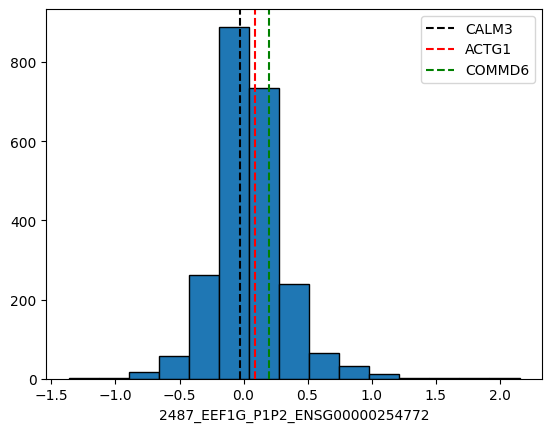

In [842]:
EEF1G = plt.hist(list(crispr_gene1_new['2487_EEF1G_P1P2_ENSG00000254772']), bins=15, edgecolor='k')
CALM3 = plt.axvline(crispr_gene1_new[crispr_gene1_new['gene_name'] == 'CALM3']['2487_EEF1G_P1P2_ENSG00000254772'].iloc[-1], 
            color='black', linestyle='dashed', label='CALM3')
ACTG1 = plt.axvline(crispr_gene1_new[crispr_gene1_new['gene_name'] == 'ACTG1']['2487_EEF1G_P1P2_ENSG00000254772'].iloc[-1], 
                    color='r', linestyle='dashed', label='ACTG1')
COMMD6 = plt.axvline(crispr_gene1_new[crispr_gene1_new['gene_name'] == 'COMMD6']['2487_EEF1G_P1P2_ENSG00000254772'].iloc[-1], 
                     color='green', linestyle='dashed', label='COMMD6')
plt.xlabel('2487_EEF1G_P1P2_ENSG00000254772')
plt.legend()
plt.show()

In [845]:
def hist(df, dict):
    cmap = plt.get_cmap('tab10')  
    for key, value in dict.items():
        for col in df.columns[1:]:
            if re.search('_' + key + '_', col):
                plt.hist(list(df[col]), bins=30, edgecolor='k', color='lightgrey')

                for idx, val in enumerate(value):
                    color = cmap(idx % 10)  #modulo to cycle through colors
                    plt.axvline(df[df['gene_name'] == val][col].iloc[-1], color=color,
                                linestyle='dashed', label=(val + " " + str(round(df[df['gene_name'] == val][col].iloc[-1], 3))))
                plt.title('Distribution of target genes of guide ' + key)
                plt.ylabel('Count target genes')
                plt.xlabel('Z-score')
                plt.legend()
                plt.show()

In [847]:
len(coeqtl_dict_match)

376

In [859]:
test = crispr_gene1_new[crispr_gene1_new['gene_name'].isin(df_crispr_co_eqtl['gene_name'])]


In [863]:
def style(p):
    p.legend.location = "top_right"
    p.toolbar.autohide = True
    p.legend.click_policy = 'hide'
    p.xaxis.axis_line_width = 2
    p.yaxis.axis_line_width = 2
    p.xaxis.axis_label_standoff = 5
    p.yaxis.axis_label_standoff = 5
    p.xaxis.major_tick_line_width = 2
    p.yaxis.major_tick_line_width = 2
    p.xaxis.axis_label_text_font_size = '16px'
    p.yaxis.axis_label_text_font_size = '16px'
    p.xaxis.major_label_text_font_size ="14px"
    p.yaxis.major_label_text_font_size ="14px"
    return p 

In [864]:
def create_bokeh_plot(df, dictionary, selected_col, df_filter):
    #Colors to use
    cmap = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    #Create figure
    p = figure(title=('Distribution of target genes of guide ' + selected_col),
               x_axis_label='Z-score', y_axis_label='Count target genes (log10)', width=1000,
               tools='save')#toolbar_location=None)
    #hover = HoverTool(tooltips=[('Count', '@top'), ('score', '@edges')], mode='mouse')

    for key, value in dictionary.items():
        for col in df.columns[1:]:
            if re.search('_' + key + '_', col) and col == selected_col: #(works with the original criprs colnames)
            #if key == col and col == selected_col: #some cols don't show a hist
                # Filter out NaN values before creating the histogram
                data = list(df[col].dropna())
                data1 = list(df_filter[col].dropna())
                
                if data:  # Check if there is data after dropping NaN values
                    # Plot histogram
                    hist, edges = np.histogram(data, bins=np.arange(min(data), max(data), 0.05))
                   
                    hist = [1.1 if x == 1 else (1 if x == 0 else x) for x in hist]
                    source = ColumnDataSource(dict(top=np.log10(hist), left=edges[:-1], right=edges[1:]))

                    plot =p.quad(top='top', bottom=0, left='left', right='right', 
                           fill_color='lightgrey', line_color="#033649", alpha=0.5, 
                           legend_label=('mean z-score '+ str(round(stats.mean(data), 3)) 
                                         + ' (' +  str(len(data)) + ' genes)'), source=source)
                    p.add_tools(HoverTool(renderers=[plot], tooltips=[('Count',"@top"), ('z-score', '@left')],
                                          mode='vline', description='all tested genes') )

                    hist1, edges1 = np.histogram(data1, bins=np.arange(min(data1), max(data1), 0.05))
                    hist1 = [1.1 if x == 1 else (1 if x == 0 else x) for x in hist1]
                    source1 = ColumnDataSource(dict(top=np.log10(hist1), left=edges1[:-1], right=edges1[1:]))
                    
                    plot1 =p.quad(top='top', bottom=0, left='left', right='right', 
                           fill_color='darkgrey', line_color="#033649", alpha= 0.7, 
                           legend_label=('mean z-score ' + str(round(stats.mean(data1), 3)) 
                                         + ' (' + str(len(data1)) + ' genes)'), source=source1)
                    p.add_tools(HoverTool(renderers=[plot1], tooltips=[('Count',"@top"), ('score', '@left')],mode='vline'))

                    # Plot vertical lines
                    for idx, val in enumerate(value):
                        color = cmap[idx % 10]  # Use modulo to cycle through colors
                        p.line([df[df['gene_name'] == val][col].iloc[-1], df[df['gene_name'] == val][col].iloc[-1]],
                               [0, 1000],
                               line_color=color, line_dash="dashed", line_width=2.5,
                               legend_label=(val + " " + str(round(df[df['gene_name'] == val][col].iloc[-1], 3))))
                    # Show the average/mean z-score if there are multiple cis-genes/gene 1's
                    if len(value) > 1:
                        p.line([round(df[df['gene_name'].isin(value)][col].mean(), 3),
                                round(df[df['gene_name'].isin(value)][col].mean(), 3)],
                               [0, 1000], alpha=0,
                               legend_label=('mean lines '+ str(round(df[df['gene_name'].isin(value)][col].mean(), 3))))
                    
    p.y_range = Range1d(0, max(np.log10(hist) * 1.1))
    p = style(p)
    #p.add_layout(p.legend[0], 'right')

    return p


In [867]:
def hist_bokeh(df, dictionary, df_filter):
    available_columns = [col for col in df.columns[1:]]
    selected_column = pn.widgets.Select(options=available_columns, name='Select a guide')

    @pn.depends(selected_column.param.value)
    def update_plot(selected_col):
        return create_bokeh_plot(df, dictionary, selected_col, df_filter)

    pn.Column(
        selected_column, update_plot,
    ).show()

In [870]:
df_filter = crispr_gene1_new[crispr_gene1_new['gene_name'].isin(list(df_crispr_co_eqtl['gene_name']))]

In [ ]:
hist_bokeh(crispr_gene1_new, coeqtl_dict_match, df_filter)

Launching server at http://localhost:60187


'older' coeqtls

In [875]:
hline = hv.VLine(crispr[crispr['gene_name'] == 'CFL1']['1823_COX7C_P1P2_ENSG00000127184'].iloc[-1])
hline.opts(color='black', line_dash='dashed')
match_co_eqtl.hvplot.hist('1823_COX7C_P1P2_ENSG00000127184') * hline

:Overlay
   .Histogram.I :Histogram   [1823_COX7C_P1P2_ENSG00000127184]   (1823_COX7C_P1P2_ENSG00000127184_count)
   .VLine.I     :VLine   [x,y]

***

### Sort co-eqtl correctly for egene and coegene <br>
Newest unfiltered co-eqtls

In [877]:
df_egene_coegene = pd.read_csv('data/coeqtl/egene_coegene_sceqtlgen.tsv', sep= '\t')

In [878]:
df_egene_coegene

,feature_id,snp_id,coeQTL,egene,coegene
0,CWF19L1_PHACTR1,10:100055816:G:A,0,CWF19L1,PHACTR1
1,CWF19L1_TTC32,10:100055816:G:A,0,CWF19L1,TTC32
2,CWF19L1_ZNF600,10:100055816:G:A,0,CWF19L1,ZNF600
3,CWF19L1_MPC1,10:100055816:G:A,0,CWF19L1,MPC1
4,CWF19L1_DHFR2,10:100055816:G:A,0,CWF19L1,DHFR2
...,...,...,...,...,...
31497748,ARL6IP4_INVS,9:99971288:CTT:C,0,INVS,ARL6IP4
31497749,CAPZA2_INVS,9:99971288:CTT:C,0,INVS,CAPZA2
31497750,INVS_PSMB4,9:99971288:CTT:C,0,INVS,PSMB4
31497751,INVS_SLC43A1,9:99971288:CTT:C,0,INVS,SLC43A1


In [879]:
df_egene_coegene['coeQTL'].value_counts()

0    31491124
1        6629
Name: coeQTL, dtype: int64

In [ ]:
df_crispr_coeqtl = df_crispr[df_crispr.columns.intersection(df_egene_coegene['coegene'])]
df_crispr_coeqtl.insert(0, 'gene_name', df_crispr['gene_name'])
df_crispr_coeqtl = df_crispr_coeqtl[df_crispr_coeqtl['gene_name'].isin(df_egene_coegene['egene'])]
df_crispr_coeqtl

,gene_name,ZC3H13,ZCRB1,ZDHHC7,ZFC3H1,NDUFAF8,ZFR,C18orf21,ZMAT2,ZNF207,...,WNK1,WRAP53,XPO1,XRCC5,XRN2,YBEY,YBX3,YEATS2,YEATS4,C16orf72
5,MAD1L1,0.282541,-0.083874,-0.150563,-0.122115,0.065532,0.068533,-0.071954,0.124581,-0.028117,...,0.075935,-0.148233,0.067429,-0.033156,0.347097,0.073877,0.054251,0.060587,-0.057528,-0.075698
6,CFLAR,0.234939,-0.031453,0.590044,0.251272,0.068093,-0.016753,0.335709,0.105353,0.428431,...,0.151068,0.140653,0.176876,0.202953,0.013178,-0.081765,0.165886,0.107937,-0.035196,-0.025158
13,SKAP2,0.052481,-0.031207,0.273463,0.044025,0.086852,0.101059,-0.057790,0.075981,0.119446,...,0.049613,-0.004070,0.149768,0.200286,-0.072329,0.053958,0.127056,0.092809,-0.224594,0.053786
15,POLR2J,-0.076327,0.008678,-0.053324,-0.048413,-0.020213,-0.116076,0.502302,0.019046,-0.108389,...,0.091389,-0.040878,0.153504,0.339866,0.152486,0.087480,0.191271,0.206128,-0.064640,-0.056096
16,ACSM3,-0.144174,0.311790,0.043482,0.663625,0.068436,0.248945,-0.109985,-0.245672,0.191213,...,-0.215980,-0.069585,0.517988,-0.095474,0.176546,0.030054,0.211608,-0.080159,0.016158,-0.152346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,TAF15,-0.221373,-0.235591,0.251235,0.091972,0.105411,-0.037433,-0.062209,-0.086524,-0.453667,...,0.123681,-0.002932,-0.209295,-0.045559,-0.100892,-0.172765,-0.035819,0.050330,0.002482,-0.059286
2299,GTF2H5,0.295310,-0.019330,0.056589,0.113873,0.043798,0.188583,-0.077074,-0.045109,-0.281496,...,-0.097011,-0.085109,0.170226,-0.192021,0.068127,0.102516,-0.175539,-0.004004,-0.056317,-0.041069
2303,TAF9,-0.263036,-0.056961,-0.131263,-0.059916,0.022127,0.206254,-0.195500,-0.430608,0.033324,...,0.044083,-0.108492,-0.012190,-0.358441,-0.059710,0.039966,0.005366,-0.095581,0.040918,0.062077
2309,PSMB3,-0.330507,0.036862,0.063084,-0.043329,-0.145916,-0.055789,0.324897,0.049684,-0.032362,...,0.031505,0.043391,-0.101525,-0.009689,0.079871,-0.119016,0.126114,0.142266,-0.082137,-0.097805


In [ ]:
df_crispr_coeqtl_egene = df_crispr[df_crispr.columns.intersection(df_egene_coegene['egene'])]
df_crispr_coeqtl_egene.insert(0, 'gene_name', df_crispr['gene_name'])
df_crispr_coeqtl_egene = df_crispr_coeqtl_egene[df_crispr_coeqtl_egene['gene_name'].isin(df_egene_coegene['coegene'])]
df_crispr_coeqtl_egene

,gene_name,ZC3H13,ZCRB1,ZDHHC7,ZFC3H1,NDUFAF8,ZFR,C18orf21,ZMAT2,ZNF207,...,WNK1,WRAP53,XPO1,XRCC5,XRN2,YBEY,YBX3,YEATS2,YEATS4,C16orf72
5,MAD1L1,0.282541,-0.083874,-0.150563,-0.122115,0.065532,0.068533,-0.071954,0.124581,-0.028117,...,0.075935,-0.148233,0.067429,-0.033156,0.347097,0.073877,0.054251,0.060587,-0.057528,-0.075698
6,CFLAR,0.234939,-0.031453,0.590044,0.251272,0.068093,-0.016753,0.335709,0.105353,0.428431,...,0.151068,0.140653,0.176876,0.202953,0.013178,-0.081765,0.165886,0.107937,-0.035196,-0.025158
13,SKAP2,0.052481,-0.031207,0.273463,0.044025,0.086852,0.101059,-0.057790,0.075981,0.119446,...,0.049613,-0.004070,0.149768,0.200286,-0.072329,0.053958,0.127056,0.092809,-0.224594,0.053786
15,POLR2J,-0.076327,0.008678,-0.053324,-0.048413,-0.020213,-0.116076,0.502302,0.019046,-0.108389,...,0.091389,-0.040878,0.153504,0.339866,0.152486,0.087480,0.191271,0.206128,-0.064640,-0.056096
16,ACSM3,-0.144174,0.311790,0.043482,0.663625,0.068436,0.248945,-0.109985,-0.245672,0.191213,...,-0.215980,-0.069585,0.517988,-0.095474,0.176546,0.030054,0.211608,-0.080159,0.016158,-0.152346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,TAF15,-0.221373,-0.235591,0.251235,0.091972,0.105411,-0.037433,-0.062209,-0.086524,-0.453667,...,0.123681,-0.002932,-0.209295,-0.045559,-0.100892,-0.172765,-0.035819,0.050330,0.002482,-0.059286
2299,GTF2H5,0.295310,-0.019330,0.056589,0.113873,0.043798,0.188583,-0.077074,-0.045109,-0.281496,...,-0.097011,-0.085109,0.170226,-0.192021,0.068127,0.102516,-0.175539,-0.004004,-0.056317,-0.041069
2303,TAF9,-0.263036,-0.056961,-0.131263,-0.059916,0.022127,0.206254,-0.195500,-0.430608,0.033324,...,0.044083,-0.108492,-0.012190,-0.358441,-0.059710,0.039966,0.005366,-0.095581,0.040918,0.062077
2309,PSMB3,-0.330507,0.036862,0.063084,-0.043329,-0.145916,-0.055789,0.324897,0.049684,-0.032362,...,0.031505,0.043391,-0.101525,-0.009689,0.079871,-0.119016,0.126114,0.142266,-0.082137,-0.097805


In [ ]:
df_egene_coegene_new = df_egene_coegene[(df_egene_coegene['coegene'].isin(df_crispr_coeqtl.columns[1:])) & (df_egene_coegene['egene'].isin(df_crispr_coeqtl['gene_name']))]
df_egene_coegene_new

,feature_id,snp_id,coeQTL,egene,coegene
23520,NDUFB8_TMED10,10:100586333:T:TA,0,NDUFB8,TMED10
23533,NDUFB8_VPS4A,10:100586333:T:TA,0,NDUFB8,VPS4A
23536,NDUFB8_PLEKHA5,10:100586333:T:TA,0,NDUFB8,PLEKHA5
23543,ATP5PO_NDUFB8,10:100586333:T:TA,0,NDUFB8,ATP5PO
23548,NDUFB8_PDRG1,10:100586333:T:TA,0,NDUFB8,PDRG1
...,...,...,...,...,...
31465351,ANP32B_PSMC1,9:98017781:T:G,0,ANP32B,PSMC1
31465355,ANP32B_LSG1,9:98017781:T:G,0,ANP32B,LSG1
31465358,ANP32B_PAK1,9:98017781:T:G,0,ANP32B,PAK1
31465370,ANP32B_MICA,9:98017781:T:G,0,ANP32B,MICA


In [ ]:
df_crispr_coeqtl_cols = list(df_crispr_coeqtl.columns[1:])

In [ ]:
cols = list(set([x for x in df_crispr_coeqtl_cols if df_crispr_coeqtl_cols.count(x) > 1]))
print(cols)

['CCNK', 'LSM5', 'FBXW7']


In [ ]:
df_crispr_coeqtl[df_crispr_coeqtl.columns.intersection(cols)].describe()

,CCNK,CCNK,FBXW7,FBXW7,LSM5,LSM5
count,1169.000000,1169.000000,1169.000000,1169.000000,1168.000000,1168.000000
mean,0.003358,0.009772,-0.026363,-0.010922,0.004102,-0.000269
std,0.069403,0.167905,0.110395,0.094457,0.127234,0.290513
min,-0.276254,-0.858342,-0.415633,-0.293096,-0.481884,-0.930126
25%,-0.040677,-0.060883,-0.097812,-0.071376,-0.074611,-0.189780
50%,0.003101,0.023052,-0.035198,-0.019595,0.001894,-0.019938
75%,0.044846,0.098404,0.029124,0.040448,0.080086,0.165993
max,0.351162,0.857070,0.497211,0.382102,0.592455,2.433475


In [ ]:
df_crispr_coeqtl_drop_duplicated_col = df_crispr_coeqtl.loc[:,~df_crispr_coeqtl.columns.duplicated()].copy()

In [ ]:
df_crispr_coeqtl_drop_duplicated_col

,gene_name,ZC3H13,ZCRB1,ZDHHC7,ZFC3H1,NDUFAF8,ZFR,C18orf21,ZMAT2,ZNF207,...,WNK1,WRAP53,XPO1,XRCC5,XRN2,YBEY,YBX3,YEATS2,YEATS4,C16orf72
5,MAD1L1,0.282541,-0.083874,-0.150563,-0.122115,0.065532,0.068533,-0.071954,0.124581,-0.028117,...,0.075935,-0.148233,0.067429,-0.033156,0.347097,0.073877,0.054251,0.060587,-0.057528,-0.075698
6,CFLAR,0.234939,-0.031453,0.590044,0.251272,0.068093,-0.016753,0.335709,0.105353,0.428431,...,0.151068,0.140653,0.176876,0.202953,0.013178,-0.081765,0.165886,0.107937,-0.035196,-0.025158
13,SKAP2,0.052481,-0.031207,0.273463,0.044025,0.086852,0.101059,-0.057790,0.075981,0.119446,...,0.049613,-0.004070,0.149768,0.200286,-0.072329,0.053958,0.127056,0.092809,-0.224594,0.053786
15,POLR2J,-0.076327,0.008678,-0.053324,-0.048413,-0.020213,-0.116076,0.502302,0.019046,-0.108389,...,0.091389,-0.040878,0.153504,0.339866,0.152486,0.087480,0.191271,0.206128,-0.064640,-0.056096
16,ACSM3,-0.144174,0.311790,0.043482,0.663625,0.068436,0.248945,-0.109985,-0.245672,0.191213,...,-0.215980,-0.069585,0.517988,-0.095474,0.176546,0.030054,0.211608,-0.080159,0.016158,-0.152346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,TAF15,-0.221373,-0.235591,0.251235,0.091972,0.105411,-0.037433,-0.062209,-0.086524,-0.453667,...,0.123681,-0.002932,-0.209295,-0.045559,-0.100892,-0.172765,-0.035819,0.050330,0.002482,-0.059286
2299,GTF2H5,0.295310,-0.019330,0.056589,0.113873,0.043798,0.188583,-0.077074,-0.045109,-0.281496,...,-0.097011,-0.085109,0.170226,-0.192021,0.068127,0.102516,-0.175539,-0.004004,-0.056317,-0.041069
2303,TAF9,-0.263036,-0.056961,-0.131263,-0.059916,0.022127,0.206254,-0.195500,-0.430608,0.033324,...,0.044083,-0.108492,-0.012190,-0.358441,-0.059710,0.039966,0.005366,-0.095581,0.040918,0.062077
2309,PSMB3,-0.330507,0.036862,0.063084,-0.043329,-0.145916,-0.055789,0.324897,0.049684,-0.032362,...,0.031505,0.043391,-0.101525,-0.009689,0.079871,-0.119016,0.126114,0.142266,-0.082137,-0.097805


In [ ]:
# assigning crispr score
sc_crispr_score = []
for egene, coegene in zip(list(df_egene_coegene_new['egene']), list(df_egene_coegene_new['coegene'])):
    sc_crispr_score.append(df_crispr_coeqtl_drop_duplicated_col[df_crispr_coeqtl_drop_duplicated_col['gene_name'] == egene][coegene].iloc[0])
print(len(sc_crispr_score))


972733


In [ ]:
df_egene_coegene_new.insert(5, 'crispr_score', sc_crispr_score)

In [ ]:
df_egene_coegene_new

,feature_id,snp_id,coeQTL,egene,coegene,crispr_score
23520,NDUFB8_TMED10,10:100586333:T:TA,0,NDUFB8,TMED10,-0.013124
23533,NDUFB8_VPS4A,10:100586333:T:TA,0,NDUFB8,VPS4A,0.061456
23536,NDUFB8_PLEKHA5,10:100586333:T:TA,0,NDUFB8,PLEKHA5,-0.037395
23543,ATP5PO_NDUFB8,10:100586333:T:TA,0,NDUFB8,ATP5PO,-0.028572
23548,NDUFB8_PDRG1,10:100586333:T:TA,0,NDUFB8,PDRG1,-0.038526
...,...,...,...,...,...,...
31465351,ANP32B_PSMC1,9:98017781:T:G,0,ANP32B,PSMC1,-0.476127
31465355,ANP32B_LSG1,9:98017781:T:G,0,ANP32B,LSG1,-0.893666
31465358,ANP32B_PAK1,9:98017781:T:G,0,ANP32B,PAK1,-0.027756
31465370,ANP32B_MICA,9:98017781:T:G,0,ANP32B,MICA,-0.137480


In [ ]:
len(df_egene_coegene_new['feature_id'].unique())

469479

In [ ]:
len(df_egene_coegene_new['snp_id'].unique())

2246

In [ ]:
df_egene_coegene_new['feature_id'].value_counts()

CENPK_HSD17B12    11
REEP5_YBX3        11
HSD17B12_YBX3     11
NDUFA6_REEP5      11
MRPL34_REEP5      11
                  ..
MAN1A2_RAB5A       1
EIF3D_RAB5A        1
DDX39B_RAB5A       1
RAB5A_SACM1L       1
NAA15_NDUFAF3      1
Name: feature_id, Length: 469479, dtype: int64

In [ ]:
df_egene_coegene_new.query('coeQTL == 1')['crispr_score']

1050147    -0.011278
1050433    -0.531213
1051100     0.144026
1052134    -0.532990
1053647    -0.030061
              ...   
28391089    0.105998
28391104   -0.218610
29065915   -0.223802
30585124   -0.333609
30803845    0.931788
Name: crispr_score, Length: 1194, dtype: float64

In [ ]:
def crispr_coegene_sig_nsig_1(df):
    """
    mean crispr_score per colom/guide for significant coegenes
    """
    #coegenes = list(df['coegene'].unique())
    sig_coegenes = list(df[df['coeQTL'] == 1]['coegene'].unique())
    sig_list = []
    nsig_list = []
    for coegene in sig_coegenes:
        df_one_coegene = df.query('coegene == @coegene')
        sig = list(df_one_coegene.query('coeQTL ==1')['crispr_score'])
        nsig = list(df_one_coegene.query('coeQTL == 0')['crispr_score'])
        sig_list.append(np.mean(sig))
        nsig_list.append(np.mean(nsig))
    return sig_list, nsig_list, sig_coegenes

In [ ]:
def crispr_coegene_sig_nsig_2(df):
    """
    All crispr_scores (not crisprscores per guide/colom/coeqtl)
    for sig coegenes
    """
    #coegenes = list(df['coegene'].unique())
    sig_coegenes = list(df[df['coeQTL'] == 1]['coegene'].unique())
    sig_list = []
    nsig_list = []
    for coegene in sig_coegenes:
        df_one_coegene = df.query('coegene == @coegene')
        sig = list(df_one_coegene.query('coeQTL ==1')['crispr_score'])
        nsig = list(df_one_coegene.query('coeQTL == 0')['crispr_score'])
        for x in sig:
            sig_list.append(x)
        for y in nsig:
            nsig_list.append(y)
    return sig_list, nsig_list

In [ ]:
def crispr_coegene_sig_nsig(df):
    """
    mean crispr score for all coegenes
    """
    coegenes = list(df['coegene'].unique())
    #sig_coegenes = list(df[df['coeQTL'] == 1]['coegene'].unique())
    sig_list = []
    nsig_list = []
    for coegene in coegenes:
        df_one_coegene = df.query('coegene == @coegene')
        sig = list(df_one_coegene.query('coeQTL ==1')['crispr_score'])
        nsig = list(df_one_coegene.query('coeQTL == 0')['crispr_score'])
        sig_list.append(np.mean(sig))
        nsig_list.append(np.mean(nsig))
    return sig_list, nsig_list

In [ ]:
def crispr_coegene_sig_nsig_list(df):
    """
    sig coegenes per guide
    """
    #coegenes = list(df['coegene'].unique())
    sig_coegenes = list(df[df['coeQTL'] == 1]['coegene'].unique())
    sig_list = []
    nsig_list = []
    for coegene in sig_coegenes:
        df_one_coegene = df.query('coegene == @coegene')
        sig = list(df_one_coegene.query('coeQTL ==1')['crispr_score'])
        nsig = list(df_one_coegene.query('coeQTL == 0')['crispr_score'])
        sig_list.append(sig)
        nsig_list.append(nsig)
    return sig_list, nsig_list, sig_coegenes

In [ ]:
sig_list, nsig_list = crispr_coegene_sig_nsig(df_egene_coegene_new)

c:\Users\annav\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\annav\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
sig_list[:5]

[nan, nan, -0.0277669957349006, 0.07148706295221535, nan]

In [ ]:
sig_list1, nsig_list1, sig_coegenes= crispr_coegene_sig_nsig_1(df_egene_coegene_new)

In [ ]:
print(len(sig_list1))
print(len(nsig_list1))

203
203


In [ ]:
print(len(sig_list))
print(len(nsig_list))

865
865


In [ ]:
print(pd.isna(sig_list).sum())
print(pd.isna(sig_list1).sum())

662
0


In [ ]:
sig_list2, nsig_list2 = crispr_coegene_sig_nsig_2(df_egene_coegene_new)

In [ ]:
sig1, nsig1 = crispr_coegene_sig_nsig_2(df_egene_coegene_new)

In [ ]:
print(np.mean(sig1))
print(np.mean(nsig1))
sp.ttest_ind((sig1), (nsig1))

-0.015925935426125307
0.022737833446844654


TtestResult(statistic=-6.077940482390292, pvalue=1.2192787375571054e-09, df=228104.0)

In [ ]:
print(np.mean(sig_list1))
print(np.mean(nsig_list1))
sp.ttest_rel((sig_list1), (nsig_list1))

-0.11269754507530208
0.028240117400187385


TtestResult(statistic=-9.4924678726922, pvalue=6.610393805355658e-18, df=202)

In [ ]:
sigs, nsigs, coegenes = crispr_coegene_sig_nsig_list(df_egene_coegene_new)

In [ ]:
#print(test)
print(len(sigs))

203


In [ ]:
def crispr_coegene_sig_nsig_unique(df):
    #coegenes = list(df['coegene'].unique())
    """
    Return unique crispr_scores based on significance in lists
    Return mean crispr_scores per coegene in lists
    """
    sig_coegenes = list(df[df['coeQTL'] == 1]['coegene'].unique())
    mean_sig_list = []
    mean_nsig_list = []
    unique_sig_list = []
    unique_nsig_list = []
    for coegene in sig_coegenes:
        df_one_coegene = df.query('coegene == @coegene')
        #Significant coegenes    
        sig = list(df_one_coegene.query('coeQTL ==1')['crispr_score'].unique())
        mean_sig_list.append(np.mean(sig))
        unique_sig = list(df_one_coegene.query('coeQTL ==1')['crispr_score'].unique())
        for x in unique_sig:
            unique_sig_list.append(x)

        #Non signficiant coegenes
        nsig = list(df_one_coegene.query('coeQTL == 0')['crispr_score'].unique())
        mean_nsig_list.append(np.mean(nsig))
        unique_nsig = list(df_one_coegene.query('coeQTL ==0')['crispr_score'].unique())
        for y in unique_nsig:
            unique_nsig_list.append(y)
                    
    return unique_sig_list, unique_nsig_list, mean_sig_list, mean_nsig_list

In [ ]:
sig_list, nsig_list, sig_coegenes, unique_sig, unique_nsig = crispr_coegene_sig_nsig_list(df_egene_coegene_new)

In [ ]:
unique_sig_list, unique_nsig_list, mean_sig_list, mean_nsig_list= crispr_coegene_sig_nsig_unique(df_egene_coegene_new)

In [ ]:
print(len(unique_sig_list))
print(len(unique_nsig_list))
print(len(mean_sig_list))
print(len(mean_nsig_list))

512
114900
203
203


In [ ]:
#Uniques without mean: ind ttest
print(np.mean(unique_sig_list))
print(np.mean(unique_nsig_list))
sp.ttest_ind((unique_sig_list), (unique_nsig_list))

-0.06421595184164575
0.020047378452109993


TtestResult(statistic=-8.666111336821801, pvalue=4.527701484768996e-18, df=115410.0)

In [ ]:
#Uniques with mean: paired ttest
print(np.mean(mean_sig_list))
print(np.mean(mean_nsig_list))
origianl_stats, original_pvalue = sp.ttest_rel((mean_sig_list), (mean_nsig_list))
original_pvalue

-0.12259437337357791
0.026764382930865877


1.910615093623455e-20

In [ ]:
# Rank based test:wilcoxon (two related paired samples come from the same distribution.)
from scipy.stats import wilcoxon
x = np.array(mean_sig_list)
y = np.array(mean_nsig_list)
res = wilcoxon(x, y)
res

WilcoxonResult(statistic=2856.0, pvalue=3.6832693552721824e-19)

In [ ]:
# Rank based test: mann whitney (two independent samples,non parametric)
from scipy.stats import mannwhitneyu
mannwhitneyu(unique_sig_list,unique_nsig_list)

MannwhitneyuResult(statistic=23936090.5, pvalue=3.2629547621400134e-13)

Check if crispr score of gene pairs are assigned multiple times

In [ ]:
def crispr_coegene_sig_nsig_list(df):
    #coegenes = list(df['coegene'].unique())
    sig_coegenes = list(df[df['coeQTL'] == 1]['coegene'].unique())
    sig_list = []
    nsig_list = []
    unique_sig_list = []
    unique_nsig_list = []
    with open("data\coeqtl\scores\crispr_scores_per_guide.txt","w") as f:
        f.write('target\tsig\tnsig\n')
        for coegene in sig_coegenes:
            df_one_coegene = df.query('coegene == @coegene')
            
            sig = list(df_one_coegene.query('coeQTL ==1')['crispr_score'])
            sig_egene = list(df_one_coegene.query('coeQTL ==1')['egene'])
#             sig_egene_dict = {sig_egene[i]: sig[i] for i in range(len(sig_egene))}
            sigs = []
            for sig, sig_egene in zip(sig, sig_egene):
                sigs.append(sig_egene + ':' + str(sig))
            unique_sig_list.append(list(df_one_coegene.query('coeQTL ==1')['crispr_score'].unique()))
            nsig = list(df_one_coegene.query('coeQTL == 0')['crispr_score'])
            nsig_egene = list(df_one_coegene.query('coeQTL ==0')['egene'])
            nsigs = []
#             nsig_egene_dict = {nsig_egene[i]: nsig[i] for i in range(len(nsig_egene))}
            for nsig, nsig_egene in zip(nsig, nsig_egene):
                nsigs.append(nsig_egene + ':' + str(nsig))
            unique_nsig_list.append(list(df_one_coegene.query('coeQTL ==0')['crispr_score'].unique()))  
            sig_list.append(sig)
            nsig_list.append(nsig)
            f.write("{0}\t {1}\t {2}\n".format(coegene,sigs,  nsigs))
            
    return sig_list, nsig_list, sig_coegenes, unique_sig_list, unique_nsig_list

In [ ]:
test = pd.read_csv('data\coeqtl\scores\crispr_scores_per_guide.txt', sep='\t')

In [ ]:
test


,target,sig,nsig
0,NOP53,"['PPA1:-0.0112775887607006', 'PPA1:-0.0112775...","['PDCD4:-0.2833197017788658', 'PDCD4:-0.28331..."
1,EEF1G,"['PPA1:-0.5312129441331336', 'PPA1:-0.5312129...","['NDUFB8:0.0486812246602761', 'NOLC1:-0.19418..."
2,EIF3G,"['PPA1:0.144026290466778', 'PPA1:0.1440262904...","['NDUFB8:0.0083798218137603', 'NOLC1:-0.21683..."
3,NACA,"['PPA1:-0.5329897541230528', 'PPA1:-0.5329897...","['NDUFB8:0.0019964582848278', 'NOLC1:-0.20095..."
4,FAU,"['PPA1:-0.0300611997698256', 'PPA1:-0.0300611...","['NDUFB8:0.2024252813019658', 'NOLC1:0.087416..."
...,...,...,...
198,REEP5,['SERPINB6:-0.039076229063384'],"['NDUFB8:-0.0717341495351593', 'IDI1:-0.05692..."
199,MRPS33,['HLA-C:-0.0990653827196827'],"['NOLC1:0.0066039588704033', 'IDI1:-0.2364485..."
200,RICTOR,['HLA-C:-0.0018918111018515'],"['ADD3:-0.0092368178535913', 'CELF2:0.0520308..."
201,DDI2,['AIF1:0.2124230889006145'],"['ADD3:-0.0699571053127104', 'CELF2:-0.062483..."


In [ ]:
test[test['target']=='NOP53']['sig'][0]

" ['PPA1:-0.0112775887607006', 'PPA1:-0.0112775887607006', 'RPL36AL:-0.1155433174247542', 'RPL36AL:-0.1155433174247542', 'RPL36AL:-0.1155433174247542', 'RPL36AL:-0.1155433174247542', 'RPL36AL:-0.1155433174247542', 'SMDT1:0.0797251518729989', 'SMDT1:0.0797251518729989', 'SMDT1:0.0797251518729989', 'SMDT1:0.0797251518729989', 'SMDT1:0.0797251518729989', 'SNHG8:0.1274128930532849', 'SNHG8:0.1274128930532849', 'SNHG8:0.1274128930532849', 'RNASET2:-0.0441727618493568', 'RNASET2:-0.0441727618493568', 'RNASET2:-0.0441727618493568', 'HLA-C:0.1646200111653729', 'HLA-C:0.1646200111653729', 'HLA-C:0.1646200111653729', 'HLA-C:0.1646200111653729']"

In [ ]:
test.iloc[0,1]

" ['PPA1:-0.0112775887607006', 'PPA1:-0.0112775887607006', 'RPL36AL:-0.1155433174247542', 'RPL36AL:-0.1155433174247542', 'RPL36AL:-0.1155433174247542', 'RPL36AL:-0.1155433174247542', 'RPL36AL:-0.1155433174247542', 'SMDT1:0.0797251518729989', 'SMDT1:0.0797251518729989', 'SMDT1:0.0797251518729989', 'SMDT1:0.0797251518729989', 'SMDT1:0.0797251518729989', 'SNHG8:0.1274128930532849', 'SNHG8:0.1274128930532849', 'SNHG8:0.1274128930532849', 'RNASET2:-0.0441727618493568', 'RNASET2:-0.0441727618493568', 'RNASET2:-0.0441727618493568', 'HLA-C:0.1646200111653729', 'HLA-C:0.1646200111653729', 'HLA-C:0.1646200111653729', 'HLA-C:0.1646200111653729']"

***

In [ ]:
df_pvals = pd.read_csv("data/coeqtl/reduced_sig_coeqtls_with_pvals.tsv.gz", sep = '\t')

In [ ]:
feature_ids = list(df_egene_coegene_new['feature_id'])
snp_ids = list(df_egene_coegene_new['snp_id'])

In [ ]:
snp_ids = list(df_egene_coegene_new['snp_id'].unique())
feature_ids = list(df_egene_coegene_new['feature_id'].unique())
len(snp_ids)
len(feature_ids)

469479

In [ ]:
df_egene_coegene_new[df_egene_coegene_new['coegene'] == 'EEF1G']

,feature_id,snp_id,coeQTL,egene,coegene,crispr_score
25794,EEF1G_NDUFB8,10:100586333:T:TA,0,NDUFB8,EEF1G,0.048681
53741,EEF1G_NOLC1,10:101903032:T:C,0,NOLC1,EEF1G,-0.194184
76862,EEF1G_GTPBP4,10:1025541:CA:C,0,GTPBP4,EEF1G,-0.320551
115077,EEF1G_GTPBP4,10:1029548:A:AT,0,GTPBP4,EEF1G,-0.320551
129382,EEF1G_IDI1,10:1034453:C:T,0,IDI1,EEF1G,-0.062283
...,...,...,...,...,...,...
31288409,EEF1G_RFK,9:76503987:A:C,0,RFK,EEF1G,-0.119320
31396321,EEF1G_FAM120AOS,9:93571634:T:C,0,FAM120AOS,EEF1G,0.070490
31428184,EEF1G_XPA,9:97515201:G:GAA,0,XPA,EEF1G,-0.077794
31431176,EEF1G_TMOD1,9:97575029:G:A,0,TMOD1,EEF1G,-0.009267


In [ ]:
df_egene_coegene['coeQTL'].value_counts()

0    31491124
1        6629
Name: coeQTL, dtype: int64

In [ ]:
df_egene_coegene_new['coeQTL'].value_counts()

0    971539
1      1194
Name: coeQTL, dtype: int64

In [ ]:
df_egene_coegene[df_egene_coegene['coeQTL'] == 1 ]['snp_id'].value_counts()

12:56007301:G:A    610
17:7304878:C:T     437
22:42092902:G:A    133
22:42108675:A:G    133
22:42102200:C:T    133
                  ... 
19:57331281:C:A      1
19:57358779:G:A      1
19:57500053:G:T      1
19:57831907:T:C      1
9:98026030:T:C       1
Name: snp_id, Length: 795, dtype: int64

In [ ]:
df_egene_coegene[df_egene_coegene['coeQTL'] == 1 ]['egene'].value_counts()#['egene'].value_counts()

SMDT1       664
RPS26       609
EIF5A       437
SH3YL1      296
SNHG8       264
           ... 
PRRG2         1
PAFAH1B3      1
CATSPERG      1
ZNF793        1
NANS          1
Name: egene, Length: 510, dtype: int64

In [ ]:
df_egene_coegene_new[df_egene_coegene_new['coeQTL'] == 1]['egene'].value_counts()

SMDT1         269
TOMM7         156
SNHG8         142
RPS26         101
EIF5A          89
SERPINB6       88
RPL36AL        80
RPS10          60
RPS5           38
RNASET2        31
TUFM           20
HLA-C          17
RPS17          16
CENPK          16
PPA1           12
FAM118A        12
VAMP2           5
ENO1            5
RPS18           5
NME4            3
HELLS           3
TRAPPC2L        3
DDT             2
RPL28           2
HDGFL3          2
SH3GLB1         2
GABPB1-AS1      2
RPL12           1
BCL7B           1
TUBA1B          1
NACA            1
AIF1            1
TFDP2           1
CCT8            1
ACOT13          1
DEGS1           1
CANX            1
PRELID1         1
LYRM7           1
SNHG7           1
Name: egene, dtype: int64

In [ ]:
df_egene_coegene_new[(df_egene_coegene_new['coeQTL'] == 1) & (df_egene_coegene_new['egene'] == 'SMDT1')]

,feature_id,snp_id,coeQTL,egene,coegene,crispr_score
18096993,EEF2_SMDT1,22:42067810:C:T,1,SMDT1,EEF2,0.265709
18097027,RPL11_SMDT1,22:42067810:C:T,1,SMDT1,RPL11,0.067118
18097035,ATP5PO_SMDT1,22:42067810:C:T,1,SMDT1,ATP5PO,0.116366
18097040,EEF1G_SMDT1,22:42067810:C:T,1,SMDT1,EEF1G,0.297678
18097066,RPS2_SMDT1,22:42067810:C:T,1,SMDT1,RPS2,0.149958
...,...,...,...,...,...,...
18104053,SMDT1_TXN,22:42108675:A:G,1,SMDT1,TXN,-0.106067
18104136,RPL31_SMDT1,22:42108675:A:G,1,SMDT1,RPL31,-0.018563
18104138,RPL9_SMDT1,22:42108675:A:G,1,SMDT1,RPL9,0.149196
18104198,RPS3A_SMDT1,22:42108675:A:G,1,SMDT1,RPS3A,0.101713


In [ ]:
len(df_egene_coegene_new[df_egene_coegene_new['coeQTL'] == 0 ]['egene'].value_counts())

1169

In [ ]:
df_egene_coegene_new['coegene'].value_counts()

ZNF496    2246
ZNF574    2239
ACTB      2173
WRAP53    2172
ZNF324    2171
          ... 
BYSL       195
ARMC7      193
BGLAP      177
ACTR5       95
ACTR8       93
Name: coegene, Length: 865, dtype: int64

In [ ]:
sig = list(df_egene_coegene_new[df_egene_coegene_new['coeQTL'] == 1 ]['crispr_score'])
nSig =list(df_egene_coegene_new[df_egene_coegene_new['coeQTL'] ==0]['crispr_score'])

print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))

-0.0159259354261253
0.026227274600180768


TtestResult(statistic=-6.838773090833606, pvalue=7.992109927919326e-12, df=972731.0)

In [ ]:
def filter_df_for_gene1(df, geneid, new_snp):
    df_crispr = df.copy()
    df_list = []
    for gene1, snp in zip(geneid, new_snp):
        df_new = df_crispr.query('snp_id == @snp and co_eqtl != @gene1')
        df_list.append(df_new)
    appended_df = pd.concat(df_list)
    return appended_df

### Filtered co-eqtl dataset

In [ ]:
filtered_sceqtlgen_coeqtl = pd.read_csv('data/coeqtl/filtered_coeqtls_sceqtlgen.tsv', sep='\t', compression='gzip')

In [ ]:
filtered_sceqtlgen_coeqtl

,feature_id,eqtl,co_eqtl,snp_id,coeQTL
0,A1BG_SCAMP4,A1BG,SCAMP4,19:58355068:G:A,0
1,A1BG_IZUMO4,A1BG,IZUMO4,19:58355068:G:A,0
2,A1BG-AS1_IZUMO4,A1BG-AS1,IZUMO4,19:58355068:G:A,0
3,A1BG_SCAMP4,A1BG,SCAMP4,19:58355068:G:A,0
4,A1BG_IZUMO4,A1BG,IZUMO4,19:58355068:G:A,0
...,...,...,...,...,...
22076633,ZNHIT6_ZSCAN26,ZNHIT6,ZSCAN26,1:85725230:CAA:C,0
22076634,ZNHIT6_ZSCAN18,ZNHIT6,ZSCAN18,1:85725230:CAA:C,0
22076635,ZNHIT6_ZPR1,ZNHIT6,ZPR1,1:85725230:CAA:C,0
22076636,ZNHIT6_ZSWIM5,ZNHIT6,ZSWIM5,1:85725230:CAA:C,0


In [ ]:
filtered_sceqtlgen_coeqtl['coeQTL'].value_counts()

0    22073184
1        3454
Name: coeQTL, dtype: int64

In [ ]:
filtered_sceqtlgen_coeqtl[filtered_sceqtlgen_coeqtl['coeQTL'] == 1]

,feature_id,eqtl,co_eqtl,snp_id,coeQTL
6132,ABCE1_PDE5A,ABCE1,PDE5A,4:145207891:C:CT,1
21132,ADD1_SYNPO2,ADD1,SYNPO2,4:2880512:A:G,1
21221,AFAP1_SEC24D,AFAP1,SEC24D,4:7862403:G:A,1
21235,AFF1_SYNPO2,AFF1,SYNPO2,4:87048975:C:A,1
60132,MRFAP1_SEC24D,MRFAP1,SEC24D,4:6640363:C:T,1
...,...,...,...,...,...
640046,USP53_ZNF184,USP53,ZNF184,4:119247433:T:C,1
640047,USP53_WDR61,USP53,WDR61,4:119247433:T:C,1
640048,USP53_UXS1,USP53,UXS1,4:119247433:T:C,1
640049,USP53_YIPF1,USP53,YIPF1,4:119247433:T:C,1


In [ ]:
filtered_sceqtlgen_coeqtl[filtered_sceqtlgen_coeqtl['coeQTL'] == 1]['eqtl'].value_counts()

C4orf3       2480
PDE5A         638
USP53         173
SEC24D         74
SYNPO2         57
UBE2D3          3
DDX60L          3
MRFAP1          2
LAP3            2
HSD17B11        2
RAB33B          2
PPP3CA          1
PLAC8           1
PKD2            1
STX18-AS1       1
NR3C2           1
NAAA            1
ABCE1           1
MAML3           1
ADD1            1
G3BP2           1
FIP1L1          1
EXOC1           1
DNAJB14         1
CTBP1           1
CENPC           1
AFF1            1
AFAP1           1
GRPEL1          1
Name: eqtl, dtype: int64

In [ ]:
df_sceqtlgen_coeqtl = filtered_sceqtlgen_coeqtl[(filtered_sceqtlgen_coeqtl['co_eqtl'].isin(df_crispr_coeqtl.columns[1:])) & (filtered_sceqtlgen_coeqtl['eqtl'].isin(df_crispr_coeqtl['gene_name']))]
df_sceqtlgen_coeqtl

,feature_id,eqtl,co_eqtl,snp_id,coeQTL
12,PLEKHJ1_ZNF324,PLEKHJ1,ZNF324,19:58501017:TTTAA:T,0
3244,AAMDC_MED19,AAMDC,MED19,11:77964677:G:A,0
3277,ARL6IP4_MRPL42,ARL6IP4,MRPL42,12:123091195:A:G,0
6173,ABRACL_MTRF1L,ABRACL,MTRF1L,6:139026757:T:C,0
6177,ABRACL_MTRF1L,ABRACL,MTRF1L,6:139029769:A:G,0
...,...,...,...,...,...
22070882,ZC3HAV1_ZNF786,ZC3HAV1,ZNF786,7:139045615:T:C,0
22071346,ZDHHC4_ZNF786,ZDHHC4,ZNF786,7:6586581:T:A,0
22071348,ZDHHC4_ZNF786,ZDHHC4,ZNF786,7:6599466:G:T,0
22071351,ZDHHC4_ZNF786,ZDHHC4,ZNF786,7:6620602:T:C,0


***
Reference list for correctly annoated egene and co-egene <br>
for each snp the egene is annotated in this file

In [ ]:
#snp_coeqtl = pd.read_csv('data/cd4t_gene_snp_eqtls.tsv.gz', sep='\t')
snp_coeqtl = pd.read_csv("C:/Users/annav/Documents/Stage/data/coeqtl/gene_snp_ref.tsv", sep='\t')
snp_coeqtl

,gene,snp
0,A1BG-AS1,19:58355068:G:A
1,A1BG,19:58355068:G:A
2,A1BG,19:58357814:C:A
3,A1BG,19:58406208:G:A
4,A1BG,19:58501017:TTTAA:T
...,...,...
12646,ZXDC,3:126168798:A:G
12647,ZXDC,3:126479414:ATC:A
12648,ZYG11B,1:52698548:C:T
12649,ZYX,7:143444382:T:C


In [ ]:
snp_coeqtl['snp'].value_counts()

7:142800425:T:C      8
3:48436678:C:T       7
5:69392358:T:C       6
15:43771661:G:A      6
3:48742282:C:T       6
                    ..
22:46584345:T:C      1
22:46596937:T:C      1
22:46603806:C:T      1
22:39914482:ATT:A    1
7:143444382:T:C      1
Name: snp, Length: 11801, dtype: int64

In [ ]:
snp_list_coeqtl = list(set(list(snp_coeqtl['snp'])) -set(list(co_eqtl_new['snp_id'])))

In [ ]:
snp_coeqtl = snp_coeqtl[~snp_coeqtl['snp'].isin(snp_list_coeqtl)]
snp_coeqtl

In [ ]:
co_eqtl_new[co_eqtl_new['snp_id'] == '4:109665678:G:A']['co_eqtl'].value_counts()

MCUB      9
TPR       1
STK17A    1
NDUFA4    1
SRSF2     1
         ..
NR3C1     1
SCAF11    1
SUB1      1
SF3B2     1
UQCRC2    1
Name: co_eqtl, Length: 291, dtype: int64

In [ ]:
co_eqtl_new[co_eqtl_new['snp_id'] == '4:109665678:G:A']['eqtl'].value_counts()

MCUB       290
HNRNPDL      1
C4orf3       1
KLF3         1
ATP5ME       1
LEF1         1
G3BP2        1
HMGB2        1
CNOT6L       1
CCNI         1
Name: eqtl, dtype: int64

In [ ]:
co_eqtl_new[(co_eqtl_new['snp_id'] == '4:109665678:G:A') & (co_eqtl_new['co_eqtl'] != 'MCUB')]


In [ ]:
co_eqtl_new[(co_eqtl_new['snp_id'] == '4:109665678:G:A') & (co_eqtl_new['co_eqtl'] != 'MCUB')]['eqtl'].value_counts()


MCUB    290
Name: eqtl, dtype: int64

In [ ]:
co_eqtl_new['co_eqtl'].value_counts()

TAGLN2      429
TRAF3IP3    418
TPR         417
TPI1        416
TPM3        415
           ... 
AKNA          4
ACTB          3
ABRACL        2
ADTRP         2
ABLIM1        1
Name: co_eqtl, Length: 630, dtype: int64

(co_eqtl_new['co_eqtl'] == 'MCUB')

In [ ]:
co_eqtl_new[(co_eqtl_new['snp_id'] == '6:170552963:G:C') & (co_eqtl_new['co_eqtl'] != 'PSMB1')]

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
57799,PSMB1_UBL5,PSMB1,UBL5,6:170552963:G:C,0.006170,-0.148461,0.054111,0.0,6,170535120,...,1015,531.765050,1484.158627,6,170552963,G,1,0.434483,0.949156,0.334364
57800,PSMB1_TAX1BP1,PSMB1,TAX1BP1,6:170552963:G:C,0.013101,0.134931,0.054303,0.0,6,170535120,...,1015,885.754797,292.430267,6,170552963,G,1,0.434483,0.949156,0.454225
57801,PSMB1_UBB,PSMB1,UBB,6:170552963:G:C,0.086981,-0.092861,0.054216,0.0,6,170535120,...,1015,1612.264619,1061.197699,6,170552963,G,1,0.434483,0.949156,0.746311
57802,PSMB1_UBE2L3,PSMB1,UBE2L3,6:170552963:G:C,0.176985,0.073497,0.054414,0.0,6,170535120,...,1015,106437.242259,73788.497715,6,170552963,G,1,0.434483,0.949156,0.822854
57803,PSMB1_RAC2,PSMB1,RAC2,6:170552963:G:C,0.318872,-0.054107,0.054268,0.0,6,170535120,...,1015,8502.976344,6529.736145,6,170552963,G,1,0.434483,0.949156,0.879814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58000,PSMB1_SRSF10,PSMB1,SRSF10,6:170552963:G:C,0.924478,-0.005147,0.054294,1.0,6,170535120,...,1015,9.432041,48.201910,6,170552963,G,1,0.434483,0.949156,0.961060
58001,PSMB1_ROCK1,PSMB1,ROCK1,6:170552963:G:C,0.964038,0.002450,0.054337,1.0,6,170535120,...,1015,16.381522,22.578735,6,170552963,G,1,0.434483,0.949156,0.962419
58002,PSMB1_TAPBP,PSMB1,TAPBP,6:170552963:G:C,0.971236,-0.001961,0.054381,1.0,6,170535120,...,1015,16.736446,133.646063,6,170552963,G,1,0.434483,0.949156,0.962820
58003,PSMB1_UBA52,PSMB1,UBA52,6:170552963:G:C,0.981466,-0.001261,0.054295,1.0,6,170535120,...,1015,15.363361,15.128886,6,170552963,G,1,0.434483,0.949156,0.963433


In [ ]:
geneid = list(snp_coeqtl['gene_ID'])
new_snp = list(snp_coeqtl['snp'])

In [ ]:
snp_coeqtl[snp_coeqtl['new_snp'] == '11:325249:A:G']

,pheno,gene_ID,snp_ID,allele1,allele2,loc,chr,new_snp
711,ENSG00000185201,IFITM2,11:325249:A:G,A,G,325249,11,11:325249:A:G
718,ENSG00000185885,IFITM1,11:325249:A:G,A,G,325249,11,11:325249:A:G


In [ ]:
snp_coeqtl[snp_coeqtl['new_snp'] == '6:32854082:C:A']

,pheno,gene_ID,snp_ID,allele1,allele2,loc,chr,new_snp
811,ENSG00000240065,PSMB9,rs2071480,C,A,32854082,6,6:32854082:C:A


In [ ]:
co_eqtl_new[(co_eqtl_new['snp_id'] == '6:32854082:C:A') & (co_eqtl_new['co_eqtl'] != 'PSMB9')]

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p
73791,PSMB9_TNFAIP3,PSMB9,TNFAIP3,6:32854082:C:A,0.023486,0.103273,0.045529,0.000000e+00,6,32844136,...,1015,9126.533994,14592.281637,6,32854082,C,1,0.39064,0.843266,0.555741
73792,PSMB9_UQCRH,PSMB9,UQCRH,6:32854082:C:A,0.240561,-0.053676,0.045721,0.000000e+00,6,32844136,...,1015,25036.688441,43485.590119,6,32854082,C,1,0.39064,0.843266,0.852355
73793,PSMB9_TTC3,PSMB9,TTC3,6:32854082:C:A,0.335268,-0.044201,0.045862,0.000000e+00,6,32844136,...,1015,11635.414530,402.154488,6,32854082,C,1,0.39064,0.843266,0.884613
73794,PSMB9_SEC61B,PSMB9,SEC61B,6:32854082:C:A,0.357438,-0.042127,0.045768,1.162234e-299,6,32844136,...,1015,1852.668246,738.998780,6,32854082,C,1,0.39064,0.843266,0.892992
73795,PSMB9_RNF145,PSMB9,RNF145,6:32854082:C:A,0.168844,-0.062983,0.045753,1.927574e-153,6,32844136,...,1015,221.853578,13.005632,6,32854082,C,1,0.39064,0.843266,0.816307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97209,PSMB9_SNRPB,PSMB9,SNRPB,6:32854082:C:A,0.972466,0.001579,0.045737,1.000000e+00,6,32844136,...,1015,2.170296,18.682707,6,32854082,C,1,0.39064,0.843266,0.962858
97210,PSMB9_SSR2,PSMB9,SSR2,6:32854082:C:A,0.973032,-0.001550,0.045847,1.000000e+00,6,32844136,...,1015,9.932904,43.979206,6,32854082,C,1,0.39064,0.843266,0.962918
97211,PSMB9_SEC62,PSMB9,SEC62,6:32854082:C:A,0.983117,-0.000967,0.045704,1.000000e+00,6,32844136,...,1015,114.235649,32.285332,6,32854082,C,1,0.39064,0.843266,0.963624
97212,PSMB9_USP3,PSMB9,USP3,6:32854082:C:A,0.994250,-0.000330,0.045821,1.000000e+00,6,32844136,...,1015,2.371672,30.974098,6,32854082,C,1,0.39064,0.843266,0.963659


In [ ]:
# ref=snp_coeqtl
# file=onek1_coegene
ref=snp_coeqtl
file=co_eqtl_new


snp_id = [i for i in file['snp_id']]
now=time.time()
checkpoint = 0
temp_snp = 0
egenes = []
for i in range(len(snp_id)):
  if time.time()-now > 1:
    now = time.time()
    print(i,end='\r')
  if snp_id[i] != temp_snp:
    checkpoint = 0
    temp_snp = snp_id[i]
  if checkpoint ==2:
    geneA,geneB=file.iloc[i]['feature_id'].split('_')
    if geneA in temp_gene.values:
      gene = geneA
    elif geneB in temp_gene.values:
      gene = geneB
    else:
      'something is wrong'
      break
  if checkpoint == 0:
    temp_gene = ref[ref['new_snp']==snp_id[i]]['gene_ID']
    if len(temp_gene) == 1:
      checkpoint = 1
      gene = temp_gene.iloc[0]
    else:
      checkpoint = 2
      geneA,geneB=file.iloc[i]['feature_id'].split('_')
      if geneA in temp_gene.values:
        gene = geneA
      elif geneB in temp_gene.values:
        gene = geneB
      else:
        'something is wrong'
        break
  egenes.append(gene)


file['egene'] = egenes

###
# And then if you want a separate column for the coegene:
###

coegene = []
gene_pair = [i for i in file['feature_id']]
egene = [i for i in file['egene']]
for i in range(len(gene_pair)):
  if time.time()-now > 1:
    now = time.time()
    print(i,end='\r')
  geneA,geneB = gene_pair[i].split('_')
  if geneA == egene[i]:
    coegene.append(geneB)
  else:
    coegene.append(geneA)


file['coegene'] = coegene

In [ ]:
sig = list(coeqtl_df[coeqtl_df['global_p'] <0.05]['crispr_score'])
nSig =list(coeqtl_df[coeqtl_df['global_p'] >=0.1]['crispr_score'])

print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))


-0.11563139766682595
0.009257402642165567


TtestResult(statistic=-6.605976077954128, pvalue=4.0410217747755843e-11, df=21593.0)

In [ ]:
coeqtl_df

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p,crispr_score
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,1.198787e+04,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432,-0.008653
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,1.785957e+02,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873,0.150438
7,SEC62_SERBP1,SEC62,SERBP1,3:169959492:GA:G,0.144002,-0.083481,0.057108,3.787201e-41,3,169966635,...,6.476122e+01,14.908016,3,169959492,GA,1,0.210630,0.508794,0.799876,0.106792
8,SEC62_TRA2B,SEC62,TRA2B,3:169959492:GA:G,0.066192,0.104689,0.056938,3.635562e-21,3,169966635,...,1.878191e+01,2.420807,3,169959492,GA,1,0.210630,0.508794,0.711422,0.051564
10,SEC62_SSBP1,SEC62,SSBP1,3:169959492:GA:G,0.198112,-0.073612,0.057176,2.355200e-14,3,169966635,...,5.704408e+01,51.689772,3,169959492,GA,1,0.210837,0.508804,0.835092,-0.115791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128738,COX6B1_SLC38A1,COX6B1,SLC38A1,19:35658859:A:G,0.647966,-0.023037,0.050452,1.000000e+00,19,35648323,...,1.585328e+05,103378.522673,19,35658859,A,1,0.473425,0.089623,0.938500,-0.032461
128744,COX6B1_SRP14,COX6B1,SRP14,19:35658859:A:G,0.804351,0.012499,0.050455,1.000000e+00,19,35648323,...,2.502727e+06,817692.516534,19,35658859,A,1,0.473425,0.089623,0.953084,-0.083617
128751,COX6B1_NDUFA3,COX6B1,NDUFA3,19:54108427:A:G,0.915906,-0.010477,0.099218,1.000000e+00,19,35648323,...,7.740155e+01,1282.782336,19,54108427,A,1,0.073327,0.160504,0.960682,-0.022207
128755,COX6B1_TRA2B,COX6B1,TRA2B,19:35658859:A:G,0.962759,-0.002368,0.050722,1.000000e+00,19,35648323,...,6.527100e+01,37.396982,19,35658859,A,1,0.473425,0.089623,0.962419,0.090733


### onek1 co-eqtl dataset

In [ ]:
onek1 = pd.read_csv('updated_qtl_out_onek1k1_jan24.tsv', sep='\t')

In [ ]:
onek1['avg_corr'] = (onek1['mean_corr_0'] + onek1['mean_corr_1'] + onek1['mean_corr_2']) /3

In [ ]:
onek1_coegene = onek1

In [ ]:
list(set(list(onek1['feature_id'])) - set(list(co_eqtl_new['feature_id'])))

[]

In [ ]:
df2 = onek1.copy()
df2[['eqtl', 'co_eqtl']] = df2['feature_id'].str.split('_', expand=True)
onek1.insert(1, 'eqtl', df2['eqtl'])
onek1.insert(2, 'co_eqtl', df2['co_eqtl'])

In [ ]:
onek1

In [ ]:
df_crispr_co_eqtl

In [ ]:
onek1_new = onek1[(onek1['co_eqtl'].isin(df_crispr_co_eqtl.columns[1:])) & (onek1['eqtl'].isin(df_crispr_co_eqtl['gene_name']))]
onek1_new

In [ ]:
snp_coeqtl

In [ ]:
onek1

In [ ]:
co_eqtl_new

In [ ]:
co_eqtl_new_coegene =file

In [ ]:
onek1_coegene =file

In [ ]:
onek1_coegene

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p,egene,coegene
0,SEC62_TMEM59,SEC62,TMEM59,3:169959492:GA:G,0.042731,0.115689,0.057035,0.000000e+00,3,169966635,...,973.476020,3,169959492,GA,1,0.210630,0.508794,0.649362,SEC62,TMEM59
1,SEC62_SELL,SEC62,SELL,3:169959492:GA:G,0.311013,0.057923,0.057159,0.000000e+00,3,169966635,...,3279.429332,3,169959492,GA,1,0.210630,0.508794,0.877651,SEC62,SELL
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432,SEC62,XRCC6
3,SEC62_TRAF3IP3,SEC62,TRAF3IP3,3:169959492:GA:G,0.193140,-0.074209,0.057001,1.623985e-99,3,169966635,...,6.284292,3,169959492,GA,1,0.210837,0.508804,0.831826,SEC62,TRAF3IP3
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873,SEC62,TAF1D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128759,COX6B1_MZT2A,COX6B1,MZT2A,19:35658859:A:G,0.978609,-0.001357,0.050604,1.000000e+00,19,35648323,...,33.946954,19,35658859,A,1,0.473399,0.101601,0.963305,COX6B1,MZT2A
128760,COX6B1_IRF1,COX6B1,IRF1,19:35658859:A:G,0.988374,-0.000735,0.050457,1.000000e+00,19,35648323,...,5654.417881,19,35658859,A,1,0.473425,0.089623,0.963659,COX6B1,IRF1
128761,COX6B1_NEAT1,COX6B1,NEAT1,19:35658859:A:G,0.988871,-0.000704,0.050457,1.000000e+00,19,35648323,...,20.278050,19,35658859,A,1,0.473425,0.089623,0.963659,COX6B1,NEAT1
128762,COX6B1_OAZ1,COX6B1,OAZ1,19:35658859:A:G,0.993635,-0.000403,0.050457,1.000000e+00,19,35648323,...,45.577629,19,35658859,A,1,0.473425,0.089623,0.963659,COX6B1,OAZ1


In [ ]:
df_crispr_coegene_onek1 = df_crispr[df_crispr.columns.intersection(onek1_coegene['coegene'])]
df_crispr_coegene_onek1.insert(0, 'gene_name', df_crispr['gene_name'])
df_crispr_coegene_onek1 = df_crispr_coegene_onek1[df_crispr_coegene_onek1['gene_name'].isin(onek1_coegene['egene'])]
df_crispr_coegene_onek1

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
65,RNASET2,-0.017165,0.154996,-0.012948,-0.024163,0.080207,0.024081,0.151089,-0.035305,0.003098,...,-0.034241,0.052220,0.002938,0.109977,0.040183,0.265970,0.012629,0.027101,0.040587,0.389478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,CHMP4A,-0.176674,0.003346,-0.127519,0.134995,-0.017734,0.037866,-0.351688,0.043990,0.119084,...,-0.078036,0.086309,0.181078,0.221264,-0.094638,0.090087,-0.082705,0.134676,0.295349,0.335581
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165


In [ ]:
df_crispr_coegene_co_eqtl_new = df_crispr[df_crispr.columns.intersection(co_eqtl_new_coegene['coegene'])]
df_crispr_coegene_co_eqtl_new.insert(0, 'gene_name', df_crispr['gene_name'])
df_crispr_coegene_co_eqtl_new = df_crispr_coegene_co_eqtl_new[df_crispr_coegene_co_eqtl_new['gene_name'].isin(co_eqtl_new_coegene['egene'])]
df_crispr_coegene_co_eqtl_new

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
65,RNASET2,-0.017165,0.154996,-0.012948,-0.024163,0.080207,0.024081,0.151089,-0.035305,0.003098,...,-0.034241,0.052220,0.002938,0.109977,0.040183,0.265970,0.012629,0.027101,0.040587,0.389478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,CHMP4A,-0.176674,0.003346,-0.127519,0.134995,-0.017734,0.037866,-0.351688,0.043990,0.119084,...,-0.078036,0.086309,0.181078,0.221264,-0.094638,0.090087,-0.082705,0.134676,0.295349,0.335581
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165


In [ ]:
co_eqtl_new_coegene = co_eqtl_new_coegene[(co_eqtl_new_coegene['coegene'].isin(df_crispr_coegene_co_eqtl_new.columns[1:])) & (co_eqtl_new_coegene['egene'].isin(df_crispr_coegene_co_eqtl_new['gene_name']))]
co_eqtl_new_coegene

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p,egene,coegene
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432,SEC62,XRCC6
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873,SEC62,TAF1D
7,SEC62_SERBP1,SEC62,SERBP1,3:169959492:GA:G,0.144002,-0.083481,0.057108,3.787201e-41,3,169966635,...,14.908016,3,169959492,GA,1,0.210630,0.508794,0.799876,SEC62,SERBP1
8,SEC62_TRA2B,SEC62,TRA2B,3:169959492:GA:G,0.066192,0.104689,0.056938,3.635562e-21,3,169966635,...,2.420807,3,169959492,GA,1,0.210630,0.508794,0.711422,SEC62,TRA2B
10,SEC62_SSBP1,SEC62,SSBP1,3:169959492:GA:G,0.198112,-0.073612,0.057176,2.355200e-14,3,169966635,...,51.689772,3,169959492,GA,1,0.210837,0.508804,0.835092,SEC62,SSBP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128734,COX6B1_RAP1A,COX6B1,RAP1A,19:35658859:A:G,0.551949,0.030107,0.050610,1.000000e+00,19,35648323,...,146.674495,19,35658859,A,1,0.473425,0.089623,0.928412,COX6B1,RAP1A
128738,COX6B1_SLC38A1,COX6B1,SLC38A1,19:35658859:A:G,0.647966,-0.023037,0.050452,1.000000e+00,19,35648323,...,103378.522673,19,35658859,A,1,0.473425,0.089623,0.938500,COX6B1,SLC38A1
128744,COX6B1_SRP14,COX6B1,SRP14,19:35658859:A:G,0.804351,0.012499,0.050455,1.000000e+00,19,35648323,...,817692.516534,19,35658859,A,1,0.473425,0.089623,0.953084,COX6B1,SRP14
128755,COX6B1_TRA2B,COX6B1,TRA2B,19:35658859:A:G,0.962759,-0.002368,0.050722,1.000000e+00,19,35648323,...,37.396982,19,35658859,A,1,0.473425,0.089623,0.962419,COX6B1,TRA2B


In [ ]:
df_crispr_coegene_co_eqtl_new = df_crispr_coegene_co_eqtl_new.loc[:,~df_crispr_coegene_co_eqtl_new.columns.duplicated()].copy()
df_crispr_coegene_co_eqtl_new

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
65,RNASET2,-0.017165,0.154996,-0.012948,-0.024163,0.080207,0.024081,0.151089,-0.035305,0.003098,...,-0.034241,0.052220,0.002938,0.109977,0.040183,0.265970,0.012629,0.027101,0.040587,0.389478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,CHMP4A,-0.176674,0.003346,-0.127519,0.134995,-0.017734,0.037866,-0.351688,0.043990,0.119084,...,-0.078036,0.086309,0.181078,0.221264,-0.094638,0.090087,-0.082705,0.134676,0.295349,0.335581
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165


In [ ]:
crispr_score_coegene_co_eqtl = []
for egene, coegene in zip(list(co_eqtl_new_coegene['egene']), list(co_eqtl_new_coegene['coegene'])):
    crispr_score_coegene_co_eqtl.append(df_crispr_coegene_co_eqtl_new[df_crispr_coegene_co_eqtl_new['gene_name'] == egene][coegene].iloc[0])
print(len(crispr_score_coegene_co_eqtl))
co_eqtl_new_coegene.insert(27, 'crispr_score', crispr_score_coegene_co_eqtl)

21589


In [ ]:
#No global p value for new dataset
sig = list(co_eqtl_new_coegene[co_eqtl_new_coegene['global_p'] <0.05]['crispr_score'])
nSig =list(co_eqtl_new_coegene[co_eqtl_new_coegene['global_p'] >=0.1]['crispr_score'])


print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))

-0.11426105018507116
0.00939178399988712


TtestResult(statistic=-6.570818869287269, pvalue=5.118206866480933e-11, df=21557.0)

In [ ]:
df_crispr_co_eqtl

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
65,RNASET2,-0.017165,0.154996,-0.012948,-0.024163,0.080207,0.024081,0.151089,-0.035305,0.003098,...,-0.034241,0.052220,0.002938,0.109977,0.040183,0.265970,0.012629,0.027101,0.040587,0.389478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,EEF1G,-0.028510,0.048154,0.247401,-0.333325,0.080432,0.158005,0.448473,0.376396,-0.026485,...,0.075307,0.253531,0.212707,0.119694,0.228902,0.115961,0.040355,0.130274,0.146577,-0.043794
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165


In [ ]:
onek1_coegene_new = onek1_coegene[(onek1_coegene['coegene'].isin(df_crispr_coegene_onek1.columns[1:])) & (onek1_coegene['egene'].isin(df_crispr_coegene_onek1['gene_name']))]
onek1_coegene_new

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p,egene,coegene
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,3152.919294,3,169959492,GA,1,0.210630,0.508794,0.935432,SEC62,XRCC6
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,41.559535,3,169959492,GA,1,0.210630,0.508794,0.846873,SEC62,TAF1D
7,SEC62_SERBP1,SEC62,SERBP1,3:169959492:GA:G,0.144002,-0.083481,0.057108,3.787201e-41,3,169966635,...,14.908016,3,169959492,GA,1,0.210630,0.508794,0.799876,SEC62,SERBP1
8,SEC62_TRA2B,SEC62,TRA2B,3:169959492:GA:G,0.066192,0.104689,0.056938,3.635562e-21,3,169966635,...,2.420807,3,169959492,GA,1,0.210630,0.508794,0.711422,SEC62,TRA2B
10,SEC62_SSBP1,SEC62,SSBP1,3:169959492:GA:G,0.198112,-0.073612,0.057176,2.355200e-14,3,169966635,...,51.689772,3,169959492,GA,1,0.210837,0.508804,0.835092,SEC62,SSBP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128734,COX6B1_RAP1A,COX6B1,RAP1A,19:35658859:A:G,0.551949,0.030107,0.050610,1.000000e+00,19,35648323,...,146.674495,19,35658859,A,1,0.473425,0.089623,0.928412,COX6B1,RAP1A
128738,COX6B1_SLC38A1,COX6B1,SLC38A1,19:35658859:A:G,0.647966,-0.023037,0.050452,1.000000e+00,19,35648323,...,103378.522673,19,35658859,A,1,0.473425,0.089623,0.938500,COX6B1,SLC38A1
128744,COX6B1_SRP14,COX6B1,SRP14,19:35658859:A:G,0.804351,0.012499,0.050455,1.000000e+00,19,35648323,...,817692.516534,19,35658859,A,1,0.473425,0.089623,0.953084,COX6B1,SRP14
128755,COX6B1_TRA2B,COX6B1,TRA2B,19:35658859:A:G,0.962759,-0.002368,0.050722,1.000000e+00,19,35648323,...,37.396982,19,35658859,A,1,0.473425,0.089623,0.962419,COX6B1,TRA2B


In [ ]:
df_crispr_coegene_onek1_new = df_crispr_coegene_onek1.loc[:,~df_crispr_coegene_onek1.columns.duplicated()].copy()

In [ ]:
df_crispr_coegene_onek1_new

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
65,RNASET2,-0.017165,0.154996,-0.012948,-0.024163,0.080207,0.024081,0.151089,-0.035305,0.003098,...,-0.034241,0.052220,0.002938,0.109977,0.040183,0.265970,0.012629,0.027101,0.040587,0.389478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,CHMP4A,-0.176674,0.003346,-0.127519,0.134995,-0.017734,0.037866,-0.351688,0.043990,0.119084,...,-0.078036,0.086309,0.181078,0.221264,-0.094638,0.090087,-0.082705,0.134676,0.295349,0.335581
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165


In [ ]:
crispr_score_coegene_onek1 = []
for egene, coegene in zip(list(onek1_coegene_new['egene']), list(onek1_coegene_new['coegene'])):
    crispr_score_coegene_onek1.append(df_crispr_coegene_onek1_new[df_crispr_coegene_onek1_new['gene_name'] == egene][coegene].iloc[0])
print(len(crispr_score_coegene_onek1))
onek1_coegene_new.insert(27, 'crispr_score', crispr_score_coegene_onek1)

21589


In [ ]:
#No global p value for new dataset
sig = list(onek1_coegene_new[onek1_coegene_new['global_p'] <0.05]['crispr_score'])
nSig =list(onek1_coegene_new[onek1_coegene_new['global_p'] >=0.1]['crispr_score'])


print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))

-0.11426105018507116
0.00939178399988712


TtestResult(statistic=-6.570818869287269, pvalue=5.118206866480933e-11, df=21557.0)

Does a transpose of the matrix give an indication of indirect regulatory effects?

In [ ]:
df_crispr_transpose = df_crispr.transpose()
df_crispr_transpose

,2,3,4,5,6,7,8,9,10,11,...,2311,2312,2313,2314,2315,2316,2317,2318,2319,2320
gene_name,CYP51A1,BAD,CD99,MAD1L1,CFLAR,TFPI,AK2,FKBP4,KDM1A,NDUFAB1,...,AC079801.1,PCAT14,HELLPAR,SNHG4,EBLN3P,AC139493.2,POLR2J3,BX890604.2,AC016074.2,AP001531.1
ZBTB4,0.015538,0.075532,-0.185194,0.011419,0.109648,-0.098114,-0.05244,-0.079198,-0.123681,-0.106903,...,0.521367,-0.039866,0.112194,-0.100913,0.108997,-0.422495,0.379631,0.06035,0.364247,0.224872
ZBTB5,-0.169297,-0.039656,0.067921,0.095523,-0.008776,0.02654,0.065702,0.06164,-0.020309,-0.070736,...,-0.040744,0.140949,0.067844,0.145259,0.004493,-0.06495,0.000678,0.015746,-0.016822,0.040849
ZBTB8OS,-0.141619,-0.133556,0.138278,-0.010855,0.172564,0.101269,0.004966,-0.136525,-0.182204,0.000225,...,-0.256058,-0.105871,0.022414,0.028452,-0.064421,-0.08641,0.084222,0.098428,0.285028,0.071846
ZC3H13,-0.068998,0.208468,0.08116,0.282541,0.234939,0.650624,-0.239903,-0.383642,0.093624,-0.224785,...,-0.096174,0.711198,-0.182841,0.184607,0.142773,-0.023713,-0.112965,-0.192752,-0.185722,0.02733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBTB17,-0.156436,0.053212,0.129267,-0.069809,0.150333,-0.04271,0.001042,-0.053047,0.033899,-0.11369,...,-0.084629,-0.12908,0.232834,-0.093316,0.102865,-0.197023,0.285702,-0.075904,-0.106195,-0.036865
C16orf87,0.016374,0.126165,0.163671,0.04666,-0.007144,0.291314,-0.033848,-0.045608,0.233355,-0.015525,...,0.010636,-0.091714,0.032178,0.030581,0.074312,0.226833,0.049606,-0.025401,-0.233496,0.186774
ZBTB39,0.320231,-0.053543,-0.015874,-0.149331,0.210866,0.341957,-0.059806,-0.03354,-0.097701,0.12037,...,0.369987,-0.342842,0.12592,0.008198,-0.051487,-0.267401,-0.082782,0.063323,0.645232,-0.037281
ZBTB44,0.199086,0.008552,0.244931,0.018375,0.081446,0.118906,0.168667,0.058172,-0.086159,0.086373,...,0.170439,-0.178649,0.164461,0.208778,0.030442,-0.160511,0.012675,0.084166,-0.079008,0.103157


In [ ]:
df_crispr_transpose.columns = df_crispr_transpose.iloc[0]
df_crispr_transpose = df_crispr_transpose.drop(df_crispr_transpose.index[0])

In [ ]:
df_crispr_transpose

gene_name,CYP51A1,BAD,CD99,MAD1L1,CFLAR,TFPI,AK2,FKBP4,KDM1A,NDUFAB1,...,AC079801.1,PCAT14,HELLPAR,SNHG4,EBLN3P,AC139493.2,POLR2J3,BX890604.2,AC016074.2,AP001531.1
ZBTB4,0.015538,0.075532,-0.185194,0.011419,0.109648,-0.098114,-0.05244,-0.079198,-0.123681,-0.106903,...,0.521367,-0.039866,0.112194,-0.100913,0.108997,-0.422495,0.379631,0.06035,0.364247,0.224872
ZBTB5,-0.169297,-0.039656,0.067921,0.095523,-0.008776,0.02654,0.065702,0.06164,-0.020309,-0.070736,...,-0.040744,0.140949,0.067844,0.145259,0.004493,-0.06495,0.000678,0.015746,-0.016822,0.040849
ZBTB8OS,-0.141619,-0.133556,0.138278,-0.010855,0.172564,0.101269,0.004966,-0.136525,-0.182204,0.000225,...,-0.256058,-0.105871,0.022414,0.028452,-0.064421,-0.08641,0.084222,0.098428,0.285028,0.071846
ZC3H13,-0.068998,0.208468,0.08116,0.282541,0.234939,0.650624,-0.239903,-0.383642,0.093624,-0.224785,...,-0.096174,0.711198,-0.182841,0.184607,0.142773,-0.023713,-0.112965,-0.192752,-0.185722,0.02733
ZC3H18,0.019589,0.355862,-0.203804,0.200241,0.110911,0.071614,-0.092702,0.036559,-0.198141,-0.005271,...,-0.357973,-0.209528,0.835084,-0.138015,0.267974,-0.344314,0.352633,0.080785,-0.163307,-0.029889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBTB17,-0.156436,0.053212,0.129267,-0.069809,0.150333,-0.04271,0.001042,-0.053047,0.033899,-0.11369,...,-0.084629,-0.12908,0.232834,-0.093316,0.102865,-0.197023,0.285702,-0.075904,-0.106195,-0.036865
C16orf87,0.016374,0.126165,0.163671,0.04666,-0.007144,0.291314,-0.033848,-0.045608,0.233355,-0.015525,...,0.010636,-0.091714,0.032178,0.030581,0.074312,0.226833,0.049606,-0.025401,-0.233496,0.186774
ZBTB39,0.320231,-0.053543,-0.015874,-0.149331,0.210866,0.341957,-0.059806,-0.03354,-0.097701,0.12037,...,0.369987,-0.342842,0.12592,0.008198,-0.051487,-0.267401,-0.082782,0.063323,0.645232,-0.037281
ZBTB44,0.199086,0.008552,0.244931,0.018375,0.081446,0.118906,0.168667,0.058172,-0.086159,0.086373,...,0.170439,-0.178649,0.164461,0.208778,0.030442,-0.160511,0.012675,0.084166,-0.079008,0.103157


In [ ]:
df_crispr

,gene_name,ZBTB4,ZBTB5,ZBTB8OS,ZC3H13,ZC3H18,ZC3H3,ZC3H4,ZCCHC8,ZCCHC9,...,YEATS2,YEATS4,YME1L1,C16orf72,ZBTB14,ZBTB17,C16orf87,ZBTB39,ZBTB44,AAR2
2,CYP51A1,0.015538,-0.169297,-0.141619,-0.068998,0.019589,-0.017413,-0.341628,-0.054714,-0.090300,...,0.035929,-0.038241,-0.126964,0.047563,-0.457281,-0.156436,0.016374,0.320231,0.199086,0.074135
3,BAD,0.075532,-0.039656,-0.133556,0.208468,0.355862,0.134834,-0.133954,0.031147,0.342149,...,0.010820,-0.241763,0.330868,-0.036582,0.050507,0.053212,0.126165,-0.053543,0.008552,0.139625
4,CD99,-0.185194,0.067921,0.138278,0.081160,-0.203804,0.125460,-0.038213,-0.051570,0.038924,...,0.071017,-0.064191,0.189424,-0.044574,0.809881,0.129267,0.163671,-0.015874,0.244931,0.467501
5,MAD1L1,0.011419,0.095523,-0.010855,0.282541,0.200241,0.031291,0.142003,-0.002545,0.375582,...,0.060587,-0.057528,0.120090,-0.075698,0.251953,-0.069809,0.046660,-0.149331,0.018375,0.250776
6,CFLAR,0.109648,-0.008776,0.172564,0.234939,0.110911,0.100156,0.310823,-0.018074,0.406680,...,0.107937,-0.035196,0.131583,-0.025158,0.128556,0.150333,-0.007144,0.210866,0.081446,0.027713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,AC139493.2,-0.422495,-0.064950,-0.086410,-0.023713,-0.344314,-0.050482,-0.082852,-0.001369,0.881788,...,0.160054,-0.069895,-0.246135,-0.135752,0.440462,-0.197023,0.226833,-0.267401,-0.160511,0.465550
2317,POLR2J3,0.379631,0.000678,0.084222,-0.112965,0.352633,-0.123764,0.408237,-0.019059,0.038050,...,0.020901,-0.039629,0.151411,0.051497,-0.313755,0.285702,0.049606,-0.082782,0.012675,0.217903
2318,BX890604.2,0.060350,0.015746,0.098428,-0.192752,0.080785,0.083702,-0.067631,-0.002744,0.312789,...,-0.006933,-0.031753,-0.065019,-0.021804,-0.117480,-0.075904,-0.025401,0.063323,0.084166,0.247097
2319,AC016074.2,0.364247,-0.016822,0.285028,-0.185722,-0.163307,0.036043,0.028476,-0.108641,0.020184,...,0.251644,0.083346,0.315087,0.068939,-0.058699,-0.106195,-0.233496,0.645232,-0.079008,0.005066


In [ ]:
df_crispr_transpose = df_crispr_transpose.reset_index(names=['gene_name'])

In [ ]:
df_crispr_transpose = df_crispr_transpose.rename_axis(None, axis=1)
df_crispr_transpose

In [ ]:
onek1_coegene_transpose = onek1_coegene[(onek1_coegene['egene'].isin(df_crispr_transpose.columns[1:])) & (onek1_coegene['coegene'].isin(df_crispr_transpose['gene_name']))]
onek1_coegene_new

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p,egene,coegene,crispr_score
2,SEC62_XRCC6,SEC62,XRCC6,3:169959492:GA:G,0.613866,0.028791,0.057057,0.000000e+00,3,169966635,...,3,169959492,GA,1,0.210630,0.508794,0.935432,SEC62,XRCC6,-0.008653
4,SEC62_TAF1D,SEC62,TAF1D,3:169959492:GA:G,0.226950,-0.068885,0.056992,7.904961e-76,3,169966635,...,3,169959492,GA,1,0.210630,0.508794,0.846873,SEC62,TAF1D,0.150438
7,SEC62_SERBP1,SEC62,SERBP1,3:169959492:GA:G,0.144002,-0.083481,0.057108,3.787201e-41,3,169966635,...,3,169959492,GA,1,0.210630,0.508794,0.799876,SEC62,SERBP1,0.106792
8,SEC62_TRA2B,SEC62,TRA2B,3:169959492:GA:G,0.066192,0.104689,0.056938,3.635562e-21,3,169966635,...,3,169959492,GA,1,0.210630,0.508794,0.711422,SEC62,TRA2B,0.051564
10,SEC62_SSBP1,SEC62,SSBP1,3:169959492:GA:G,0.198112,-0.073612,0.057176,2.355200e-14,3,169966635,...,3,169959492,GA,1,0.210837,0.508804,0.835092,SEC62,SSBP1,-0.115791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128734,COX6B1_RAP1A,COX6B1,RAP1A,19:35658859:A:G,0.551949,0.030107,0.050610,1.000000e+00,19,35648323,...,19,35658859,A,1,0.473425,0.089623,0.928412,COX6B1,RAP1A,-0.032815
128738,COX6B1_SLC38A1,COX6B1,SLC38A1,19:35658859:A:G,0.647966,-0.023037,0.050452,1.000000e+00,19,35648323,...,19,35658859,A,1,0.473425,0.089623,0.938500,COX6B1,SLC38A1,-0.032461
128744,COX6B1_SRP14,COX6B1,SRP14,19:35658859:A:G,0.804351,0.012499,0.050455,1.000000e+00,19,35648323,...,19,35658859,A,1,0.473425,0.089623,0.953084,COX6B1,SRP14,-0.083617
128755,COX6B1_TRA2B,COX6B1,TRA2B,19:35658859:A:G,0.962759,-0.002368,0.050722,1.000000e+00,19,35648323,...,19,35658859,A,1,0.473425,0.089623,0.962419,COX6B1,TRA2B,0.090733


In [ ]:
df_crispr_onek1k_transpose = df_crispr_transpose[df_crispr_transpose.columns.intersection(co_eqtl_new['coegene'])]
df_crispr_onek1k_transpose.insert(0, 'gene_name', df_crispr_transpose['gene_name'])
df_crispr_onek1k_transpose = df_crispr_onek1k_transpose[df_crispr_onek1k_transpose['gene_name'].isin(co_eqtl_new['egene'])]
df_crispr_onek1k_transpose

,gene_name,KMT2E,PSMB1,SEC62,CSDE1,VIM,RNASET2,BCLAF1,TMSB10,TPR,...,NEAT1,MALAT1,CHMP4A,EEF1G,BRK1,EID1,CHURC1,TXNIP,SNHG8,GGNBP2
33,C1QBP,0.090471,-0.223177,0.131158,-0.165601,-0.157614,-0.017165,-0.074702,-0.029326,-0.257023,...,0.360651,-0.02651,-0.176674,-0.02851,0.067945,0.038361,-0.028786,-0.159928,-0.352921,-0.017647
45,ACTB,0.020609,-0.110991,0.112745,-0.031933,0.184086,0.154996,-0.168857,0.252784,-0.014269,...,0.107454,0.194688,0.003346,0.048154,0.144187,0.158297,0.03554,0.082268,0.018949,0.070819
74,CALR,0.064393,-0.168247,0.116107,-0.123954,-0.083374,-0.012948,0.075174,0.175588,-0.046497,...,0.107524,0.011127,-0.127519,0.247401,0.037558,0.16171,-0.00982,-0.01993,0.032972,-0.125503
104,CCNG1,0.073548,0.164224,0.086497,0.046421,-0.06969,-0.024163,0.016473,0.314078,0.198082,...,0.063537,0.046897,0.134995,-0.333325,0.094072,0.078402,-0.093314,-0.023723,-0.212555,0.162887
109,CCNL1,0.027887,-0.006005,0.104764,0.003455,-0.079485,0.080207,0.016214,-0.095901,0.047336,...,-0.005625,0.060074,-0.017734,0.080432,0.046499,-0.006376,-0.023706,0.003489,0.019828,-0.000925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,TXN,0.090925,-0.04324,0.0086,-0.092238,-0.106664,0.223073,-0.136653,0.719226,-0.113473,...,0.547876,0.166136,-0.185479,0.041396,0.2582,0.026117,0.028065,0.353431,-0.114558,-0.028333
1853,UBE2D3,-0.065693,0.009026,-0.064377,-0.052979,0.165116,-0.011588,0.02203,0.142503,0.035631,...,0.165633,-0.04118,0.013896,-0.024226,-0.035974,-0.106045,0.121418,-0.008162,0.01087,-0.016841
1856,UBE2L3,0.002638,-0.154934,0.023773,0.044564,-0.086988,-0.034241,-0.058945,0.170251,-0.107654,...,0.032689,-0.048603,-0.078036,0.075307,0.00697,0.086817,-0.047027,0.037552,-0.025774,0.065603
1921,RTRAF,0.087778,-0.047839,0.084741,0.008037,0.164555,0.027101,0.135612,0.343932,-0.028702,...,-0.143039,-0.006414,0.134676,0.130274,-0.008863,-0.168512,-0.096842,0.525753,0.217637,0.171112


In [ ]:
onek1k_coegene_T = co_eqtl_new[(co_eqtl_new['coegene'].isin(df_crispr_onek1k_transpose.columns[1:])) & (co_eqtl_new['egene'].isin(df_crispr_onek1k_transpose['gene_name']))]
onek1k_coegene_T

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p,egene,coegene
159,JAK1_SRP9,JAK1,SRP9,1:225780178:ATTTTTTTTTT:A,0.060484,-0.103147,0.054898,0.000000,1,64833223,...,10864.583219,1,225780178,ATTTTTTTTTT,1,0.235468,0.601784,0.702173,SRP9,JAK1
291,JAK1_RAP1A,JAK1,RAP1A,1:111655658:CTTTTTTTT:C,0.631972,0.028928,0.060396,0.209909,1,64833223,...,83.634567,1,111655658,CTTTTTTTT,1,0.178150,0.393223,0.937360,RAP1A,JAK1
461,JAK1_NDUFS5,JAK1,NDUFS5,1:38988113:G:A,0.819718,-0.010770,0.047256,0.998183,1,64833223,...,6.547474,1,38988113,G,1,0.421260,0.797046,0.954352,NDUFS5,JAK1
475,JAK1_PRPF38B,JAK1,PRPF38B,1:108632774:A:AG,0.622089,-0.054366,0.110293,0.999998,1,64833223,...,58.970530,1,108632774,A,1,0.055610,0.361421,0.936553,PRPF38B,JAK1
500,JAK1_TPR,JAK1,TPR,1:186411333:C:A,0.804026,0.019999,0.080593,1.000000,1,64833223,...,4662.956102,1,186411333,C,1,0.137303,0.000785,0.953084,TPR,JAK1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128757,COX6B1_XRCC6,COX6B1,XRCC6,19:35658859:A:G,0.967837,0.002034,0.050457,1.000000,19,35648323,...,24.007142,19,35658859,A,1,0.473425,0.089623,0.962664,COX6B1,XRCC6
128758,COX6B1_COX7A2L,COX6B1,COX7A2L,19:35658859:A:G,0.977328,0.001434,0.050457,1.000000,19,35648323,...,137.844465,19,35658859,A,1,0.473399,0.101601,0.963260,COX6B1,COX7A2L
128759,COX6B1_MZT2A,COX6B1,MZT2A,19:35658859:A:G,0.978609,-0.001357,0.050604,1.000000,19,35648323,...,33.946954,19,35658859,A,1,0.473399,0.101601,0.963305,COX6B1,MZT2A
128761,COX6B1_NEAT1,COX6B1,NEAT1,19:35658859:A:G,0.988871,-0.000704,0.050457,1.000000,19,35648323,...,20.278050,19,35658859,A,1,0.473425,0.089623,0.963659,COX6B1,NEAT1


In [ ]:
crispr_score_T_onek1k = []
for egene, coegene in zip(list(onek1k_coegene_T['egene']), list(onek1k_coegene_T['coegene'])):
    crispr_score_T_onek1k.append(df_crispr_onek1k_transpose[df_crispr_onek1k_transpose['gene_name'] == egene][coegene].iloc[0])
print(len(crispr_score_T_onek1k))
onek1k_coegene_T.insert(27, 'crispr_score', crispr_score_T_onek1k)

19079


In [ ]:
onek1k_coegene_T

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,global_p,egene,coegene,crispr_score
159,JAK1_SRP9,JAK1,SRP9,1:225780178:ATTTTTTTTTT:A,0.060484,-0.103147,0.054898,0.000000,1,64833223,...,1,225780178,ATTTTTTTTTT,1,0.235468,0.601784,0.702173,SRP9,JAK1,-0.001480
291,JAK1_RAP1A,JAK1,RAP1A,1:111655658:CTTTTTTTT:C,0.631972,0.028928,0.060396,0.209909,1,64833223,...,1,111655658,CTTTTTTTT,1,0.178150,0.393223,0.937360,RAP1A,JAK1,-0.017102
461,JAK1_NDUFS5,JAK1,NDUFS5,1:38988113:G:A,0.819718,-0.010770,0.047256,0.998183,1,64833223,...,1,38988113,G,1,0.421260,0.797046,0.954352,NDUFS5,JAK1,-0.066241
475,JAK1_PRPF38B,JAK1,PRPF38B,1:108632774:A:AG,0.622089,-0.054366,0.110293,0.999998,1,64833223,...,1,108632774,A,1,0.055610,0.361421,0.936553,PRPF38B,JAK1,-0.063536
500,JAK1_TPR,JAK1,TPR,1:186411333:C:A,0.804026,0.019999,0.080593,1.000000,1,64833223,...,1,186411333,C,1,0.137303,0.000785,0.953084,TPR,JAK1,0.024071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128757,COX6B1_XRCC6,COX6B1,XRCC6,19:35658859:A:G,0.967837,0.002034,0.050457,1.000000,19,35648323,...,19,35658859,A,1,0.473425,0.089623,0.962664,COX6B1,XRCC6,-0.007106
128758,COX6B1_COX7A2L,COX6B1,COX7A2L,19:35658859:A:G,0.977328,0.001434,0.050457,1.000000,19,35648323,...,19,35658859,A,1,0.473399,0.101601,0.963260,COX6B1,COX7A2L,-0.009182
128759,COX6B1_MZT2A,COX6B1,MZT2A,19:35658859:A:G,0.978609,-0.001357,0.050604,1.000000,19,35648323,...,19,35658859,A,1,0.473399,0.101601,0.963305,COX6B1,MZT2A,-0.033766
128761,COX6B1_NEAT1,COX6B1,NEAT1,19:35658859:A:G,0.988871,-0.000704,0.050457,1.000000,19,35648323,...,19,35658859,A,1,0.473425,0.089623,0.963659,COX6B1,NEAT1,-0.126799


In [ ]:
#No global p value for new dataset
sig = list(onek1k_coegene_T[onek1k_coegene_T['global_p'] <0.05]['crispr_score'])
nSig =list(onek1k_coegene_T[onek1k_coegene_T['global_p'] >=0.1]['crispr_score'])

print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))

0.025597950214652415
0.011332928566657269


TtestResult(statistic=0.9222040896943946, pvalue=0.35643381064986024, df=19048.0)

In [ ]:
df_crispr_transpose

,gene_name,CYP51A1,BAD,CD99,MAD1L1,CFLAR,TFPI,AK2,FKBP4,KDM1A,...,AC079801.1,PCAT14,HELLPAR,SNHG4,EBLN3P,AC139493.2,POLR2J3,BX890604.2,AC016074.2,AP001531.1
0,ZBTB4,0.015538,0.075532,-0.185194,0.011419,0.109648,-0.098114,-0.05244,-0.079198,-0.123681,...,0.521367,-0.039866,0.112194,-0.100913,0.108997,-0.422495,0.379631,0.06035,0.364247,0.224872
1,ZBTB5,-0.169297,-0.039656,0.067921,0.095523,-0.008776,0.02654,0.065702,0.06164,-0.020309,...,-0.040744,0.140949,0.067844,0.145259,0.004493,-0.06495,0.000678,0.015746,-0.016822,0.040849
2,ZBTB8OS,-0.141619,-0.133556,0.138278,-0.010855,0.172564,0.101269,0.004966,-0.136525,-0.182204,...,-0.256058,-0.105871,0.022414,0.028452,-0.064421,-0.08641,0.084222,0.098428,0.285028,0.071846
3,ZC3H13,-0.068998,0.208468,0.08116,0.282541,0.234939,0.650624,-0.239903,-0.383642,0.093624,...,-0.096174,0.711198,-0.182841,0.184607,0.142773,-0.023713,-0.112965,-0.192752,-0.185722,0.02733
4,ZC3H18,0.019589,0.355862,-0.203804,0.200241,0.110911,0.071614,-0.092702,0.036559,-0.198141,...,-0.357973,-0.209528,0.835084,-0.138015,0.267974,-0.344314,0.352633,0.080785,-0.163307,-0.029889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,ZBTB17,-0.156436,0.053212,0.129267,-0.069809,0.150333,-0.04271,0.001042,-0.053047,0.033899,...,-0.084629,-0.12908,0.232834,-0.093316,0.102865,-0.197023,0.285702,-0.075904,-0.106195,-0.036865
1969,C16orf87,0.016374,0.126165,0.163671,0.04666,-0.007144,0.291314,-0.033848,-0.045608,0.233355,...,0.010636,-0.091714,0.032178,0.030581,0.074312,0.226833,0.049606,-0.025401,-0.233496,0.186774
1970,ZBTB39,0.320231,-0.053543,-0.015874,-0.149331,0.210866,0.341957,-0.059806,-0.03354,-0.097701,...,0.369987,-0.342842,0.12592,0.008198,-0.051487,-0.267401,-0.082782,0.063323,0.645232,-0.037281
1971,ZBTB44,0.199086,0.008552,0.244931,0.018375,0.081446,0.118906,0.168667,0.058172,-0.086159,...,0.170439,-0.178649,0.164461,0.208778,0.030442,-0.160511,0.012675,0.084166,-0.079008,0.103157


In [ ]:
df_crispr_co_eqtl_T = df_crispr_transpose[df_crispr_transpose.columns.intersection(onek1['co_eqtl'])]
df_crispr_co_eqtl_T.insert(0, 'gene_name', df_crispr_transpose['gene_name'])
df_crispr_co_eqtl_T = df_crispr_co_eqtl_T[df_crispr_transpose['gene_name'].isin(onek1['eqtl'])]
df_crispr_co_eqtl_T

,gene_name,KMT2E,PSMB1,SEC62,CSDE1,VIM,RNASET2,BCLAF1,TMSB10,TPR,...,NEAT1,MALAT1,CHMP4A,EEF1G,BRK1,EID1,CHURC1,TXNIP,SNHG8,GGNBP2
33,C1QBP,0.090471,-0.223177,0.131158,-0.165601,-0.157614,-0.017165,-0.074702,-0.029326,-0.257023,...,0.360651,-0.02651,-0.176674,-0.02851,0.067945,0.038361,-0.028786,-0.159928,-0.352921,-0.017647
45,ACTB,0.020609,-0.110991,0.112745,-0.031933,0.184086,0.154996,-0.168857,0.252784,-0.014269,...,0.107454,0.194688,0.003346,0.048154,0.144187,0.158297,0.03554,0.082268,0.018949,0.070819
74,CALR,0.064393,-0.168247,0.116107,-0.123954,-0.083374,-0.012948,0.075174,0.175588,-0.046497,...,0.107524,0.011127,-0.127519,0.247401,0.037558,0.16171,-0.00982,-0.01993,0.032972,-0.125503
104,CCNG1,0.073548,0.164224,0.086497,0.046421,-0.06969,-0.024163,0.016473,0.314078,0.198082,...,0.063537,0.046897,0.134995,-0.333325,0.094072,0.078402,-0.093314,-0.023723,-0.212555,0.162887
109,CCNL1,0.027887,-0.006005,0.104764,0.003455,-0.079485,0.080207,0.016214,-0.095901,0.047336,...,-0.005625,0.060074,-0.017734,0.080432,0.046499,-0.006376,-0.023706,0.003489,0.019828,-0.000925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,UBL5,0.202889,-0.027664,-0.00302,-0.097419,-0.065499,0.05222,0.221269,0.036246,-0.19894,...,0.250782,0.326006,0.086309,0.253531,0.211242,0.032728,-0.077722,0.384688,0.161294,-0.017612
1877,UQCRB,0.064408,-0.287262,-0.020124,-0.066245,0.187073,0.002938,-0.000888,0.027695,-0.098482,...,0.142849,0.422849,0.181078,0.212707,0.081795,-0.304726,-0.039145,-0.300227,0.067604,-0.008535
1908,VMP1,0.098982,0.004491,-0.025556,-0.150647,0.040487,0.26597,-0.211214,0.215159,-0.105311,...,0.040796,0.290812,0.090087,0.115961,0.152889,0.016821,0.108931,0.162818,-0.029574,-0.038551
1921,RTRAF,0.087778,-0.047839,0.084741,0.008037,0.164555,0.027101,0.135612,0.343932,-0.028702,...,-0.143039,-0.006414,0.134676,0.130274,-0.008863,-0.168512,-0.096842,0.525753,0.217637,0.171112


In [ ]:
onek1_T = onek1[(onek1['co_eqtl'].isin(df_crispr_co_eqtl_T.columns[1:])) & (onek1['eqtl'].isin(df_crispr_co_eqtl_T['gene_name']))]
onek1_T

,feature_id,eqtl,co_eqtl,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,mean_corr_0,mean_corr_1,mean_corr_2,avg_corr
616,HNRNPA1_TBCA,HNRNPA1,TBCA,12:54292096:C:T,0.060621,0.185170,0.098606,0.0,12,54280193,...,12.0,54292096.0,C,1.0,0.065945,0.796308,0.034284,0.022946,0.052118,0.036449
617,HNRNPA1_KRTCAP2,HNRNPA1,KRTCAP2,12:54292096:C:T,0.062499,0.183545,0.098451,0.0,12,54280193,...,12.0,54292096.0,C,1.0,0.065945,0.796308,0.018489,0.011453,0.017107,0.015683
618,HNRNPA1_PCNP,HNRNPA1,PCNP,12:54292096:C:T,0.198762,-0.125911,0.097939,0.0,12,54280193,...,12.0,54292096.0,C,1.0,0.065945,0.796308,0.035965,0.041892,0.060306,0.046054
619,HNRNPA1_SEC62,HNRNPA1,SEC62,12:54292096:C:T,0.329395,0.095578,0.097973,0.0,12,54280193,...,12.0,54292096.0,C,1.0,0.065945,0.796308,0.030948,0.024811,0.055257,0.037006
620,HNRNPA1_TPM3,HNRNPA1,TPM3,12:54292096:C:T,0.446823,-0.075126,0.098742,0.0,12,54280193,...,12.0,54292096.0,C,1.0,0.065945,0.796308,0.014580,0.024103,-0.019965,0.006239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128757,COX6B1_XRCC6,COX6B1,XRCC6,19:35658859:A:G,0.967837,0.002034,0.050457,1.0,19,35648323,...,19.0,35658859.0,A,1.0,0.473425,0.089623,0.008373,0.004983,0.007764,0.007040
128758,COX6B1_COX7A2L,COX6B1,COX7A2L,19:35658859:A:G,0.977328,0.001434,0.050457,1.0,19,35648323,...,19.0,35658859.0,A,1.0,0.473399,0.101601,0.021539,0.020356,0.021077,0.020990
128759,COX6B1_MZT2A,COX6B1,MZT2A,19:35658859:A:G,0.978609,-0.001357,0.050604,1.0,19,35648323,...,19.0,35658859.0,A,1.0,0.473399,0.101601,0.018909,0.016238,0.020372,0.018506
128761,COX6B1_NEAT1,COX6B1,NEAT1,19:35658859:A:G,0.988871,-0.000704,0.050457,1.0,19,35648323,...,19.0,35658859.0,A,1.0,0.473425,0.089623,-0.007243,-0.013250,-0.006994,-0.009162


In [ ]:
df_one_lsm5

,gene_name,C1QBP,ACTB,CALR,CCNG1,CCNL1,CCT8,CLNS1A,CNBP,COPE,...,UBE2L3,UBL5,UQCRB,UQCRC2,UQCRQ,VMP1,VPS51,RTRAF,XRCC5,XRCC6
18,KMT2E,0.090471,0.020609,0.064393,0.073548,0.027887,-0.063338,-0.255636,0.037234,0.092963,...,0.002638,0.202889,0.064408,0.130989,0.110560,0.098982,0.054864,0.087778,0.308647,0.655905
35,PSMB1,-0.223177,-0.110991,-0.168247,0.164224,-0.006005,0.336914,-0.436305,-0.127364,0.102064,...,-0.154934,-0.027664,-0.287262,-0.347994,-0.222632,0.004491,-0.113009,-0.047839,-0.106068,-0.038149
40,SEC62,0.131158,0.112745,0.116107,0.086497,0.104764,0.279178,-0.103928,0.070467,0.019824,...,0.023773,-0.003020,-0.020124,-0.019221,-0.048145,-0.025556,0.036809,0.084741,0.046593,-0.008653
42,CSDE1,-0.165601,-0.031933,-0.123954,0.046421,0.003455,-0.008121,0.024589,-0.128937,-0.011502,...,0.044564,-0.097419,-0.066245,0.045720,-0.066787,-0.150647,-0.107393,0.008037,-0.245981,-0.192400
64,VIM,-0.157614,0.184086,-0.083374,-0.069690,-0.079485,-0.379608,-0.127096,0.402506,0.557767,...,-0.086988,-0.065499,0.187073,0.022793,0.201484,0.040487,0.698127,0.164555,-0.041479,0.122224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,BRK1,0.067945,0.144187,0.037558,0.094072,0.046499,-0.067137,0.546761,-0.046886,0.043885,...,0.006970,0.211242,0.081795,-0.012957,0.023288,0.152889,0.097049,-0.008863,0.079363,0.152139
2264,EID1,0.038361,0.158297,0.161710,0.078402,-0.006376,-0.162436,0.076721,-0.084034,-0.038761,...,0.086817,0.032728,-0.304726,-0.213443,-0.227219,0.016821,0.023906,-0.168512,0.040434,-0.187571
2270,CHURC1,-0.028786,0.035540,-0.009820,-0.093314,-0.023706,0.297363,-0.281038,0.042453,0.067695,...,-0.047027,-0.077722,-0.039145,-0.006405,0.029040,0.108931,0.145625,-0.096842,0.089971,0.084165
2296,SNHG8,-0.352921,0.018949,0.032972,-0.212555,0.019828,-0.418597,0.048261,0.248990,-0.049004,...,-0.025774,0.161294,0.067604,0.170131,0.006579,-0.029574,0.023401,0.217637,0.311159,0.370774


In [ ]:
crispr_score_T = []
for eqtl, coeqtl in zip(list(onek1_T['eqtl']), list(onek1_T['co_eqtl'])):
    crispr_score_T.append(df_crispr_co_eqtl_T[df_crispr_co_eqtl_T['gene_name'] == eqtl][coeqtl].iloc[0])
print(len(crispr_score_T))
onek1_T.insert(25, 'crispr_score', crispr_score_T)

19044


In [ ]:
crispr_score_T[:5]

[-0.0506643094005724,
 0.0626657271506779,
 -0.0295608030964864,
 0.0232204229534504,
 -0.0929626365636286]

In [ ]:
df_crispr_co_eqtl_T[df_crispr_co_eqtl_T['gene_name'] == 'PSMB1']['UBL5']

1269   -0.019003
Name: UBL5, dtype: object

In [ ]:
g1, g2, co_eqtl_crispr_transpose = co_eqtl_overlap(onek1_T, df_crispr_transpose)

len(co_eqtl_crispr_transpose)

397

In [ ]:
#No global p value for new dataset
sig = list(onek1_T[onek1_T['global_p'] <0.05]['crispr_score'])
nSig =list(onek1_T[onek1_T['global_p'] >=0.1]['crispr_score'])

print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))

0.027281479185423427
0.012022542570684488


TtestResult(statistic=0.9658996956699472, pvalue=0.33410730617583695, df=18063.0)

In [ ]:
sig_coegenes = list(test['target'])

In [ ]:
df_crispr_coeqtl_drop_duplicated_col = df_crispr_coeqtl.loc[:,~df_crispr_coeqtl.columns.duplicated()].copy()

In [ ]:
df_crispr_coeqtl_drop_duplicated_col =df_crispr_coeqtl_drop_duplicated_col[df_crispr_coeqtl_drop_duplicated_col.columns.intersection(sig_coegenes)]

In [ ]:
df_crispr_coeqtl_drop_duplicated_col

,ZFC3H1,ZFR,ZNF292,ZNF335,ACTB,ZNHIT1,CERS6,COTL1,COX6B1,COX7C,...,USP14,USP36,USP42,VPS53,WDR26,WDR7,WNK1,XPO1,YEATS2,YEATS4
5,-0.122115,0.068533,-0.044752,-0.052449,0.140356,0.094862,0.012757,0.293731,-0.003928,0.111086,...,-0.022077,-0.047057,0.038163,0.137717,0.019087,0.112389,0.075935,0.067429,0.060587,-0.057528
6,0.251272,-0.016753,-0.040985,-0.150139,0.014106,0.208963,0.087800,-0.036246,0.003027,-0.127535,...,0.123916,0.047519,-0.023901,0.302171,0.056225,0.283476,0.151068,0.176876,0.107937,-0.035196
13,0.044025,0.101059,-0.004920,0.041023,-0.119295,-0.168451,0.030599,0.182491,-0.106930,0.080990,...,0.168078,0.053945,0.020438,0.063003,-0.000081,-0.033289,0.049613,0.149768,0.092809,-0.224594
15,-0.048413,-0.116076,0.072924,0.061298,-0.029620,-0.239464,0.119174,0.196112,-0.121690,-0.106480,...,0.028359,0.208928,-0.038691,0.016625,-0.014158,-0.063683,0.091389,0.153504,0.206128,-0.064640
16,0.663625,0.248945,-0.025527,0.053445,0.287767,-0.062151,-0.034764,0.006823,-0.123033,-0.100071,...,-0.060185,-0.067904,0.149628,0.390253,0.362808,0.186197,-0.215980,0.517988,-0.080159,0.016158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,0.091972,-0.037433,0.030435,-0.014078,-0.001775,-0.105633,0.099735,0.070619,-0.028399,-0.108623,...,-0.009867,0.057833,-0.014442,-0.040308,-0.139201,-0.053304,0.123681,-0.209295,0.050330,0.002482
2299,0.113873,0.188583,-0.095054,0.000092,-0.046160,-0.367352,-0.072990,-0.014779,0.234813,-0.086261,...,-0.013477,0.011077,-0.071438,0.098414,-0.067170,-0.102752,-0.097011,0.170226,-0.004004,-0.056317
2303,-0.059916,0.206254,-0.031259,-0.186926,-0.081125,-0.007825,0.047740,-0.085865,0.006544,-0.137627,...,0.001575,-0.020744,-0.025159,0.044933,-0.218335,-0.220275,0.044083,-0.012190,-0.095581,0.040918
2309,-0.043329,-0.055789,0.013826,0.283720,-0.077200,-0.151110,-0.027632,0.076005,0.058683,-0.294968,...,0.332862,0.127024,0.037488,-0.101349,0.014338,-0.030821,0.031505,-0.101525,0.142266,-0.082137


In [ ]:
df_crispr_coegene_all = df_crispr[df_crispr.columns.intersection(df_crispr_coeqtl_drop_duplicated_col.columns)]

In [ ]:
df_crispr_coegene_all = df_crispr_coegene_all.loc[:,~df_crispr_coegene_all.columns.duplicated()].copy()

In [ ]:
df_crispr_coegene_all.insert(0, 'gene_name', list(df_crispr['gene_name']))

In [ ]:
df_crispr_coegene_all

In [ ]:
df_crispr_coeqtl

In [ ]:
df_crispr_coeqtl_drop_duplicated_col.insert(0,'gene_name', list(df_crispr_coeqtl['gene_name']))

In [ ]:
df_crispr_coegene_filter =df_crispr_coeqtl_drop_duplicated_col

In [ ]:
df_crispr_coegene_filter

In [ ]:
df_crispr_coegene_all[['gene_name','ZFC3H1']].sort_values(by='ZFC3H1')

,gene_name,ZFC3H1
127,RPL18,-0.581406
1633,RPSA,-0.526277
2070,RPS4X,-0.500311
1177,RPS2,-0.469591
1325,RPS3,-0.456833
...,...,...
2314,SNHG4,3.242877
2300,ZNF595,5.695597
2192,DANCR,5.766915
2227,SNHG3,8.897878


32 coeqtl dataset transpose

In [ ]:
df_crispr_coegene_transpose = df_crispr_transpose[df_crispr_transpose.columns.intersection(df_egene_coegene['coegene'])]
df_crispr_coegene_transpose.insert(0, 'gene_name', df_crispr_transpose['gene_name'])
df_crispr_coegene_transpose = df_crispr_coegene_transpose[df_crispr_coegene_transpose['gene_name'].isin(df_egene_coegene['egene'])]
df_crispr_coegene_transpose

In [ ]:
coegene_T = df_egene_coegene[(df_egene_coegene['coegene'].isin(df_crispr_coegene_transpose.columns[1:])) & (df_egene_coegene['egene'].isin(df_crispr_coegene_transpose['gene_name']))]
coegene_T

In [ ]:
crispr_score_T_coegene = []
for egene, coegene in zip(list(coegene_T['egene']), list(coegene_T['coegene'])):
    crispr_score_T_coegene.append(df_crispr_coegene_transpose[df_crispr_coegene_transpose['gene_name'] == egene][coegene].iloc[0])
print(len(crispr_score_T_coegene))
coegene_T.insert(5, 'crispr_score', crispr_score_T_coegene)

841125


In [ ]:
#No global p value for new dataset
sig = list(coegene_T[coegene_T['coeQTL'] ==1]['crispr_score'])
nSig =list(coegene_T[coegene_T['coeQTL'] ==0]['crispr_score'])

print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))

-0.1621273424932025
0.023246470507510924


TtestResult(statistic=-21.512690731481015, pvalue=1.2624761146119866e-102, df=841123.0)

In [ ]:
sig_co_eqtls['eqtl'] = get_target_name(list(sig_co_eqtls['snp_co_eqtl']),1)

In [ ]:
sig_co_eqtls['co_eqtl'] = get_target_name(list(sig_co_eqtls['snp_co_eqtl']),2)

In [ ]:
list(sig_co_eqtls['co_eqtl'])

In [ ]:
crispr_shuang = df_crispr[df_crispr.columns.intersection(list(sig_co_eqtls['co_eqtl']))]
crispr_shuang.insert(0, 'gene_name', list(df_crispr['gene_name']))
crispr_shuang = crispr_shuang[crispr_shuang['gene_name'].isin(list(sig_co_eqtls['eqtl']))]
crispr_shuang

In [ ]:
shuang_crispr_coeqtls = sig_co_eqtls[(sig_co_eqtls['eqtl'].isin(list(crispr_shuang['gene_name'])) & (sig_co_eqtls['co_eqtl'].isin(list(crispr_shuang.columns[1:]))))]

In [ ]:
shuang_crispr_coeqtls

In [ ]:
crispr_score_shuang = []
for eqtl, coeqtl in zip(list(shuang_crispr_coeqtls['eqtl']), list(shuang_crispr_coeqtls['co_eqtl'])):
    crispr_score_shuang.append(crispr_shuang[crispr_shuang['gene_name'] == eqtl][coeqtl].iloc[0])
print(len(crispr_score_shuang))
shuang_crispr_coeqtls.insert(19, 'crispr_score', crispr_score_shuang)

171


In [ ]:
cd4_shuang_crispr_coeqtls = shuang_crispr_coeqtls[~shuang_crispr_coeqtls['MetaP_CD4T'].isna()]
cd4_shuang_crispr_coeqtls

Permuation exploration

In [ ]:
df_coegene_perm = df_egene_coegene_new.copy()
df_coegene_perm

,feature_id,snp_id,coeQTL,egene,coegene,crispr_score
23520,NDUFB8_TMED10,10:100586333:T:TA,0,NDUFB8,TMED10,-0.013124
23533,NDUFB8_VPS4A,10:100586333:T:TA,0,NDUFB8,VPS4A,0.061456
23536,NDUFB8_PLEKHA5,10:100586333:T:TA,0,NDUFB8,PLEKHA5,-0.037395
23543,ATP5PO_NDUFB8,10:100586333:T:TA,0,NDUFB8,ATP5PO,-0.028572
23548,NDUFB8_PDRG1,10:100586333:T:TA,0,NDUFB8,PDRG1,-0.038526
...,...,...,...,...,...,...
31465351,ANP32B_PSMC1,9:98017781:T:G,0,ANP32B,PSMC1,-0.476127
31465355,ANP32B_LSG1,9:98017781:T:G,0,ANP32B,LSG1,-0.893666
31465358,ANP32B_PAK1,9:98017781:T:G,0,ANP32B,PAK1,-0.027756
31465370,ANP32B_MICA,9:98017781:T:G,0,ANP32B,MICA,-0.137480


In [ ]:
df_coegene_perm['permutation'] = df_coegene_perm['coeQTL'].sample(frac=1).values

In [ ]:
df_coegene_perm

,feature_id,snp_id,coeQTL,egene,coegene,crispr_score,permutation
23520,NDUFB8_TMED10,10:100586333:T:TA,0,NDUFB8,TMED10,-0.013124,0
23533,NDUFB8_VPS4A,10:100586333:T:TA,0,NDUFB8,VPS4A,0.061456,0
23536,NDUFB8_PLEKHA5,10:100586333:T:TA,0,NDUFB8,PLEKHA5,-0.037395,0
23543,ATP5PO_NDUFB8,10:100586333:T:TA,0,NDUFB8,ATP5PO,-0.028572,0
23548,NDUFB8_PDRG1,10:100586333:T:TA,0,NDUFB8,PDRG1,-0.038526,0
...,...,...,...,...,...,...,...
31465351,ANP32B_PSMC1,9:98017781:T:G,0,ANP32B,PSMC1,-0.476127,0
31465355,ANP32B_LSG1,9:98017781:T:G,0,ANP32B,LSG1,-0.893666,0
31465358,ANP32B_PAK1,9:98017781:T:G,0,ANP32B,PAK1,-0.027756,0
31465370,ANP32B_MICA,9:98017781:T:G,0,ANP32B,MICA,-0.137480,0


In [ ]:
df_coegene_perm['coeQTL'].value_counts()    


0    971539
1      1194
Name: coeQTL, dtype: int64

In [ ]:
df_coegene_perm['permutation'].value_counts()    



0    971539
1      1194
Name: permutation, dtype: int64

In [ ]:
df_coegene_perm[df_coegene_perm['coegene'] == 'TMED10']['coeQTL'].value_counts()

0    1089
Name: coeQTL, dtype: int64

In [ ]:
df_coegene_perm[df_coegene_perm['coegene'] == 'TMED10']['permutation'].value_counts()

0    1087
1       2
Name: permutation, dtype: int64

In [ ]:
sig_coegene = list(df_coegene_perm[df_coegene_perm['coeQTL'] == 1]['coegene'])

In [ ]:
df_sig_coegene_perm = df_coegene_perm[df_coegene_perm['coegene'].isin(sig_coegene)]
df_sig_coegene_perm

,feature_id,snp_id,coeQTL,egene,coegene,crispr_score,permutation
23536,NDUFB8_PLEKHA5,10:100586333:T:TA,0,NDUFB8,PLEKHA5,-0.037395,0
23543,ATP5PO_NDUFB8,10:100586333:T:TA,0,NDUFB8,ATP5PO,-0.028572,0
23565,NDUFB8_TXN,10:100586333:T:TA,0,NDUFB8,TXN,-0.063107,0
23600,NDUFB8_SPEN,10:100586333:T:TA,0,NDUFB8,SPEN,0.067131,0
23620,NDUFB8_ZNF335,10:100586333:T:TA,0,NDUFB8,ZNF335,-0.045568,0
...,...,...,...,...,...,...,...
31465219,ANP32B_VPS53,9:98017781:T:G,0,ANP32B,VPS53,-0.096988,0
31465251,ANP32B_MRPS33,9:98017781:T:G,0,ANP32B,MRPS33,-0.166923,0
31465259,ANP32B_TSEN15,9:98017781:T:G,0,ANP32B,TSEN15,-0.203065,0
31465349,ANP32B_WDR7,9:98017781:T:G,0,ANP32B,WDR7,-0.443583,0


In [ ]:
df_sig_coegene_perm[df_sig_coegene_perm['coegene'] == 'PLEKHA5']['coeQTL'].value_counts()

0    1299
1       3
Name: coeQTL, dtype: int64

In [ ]:
df_sig_coegene_perm[df_sig_coegene_perm['coegene'] == 'PLEKHA5']['permutation'].value_counts()

0    1300
1       2
Name: permutation, dtype: int64

In [ ]:
sig = list(df_coegene_perm[df_coegene_perm['permutation'] == 1 ]['crispr_score'])
nSig =list(df_coegene_perm[df_coegene_perm['permutation'] ==0]['crispr_score'])

print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))

0.025992098537888864
0.026175758261101193


TtestResult(statistic=-0.02979552398257708, pvalue=0.9762301346406387, df=972731.0)

In [ ]:
def crispr_coegene_sig_nsig_unique_perm(df):
    #coegenes = list(df['coegene'].unique())
    """
    Return unique crispr_scores based on significance in lists
    Return mean crispr_scores per coegene in lists
    """
    
    sig_coegenes = list(df[df['coeQTL'] == 1]['coegene'].unique())
    mean_sig_list = []
    mean_nsig_list = []
    df_list = []
    for coegene in sig_coegenes:
        df_one_coegene = df.query('coegene == @coegene')
        df_one_coegene['permutation'] = df_one_coegene['coeQTL'].sample(frac=1).values
        #Significant coegenes    
        sig = list(df_one_coegene.query("permutation == 1")['crispr_score'].unique())
        mean_sig_list.append(np.mean(sig))


        #Non signficiant coegenes
        nsig = list(df_one_coegene.query('permutation == 0')['crispr_score'].unique())
        mean_nsig_list.append(np.mean(nsig))
        
        df_list.append(df_one_coegene)
    df_permutation = pd.concat(df_list)
    
    return mean_sig_list, mean_nsig_list

In [ ]:
unique_sig_perm, unique_nsig_perm, mean_sig_perm, mean_nsig_perm= crispr_coegene_sig_nsig_unique(df_coegene_perm)

In [ ]:
#Uniques with mean: paired ttest
print(np.mean(mean_sig_perm))
print(np.mean(mean_nsig_perm))
sp.ttest_rel((mean_sig_perm), (mean_nsig_perm))

-0.12259437337357791
0.026764382930865877


TtestResult(statistic=-10.3604736626494, pvalue=1.910615093623455e-20, df=202)

In [ ]:
#Uniques with mean: paired ttest
print(np.mean(mean_sig_perm))
print(np.mean(mean_nsig_perm))
sp.ttest_rel((mean_sig_perm), (mean_nsig_perm))

-0.12259437337357791
0.026764382930865877


TtestResult(statistic=-10.3604736626494, pvalue=1.910615093623455e-20, df=202)

In [ ]:
sig = list(df_coegene_perm[df_coegene_perm['permutation'] == 1 ]['crispr_score'])
nSig =list(df_coegene_perm[df_coegene_perm['permutation'] ==0]['crispr_score'])

print(np.mean((sig)))
print(np.mean((nSig)))
sp.ttest_ind((sig),(nSig))

0.025992098537888864
0.026175758261101193


TtestResult(statistic=-0.02979552398257708, pvalue=0.9762301346406387, df=972731.0)

In [ ]:
mean_sig_perm, mean_nsig_perm= crispr_coegene_sig_nsig_unique_perm(df_egene_coegene_new)

In [ ]:
print(np.mean(mean_sig_perm))
print(np.mean(mean_nsig_perm))
sp.ttest_rel((mean_sig_perm), (mean_nsig_perm))

0.020344581971892612
0.026053639408364634


TtestResult(statistic=-0.4798698211668876, pvalue=0.6318391471295739, df=202)

In [ ]:
def permutation_paired_ttest_counter(df, n=5):
    #coegenes = list(df['coegene'].unique())
    """
    Function that compares the pvalue of a paired ttest of the dataframe to a 
    pvalue of a paired ttest of a permutated dataframe a predetermined amount of times
    and keeps track if the pvalue is bigger/smaller than the original pvalue

    df = coeqtl dataframe with crispr zscores
    n = amount of permutations and comparisions you want done
    returns lists with pvalues that are bigger/smaller than the original pvalue
    """
    bigger = 0
    smaller= 0
    pvalues_bigger = []
    pvalues_smaller= []
    unique_sig_list, unique_nsig_list, mean_sig, mean_nsig = crispr_coegene_sig_nsig_unique(df)
    stats, original_pvalue = sp.ttest_rel((mean_sig), (mean_nsig))
    for _ in range(n):
        mean_sig_perm, mean_nsig_perm =crispr_coegene_sig_nsig_unique_perm(df)    
        stats, pvalue = sp.ttest_rel((mean_sig_perm), (mean_nsig_perm))
        if pvalue > original_pvalue:
            bigger +=1
            pvalues_bigger.append(pvalue)
            #print('Yes ' + str(pvalue) + ' > '+ str(original_pvalue))
        else:
            smaller +=1
            pvalues_smaller.append(pvalue)
            #print('No ' + str(pvalue) + ' < ' + str(original_pvalue))
    print(f'With {n} permutations the pvalues were {bigger} times bigger than the original pvalue {original_pvalue:.3g} and {smaller} times smaller')
    return pvalues_bigger, pvalues_smaller   




In [ ]:
yes, no = permutation_paired_ttest_counter(df_egene_coegene_new, 10)

With 10 permutations the pvalues were 10 times bigger than the original pvalue 1.91e-20 and 0 times smaller
